In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict
import ROOT
from ROOT import TFile
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1F, TH2F
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import csv

/home/alex/NuMI/PELEE/
Welcome to JupyROOT 6.24/02


In [6]:
isRun3 = False

#to use both Run1 and Run3
isCombined = True

ending = "Sept19_ProtonCut"

In [7]:
if isRun3 == False and isCombined == False:
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot = nue_nue_allsel_vars_tot_df.to_dict()
    print(nue_nue_allsel_vars_tot)
    nue_nue_allsel_weights_tot = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_weights_tot[c][0]) > 2:
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][1:]
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][:-1]
            nue_nue_allsel_weights_tot[c][0] = list(map(float,nue_nue_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_vars_tot[c][0]) > 2:
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][1:]
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][:-1]
            nue_nue_allsel_vars_tot[c][0] = list(map(float,nue_nue_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot.pop(i)
        nue_nue_allsel_weights_tot.pop(i)

    ###############################################################

    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_weights_tot[c][0]) > 2:
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][1:]
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][:-1]
            nue_nue_sigsel_weights_tot[c][0] = list(map(float,nue_nue_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_vars_tot[c][0]) > 2:
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][1:]
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][:-1]
            nue_nue_sigsel_vars_tot[c][0] = list(map(float,nue_nue_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot.pop(i)
        nue_nue_sigsel_weights_tot.pop(i)

    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot.pop("Unnamed: 0")
    nue_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_weights_tot[c][0]) > 2:
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][1:]
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][:-1]
            nue_mc_weights_tot[c][0] = list(map(float,nue_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_vars_tot[c][0]) > 2:
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][1:]
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][:-1]
            nue_mc_vars_tot[c][0] = list(map(float,nue_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot.pop(i)
        nue_mc_weights_tot.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot = nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot.pop("Unnamed: 0")
    nue_dirt_weights_tot.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_weights_tot[c][0]) > 2:
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][1:]
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][:-1]
            nue_dirt_weights_tot[c][0] = list(map(float,nue_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_vars_tot[c][0]) > 2:
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][1:]
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][:-1]
            nue_dirt_vars_tot[c][0] = list(map(float,nue_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot.pop(i)
        nue_dirt_weights_tot.pop(i)

    print(nue_dirt_vars_tot)

    ###############################################################

    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot.pop("Unnamed: 0")
    nue_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot.pop("Unnamed: 0")
    nue_data_weights_tot.pop("Unnamed: 0")

    #print(nue_data_vars_tot)

    ###############################################################

    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_weights_tot[c][0]) > 2:
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][1:]
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][:-1]
            numu_mc_allsel_weights_tot[c][0] = list(map(float,numu_mc_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_vars_tot[c][0]) > 2:
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][1:]
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][:-1]
            numu_mc_allsel_vars_tot[c][0] = list(map(float,numu_mc_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot.pop(i)
        numu_mc_allsel_weights_tot.pop(i)

    ###############################################################

    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_weights_tot[c][0]) > 2:
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][1:]
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][:-1]
            numu_mc_sigsel_weights_tot[c][0] = list(map(float,numu_mc_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_vars_tot[c][0]) > 2:
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][1:]
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][:-1]
            numu_mc_sigsel_vars_tot[c][0] = list(map(float,numu_mc_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot.pop(i)
        numu_mc_sigsel_weights_tot.pop(i)

    ###############################################################

    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot.pop("Unnamed: 0")
    numu_dirt_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_weights_tot[c][0]) > 2:
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][1:]
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][:-1]
            numu_dirt_weights_tot[c][0] = list(map(float,numu_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_vars_tot[c][0]) > 2:
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][1:]
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][:-1]
            numu_dirt_vars_tot[c][0] = list(map(float,numu_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot.pop(i)
        numu_dirt_weights_tot.pop(i) 

    ###############################################################

    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot.pop("Unnamed: 0")
    numu_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot.pop("Unnamed: 0")
    numu_data_weights_tot.pop("Unnamed: 0")

    print(numu_data_vars_tot)
    
elif isRun3 == True and isCombined == False:
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_weights_tot[c][0]) > 2:
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][1:]
            nue_nue_allsel_weights_tot[c][0] = nue_nue_allsel_weights_tot[c][0][:-1]
            nue_nue_allsel_weights_tot[c][0] = list(map(float,nue_nue_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot.keys():
        if len(nue_nue_allsel_vars_tot[c][0]) > 2:
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][1:]
            nue_nue_allsel_vars_tot[c][0] = nue_nue_allsel_vars_tot[c][0][:-1]
            nue_nue_allsel_vars_tot[c][0] = list(map(float,nue_nue_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot.pop(i)
        nue_nue_allsel_weights_tot.pop(i)

    ###############################################################

    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_weights_tot[c][0]) > 2:
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][1:]
            nue_nue_sigsel_weights_tot[c][0] = nue_nue_sigsel_weights_tot[c][0][:-1]
            nue_nue_sigsel_weights_tot[c][0] = list(map(float,nue_nue_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot.keys():
        if len(nue_nue_sigsel_vars_tot[c][0]) > 2:
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][1:]
            nue_nue_sigsel_vars_tot[c][0] = nue_nue_sigsel_vars_tot[c][0][:-1]
            nue_nue_sigsel_vars_tot[c][0] = list(map(float,nue_nue_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot.pop(i)
        nue_nue_sigsel_weights_tot.pop(i)

    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot.pop("Unnamed: 0")
    nue_mc_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_weights_tot[c][0]) > 2:
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][1:]
            nue_mc_weights_tot[c][0] = nue_mc_weights_tot[c][0][:-1]
            nue_mc_weights_tot[c][0] = list(map(float,nue_mc_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot.keys():
        if len(nue_mc_vars_tot[c][0]) > 2:
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][1:]
            nue_mc_vars_tot[c][0] = nue_mc_vars_tot[c][0][:-1]
            nue_mc_vars_tot[c][0] = list(map(float,nue_mc_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot.pop(i)
        nue_mc_weights_tot.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot = nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot.pop("Unnamed: 0")
    nue_dirt_weights_tot.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_weights_tot[c][0]) > 2:
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][1:]
            nue_dirt_weights_tot[c][0] = nue_dirt_weights_tot[c][0][:-1]
            nue_dirt_weights_tot[c][0] = list(map(float,nue_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot.keys():
        if len(nue_dirt_vars_tot[c][0]) > 2:
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][1:]
            nue_dirt_vars_tot[c][0] = nue_dirt_vars_tot[c][0][:-1]
            nue_dirt_vars_tot[c][0] = list(map(float,nue_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot.pop(i)
        nue_dirt_weights_tot.pop(i)

    print(nue_dirt_vars_tot)

    ###############################################################

    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot.pop("Unnamed: 0")
    nue_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot.pop("Unnamed: 0")
    nue_data_weights_tot.pop("Unnamed: 0")

    print(nue_data_vars_tot)

    ###############################################################

    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_weights_tot[c][0]) > 2:
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][1:]
            numu_mc_allsel_weights_tot[c][0] = numu_mc_allsel_weights_tot[c][0][:-1]
            numu_mc_allsel_weights_tot[c][0] = list(map(float,numu_mc_allsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot.keys():
        if len(numu_mc_allsel_vars_tot[c][0]) > 2:
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][1:]
            numu_mc_allsel_vars_tot[c][0] = numu_mc_allsel_vars_tot[c][0][:-1]
            numu_mc_allsel_vars_tot[c][0] = list(map(float,numu_mc_allsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot.pop(i)
        numu_mc_allsel_weights_tot.pop(i)

    ###############################################################

    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_weights_tot[c][0]) > 2:
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][1:]
            numu_mc_sigsel_weights_tot[c][0] = numu_mc_sigsel_weights_tot[c][0][:-1]
            numu_mc_sigsel_weights_tot[c][0] = list(map(float,numu_mc_sigsel_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot.keys():
        if len(numu_mc_sigsel_vars_tot[c][0]) > 2:
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][1:]
            numu_mc_sigsel_vars_tot[c][0] = numu_mc_sigsel_vars_tot[c][0][:-1]
            numu_mc_sigsel_vars_tot[c][0] = list(map(float,numu_mc_sigsel_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot.pop(i)
        numu_mc_sigsel_weights_tot.pop(i)

    ###############################################################

    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot.pop("Unnamed: 0")
    numu_dirt_weights_tot.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_weights_tot[c][0]) > 2:
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][1:]
            numu_dirt_weights_tot[c][0] = numu_dirt_weights_tot[c][0][:-1]
            numu_dirt_weights_tot[c][0] = list(map(float,numu_dirt_weights_tot[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot.keys():
        if len(numu_dirt_vars_tot[c][0]) > 2:
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][1:]
            numu_dirt_vars_tot[c][0] = numu_dirt_vars_tot[c][0][:-1]
            numu_dirt_vars_tot[c][0] = list(map(float,numu_dirt_vars_tot[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot.pop(i)
        numu_dirt_weights_tot.pop(i) 

    ###############################################################

    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot.pop("Unnamed: 0")
    numu_ext_weights_tot.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot.pop("Unnamed: 0")
    numu_data_weights_tot.pop("Unnamed: 0")

    print(numu_data_vars_tot)
    
elif isCombined == True:
    """
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot_run1 = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot_run1 = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot_run1.keys():
        if len(nue_nue_allsel_weights_tot_run1[c][0]) > 2:
            nue_nue_allsel_weights_tot_run1[c][0] = nue_nue_allsel_weights_tot_run1[c][0][1:]
            nue_nue_allsel_weights_tot_run1[c][0] = nue_nue_allsel_weights_tot_run1[c][0][:-1]
            nue_nue_allsel_weights_tot_run1[c][0] = list(map(float,nue_nue_allsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot_run1.keys():
        if len(nue_nue_allsel_vars_tot_run1[c][0]) > 2:
            nue_nue_allsel_vars_tot_run1[c][0] = nue_nue_allsel_vars_tot_run1[c][0][1:]
            nue_nue_allsel_vars_tot_run1[c][0] = nue_nue_allsel_vars_tot_run1[c][0][:-1]
            nue_nue_allsel_vars_tot_run1[c][0] = list(map(float,nue_nue_allsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot_run1.pop(i)
        nue_nue_allsel_weights_tot_run1.pop(i)


    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot_run1 = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot_run1 = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot_run1.pop("Unnamed: 0")
    nue_mc_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot_run1.keys():
        if len(nue_mc_weights_tot_run1[c][0]) > 2:
            nue_mc_weights_tot_run1[c][0] = nue_mc_weights_tot_run1[c][0][1:]
            nue_mc_weights_tot_run1[c][0] = nue_mc_weights_tot_run1[c][0][:-1]
            nue_mc_weights_tot_run1[c][0] = list(map(float,nue_mc_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot_run1.keys():
        if len(nue_mc_vars_tot_run1[c][0]) > 2:
            nue_mc_vars_tot_run1[c][0] = nue_mc_vars_tot_run1[c][0][1:]
            nue_mc_vars_tot_run1[c][0] = nue_mc_vars_tot_run1[c][0][:-1]
            nue_mc_vars_tot_run1[c][0] = list(map(float,nue_mc_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot_run1.pop(i)
        nue_mc_weights_tot_run1.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot_run1 = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot_run1= nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot_run1.pop("Unnamed: 0")
    nue_dirt_weights_tot_run1.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot_run1.keys():
        if len(nue_dirt_weights_tot_run1[c][0]) > 2:
            nue_dirt_weights_tot_run1[c][0] = nue_dirt_weights_tot_run1[c][0][1:]
            nue_dirt_weights_tot_run1[c][0] = nue_dirt_weights_tot_run1[c][0][:-1]
            nue_dirt_weights_tot_run1[c][0] = list(map(float,nue_dirt_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot_run1.keys():
        if len(nue_dirt_vars_tot_run1[c][0]) > 2:
            nue_dirt_vars_tot_run1[c][0] = nue_dirt_vars_tot_run1[c][0][1:]
            nue_dirt_vars_tot_run1[c][0] = nue_dirt_vars_tot_run1[c][0][:-1]
            nue_dirt_vars_tot_run1[c][0] = list(map(float,nue_dirt_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot_run1.pop(i)
        nue_dirt_weights_tot_run1.pop(i)

    #print(nue_dirt_vars_tot_run1)

    ###############################################################

    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot_run1 = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot_run1 = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot_run1.pop("Unnamed: 0")
    nue_ext_weights_tot_run1.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot_run1 = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot_run1 = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot_run1.pop("Unnamed: 0")
    nue_data_weights_tot_run1.pop("Unnamed: 0")
    """
    """ Keep
    poplist = []

    for c in nue_data_vars_tot_run1.keys():
        if len(nue_data_weights_tot_run1[c][0]) > 2:
            nue_data_weights_tot_run1[c][0] = nue_data_weights_tot_run1[c][0][1:]
            nue_data_weights_tot_run1[c][0] = nue_data_weights_tot_run1[c][0][:-1]
            nue_data_weights_tot_run1[c][0] = list(map(float,nue_data_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_data_vars_tot_run1.keys():
        if len(nue_data_vars_tot_run1[c][0]) > 2:
            nue_data_vars_tot_run1[c][0] = nue_data_vars_tot_run1[c][0][1:]
            nue_data_vars_tot_run1[c][0] = nue_data_vars_tot_run1[c][0][:-1]
            nue_data_vars_tot_run1[c][0] = list(map(float,nue_data_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_data_vars_tot_run1.pop(i)
        nue_data_weights_tot_run1.pop(i)
    """
    #print(nue_data_vars_tot)

    ###############################################################
    ###############################################################
    """
    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot_run1 = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot_run1 = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot_run1.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot_run1.keys():
        if len(nue_nue_sigsel_weights_tot_run1[c][0]) > 2:
            nue_nue_sigsel_weights_tot_run1[c][0] = nue_nue_sigsel_weights_tot_run1[c][0][1:]
            nue_nue_sigsel_weights_tot_run1[c][0] = nue_nue_sigsel_weights_tot_run1[c][0][:-1]
            nue_nue_sigsel_weights_tot_run1[c][0] = list(map(float,nue_nue_sigsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot_run1.keys():
        if len(nue_nue_sigsel_vars_tot_run1[c][0]) > 2:
            nue_nue_sigsel_vars_tot_run1[c][0] = nue_nue_sigsel_vars_tot_run1[c][0][1:]
            nue_nue_sigsel_vars_tot_run1[c][0] = nue_nue_sigsel_vars_tot_run1[c][0][:-1]
            nue_nue_sigsel_vars_tot_run1[c][0] = list(map(float,nue_nue_sigsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot_run1.pop(i)
        nue_nue_sigsel_weights_tot_run1.pop(i)
    """    


    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot_run1 = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot_run1 = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot_run1.keys():
        if len(numu_mc_allsel_weights_tot_run1[c][0]) > 2:
            numu_mc_allsel_weights_tot_run1[c][0] = numu_mc_allsel_weights_tot_run1[c][0][1:]
            numu_mc_allsel_weights_tot_run1[c][0] = numu_mc_allsel_weights_tot_run1[c][0][:-1]
            numu_mc_allsel_weights_tot_run1[c][0] = list(map(float,numu_mc_allsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot_run1.keys():
        if len(numu_mc_allsel_vars_tot_run1[c][0]) > 2:
            numu_mc_allsel_vars_tot_run1[c][0] = numu_mc_allsel_vars_tot_run1[c][0][1:]
            numu_mc_allsel_vars_tot_run1[c][0] = numu_mc_allsel_vars_tot_run1[c][0][:-1]
            numu_mc_allsel_vars_tot_run1[c][0] = list(map(float,numu_mc_allsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot_run1.pop(i)
        numu_mc_allsel_weights_tot_run1.pop(i)

    ###############################################################
    """
    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot_run1 = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot_run1 = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot_run1.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot_run1.keys():
        if len(numu_mc_sigsel_weights_tot_run1[c][0]) > 2:
            numu_mc_sigsel_weights_tot_run1[c][0] = numu_mc_sigsel_weights_tot_run1[c][0][1:]
            numu_mc_sigsel_weights_tot_run1[c][0] = numu_mc_sigsel_weights_tot_run1[c][0][:-1]
            numu_mc_sigsel_weights_tot_run1[c][0] = list(map(float,numu_mc_sigsel_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot_run1.keys():
        if len(numu_mc_sigsel_vars_tot_run1[c][0]) > 2:
            numu_mc_sigsel_vars_tot_run1[c][0] = numu_mc_sigsel_vars_tot_run1[c][0][1:]
            numu_mc_sigsel_vars_tot_run1[c][0] = numu_mc_sigsel_vars_tot_run1[c][0][:-1]
            numu_mc_sigsel_vars_tot_run1[c][0] = list(map(float,numu_mc_sigsel_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot_run1.pop(i)
        numu_mc_sigsel_weights_tot_run1.pop(i)
    """
    ############################################################
    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot_run1 = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot_run1 = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot_run1.pop("Unnamed: 0")
    numu_nue_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot_run1.keys():
        if len(numu_nue_weights_tot_run1[c][0]) > 2:
            numu_nue_weights_tot_run1[c][0] = numu_nue_weights_tot_run1[c][0][1:]
            numu_nue_weights_tot_run1[c][0] = numu_nue_weights_tot_run1[c][0][:-1]
            numu_nue_weights_tot_run1[c][0] = list(map(float,numu_nue_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot_run1.keys():
        if len(numu_nue_vars_tot_run1[c][0]) > 2:
            numu_nue_vars_tot_run1[c][0] = numu_nue_vars_tot_run1[c][0][1:]
            numu_nue_vars_tot_run1[c][0] = numu_nue_vars_tot_run1[c][0][:-1]
            numu_nue_vars_tot_run1[c][0] = list(map(float,numu_nue_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot_run1.pop(i)
        numu_nue_weights_tot_run1.pop(i) 
        

    ###############################################################
    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot_run1 = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot_run1 = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot_run1.pop("Unnamed: 0")
    numu_dirt_weights_tot_run1.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot_run1.keys():
        if len(numu_dirt_weights_tot_run1[c][0]) > 2:
            numu_dirt_weights_tot_run1[c][0] = numu_dirt_weights_tot_run1[c][0][1:]
            numu_dirt_weights_tot_run1[c][0] = numu_dirt_weights_tot_run1[c][0][:-1]
            numu_dirt_weights_tot_run1[c][0] = list(map(float,numu_dirt_weights_tot_run1[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot_run1.keys():
        if len(numu_dirt_vars_tot_run1[c][0]) > 2:
            numu_dirt_vars_tot_run1[c][0] = numu_dirt_vars_tot_run1[c][0][1:]
            numu_dirt_vars_tot_run1[c][0] = numu_dirt_vars_tot_run1[c][0][:-1]
            numu_dirt_vars_tot_run1[c][0] = list(map(float,numu_dirt_vars_tot_run1[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot_run1.pop(i)
        numu_dirt_weights_tot_run1.pop(i) 

    ###############################################################

    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot_run1 = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot_run1 = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot_run1.pop("Unnamed: 0")
    numu_ext_weights_tot_run1.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot_run1 = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot_run1 = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot_run1.pop("Unnamed: 0")
    numu_data_weights_tot_run1.pop("Unnamed: 0")

    #print(numu_data_vars_tot)
        
    #########################################################################################
    #########################################################################################
    """
    nue_nue_allsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")
    nue_nue_allsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")

    nue_nue_allsel_vars_tot = defaultdict(list)
    nue_nue_allsel_weights_tot = defaultdict(list)


    nue_nue_allsel_vars_tot_run3 = nue_nue_allsel_vars_tot_df.to_dict()
    nue_nue_allsel_weights_tot_run3 = nue_nue_allsel_weights_tot_df.to_dict()
    nue_nue_allsel_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_allsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_allsel_vars_tot_run3.keys():
        if len(nue_nue_allsel_weights_tot_run3[c][0]) > 2:
            nue_nue_allsel_weights_tot_run3[c][0] = nue_nue_allsel_weights_tot_run3[c][0][1:]
            nue_nue_allsel_weights_tot_run3[c][0] = nue_nue_allsel_weights_tot_run3[c][0][:-1]
            nue_nue_allsel_weights_tot_run3[c][0] = list(map(float,nue_nue_allsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_allsel_vars_tot_run3.keys():
        if len(nue_nue_allsel_vars_tot_run3[c][0]) > 2:
            nue_nue_allsel_vars_tot_run3[c][0] = nue_nue_allsel_vars_tot_run3[c][0][1:]
            nue_nue_allsel_vars_tot_run3[c][0] = nue_nue_allsel_vars_tot_run3[c][0][:-1]
            nue_nue_allsel_vars_tot_run3[c][0] = list(map(float,nue_nue_allsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_allsel_vars_tot_run3.pop(i)
        nue_nue_allsel_weights_tot_run3.pop(i)


    ###############################################################

    nue_mc_vars_tot_df = pd.read_csv("nue_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_mc_weights_tot_df = pd.read_csv("nue_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_vars_tot = defaultdict(list)
    nue_mc_weights_tot = defaultdict(list)


    nue_mc_vars_tot_run3 = nue_mc_vars_tot_df.to_dict()
    nue_mc_weights_tot_run3 = nue_mc_weights_tot_df.to_dict()
    nue_mc_vars_tot_run3.pop("Unnamed: 0")
    nue_mc_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_mc_vars_tot_run3.keys():
        if len(nue_mc_weights_tot_run3[c][0]) > 2:
            nue_mc_weights_tot_run3[c][0] = nue_mc_weights_tot_run3[c][0][1:]
            nue_mc_weights_tot_run3[c][0] = nue_mc_weights_tot_run3[c][0][:-1]
            nue_mc_weights_tot_run3[c][0] = list(map(float,nue_mc_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_mc_vars_tot_run3.keys():
        if len(nue_mc_vars_tot_run3[c][0]) > 2:
            nue_mc_vars_tot_run3[c][0] = nue_mc_vars_tot_run3[c][0][1:]
            nue_mc_vars_tot_run3[c][0] = nue_mc_vars_tot_run3[c][0][:-1]
            nue_mc_vars_tot_run3[c][0] = list(map(float,nue_mc_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_mc_vars_tot_run3.pop(i)
        nue_mc_weights_tot_run3.pop(i)

    ###############################################################

    nue_dirt_vars_tot_df = pd.read_csv("nue_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_dirt_weights_tot_df = pd.read_csv("nue_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_vars_tot = defaultdict(list)
    nue_dirt_weights_tot = defaultdict(list)


    nue_dirt_vars_tot_run3 = nue_dirt_vars_tot_df.to_dict()
    nue_dirt_weights_tot_run3 = nue_dirt_weights_tot_df.to_dict()
    nue_dirt_vars_tot_run3.pop("Unnamed: 0")
    nue_dirt_weights_tot_run3.pop("Unnamed: 0")

    #print(nue_dirt_vars_tot[c][0])

    poplist = []

    for c in nue_dirt_vars_tot_run3.keys():
        if len(nue_dirt_weights_tot_run3[c][0]) > 2:
            nue_dirt_weights_tot_run3[c][0] = nue_dirt_weights_tot_run3[c][0][1:]
            nue_dirt_weights_tot_run3[c][0] = nue_dirt_weights_tot_run3[c][0][:-1]
            nue_dirt_weights_tot_run3[c][0] = list(map(float,nue_dirt_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_dirt_vars_tot_run3.keys():
        if len(nue_dirt_vars_tot_run3[c][0]) > 2:
            nue_dirt_vars_tot_run3[c][0] = nue_dirt_vars_tot_run3[c][0][1:]
            nue_dirt_vars_tot_run3[c][0] = nue_dirt_vars_tot_run3[c][0][:-1]
            nue_dirt_vars_tot_run3[c][0] = list(map(float,nue_dirt_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_dirt_vars_tot_run3.pop(i)
        nue_dirt_weights_tot_run3.pop(i)

    #print(nue_dirt_vars_tot)

    ###############################################################

    nue_ext_vars_tot_df = pd.read_csv("nue_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_ext_weights_tot_df = pd.read_csv("nue_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")


    nue_ext_vars_tot = defaultdict(list)
    nue_ext_weights_tot = defaultdict(list)


    nue_ext_vars_tot_run3 = nue_ext_vars_tot_df.to_dict()
    nue_ext_weights_tot_run3 = nue_ext_weights_tot_df.to_dict()
    nue_ext_vars_tot_run3.pop("Unnamed: 0")
    nue_ext_weights_tot_run3.pop("Unnamed: 0")


    ###############################################################

    nue_data_vars_tot_df = pd.read_csv("nue_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    nue_data_weights_tot_df = pd.read_csv("nue_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")


    nue_data_vars_tot = defaultdict(list)
    nue_data_weights_tot = defaultdict(list)


    nue_data_vars_tot_run3 = nue_data_vars_tot_df.to_dict()
    nue_data_weights_tot_run3 = nue_data_weights_tot_df.to_dict()
    nue_data_vars_tot_run3.pop("Unnamed: 0")
    nue_data_weights_tot_run3.pop("Unnamed: 0")
    """

    ###############################################################
    """
    nue_nue_sigsel_vars_tot_df = pd.read_csv("nue_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")
    nue_nue_sigsel_weights_tot_df = pd.read_csv("nue_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")

    nue_nue_sigsel_vars_tot = defaultdict(list)
    nue_nue_sigsel_weights_tot = defaultdict(list)


    nue_nue_sigsel_vars_tot_run3 = nue_nue_sigsel_vars_tot_df.to_dict()
    nue_nue_sigsel_weights_tot_run3 = nue_nue_sigsel_weights_tot_df.to_dict()
    nue_nue_sigsel_vars_tot_run3.pop("Unnamed: 0")
    nue_nue_sigsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in nue_nue_sigsel_vars_tot_run3.keys():
        if len(nue_nue_sigsel_weights_tot_run3[c][0]) > 2:
            nue_nue_sigsel_weights_tot_run3[c][0] = nue_nue_sigsel_weights_tot_run3[c][0][1:]
            nue_nue_sigsel_weights_tot_run3[c][0] = nue_nue_sigsel_weights_tot_run3[c][0][:-1]
            nue_nue_sigsel_weights_tot_run3[c][0] = list(map(float,nue_nue_sigsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in nue_nue_sigsel_vars_tot_run3.keys():
        if len(nue_nue_sigsel_vars_tot_run3[c][0]) > 2:
            nue_nue_sigsel_vars_tot_run3[c][0] = nue_nue_sigsel_vars_tot_run3[c][0][1:]
            nue_nue_sigsel_vars_tot_run3[c][0] = nue_nue_sigsel_vars_tot_run3[c][0][:-1]
            nue_nue_sigsel_vars_tot_run3[c][0] = list(map(float,nue_nue_sigsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        nue_nue_sigsel_vars_tot_run3.pop(i)
        nue_nue_sigsel_weights_tot_run3.pop(i)
    """
    

    numu_mc_allsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")
    numu_mc_allsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_allselected_run3_"+ending+".csv")

    numu_mc_allsel_vars_tot = defaultdict(list)
    numu_mc_allsel_weights_tot = defaultdict(list)


    numu_mc_allsel_vars_tot_run3 = numu_mc_allsel_vars_tot_df.to_dict()
    numu_mc_allsel_weights_tot_run3 = numu_mc_allsel_weights_tot_df.to_dict()
    numu_mc_allsel_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_allsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_allsel_vars_tot_run3.keys():
        if len(numu_mc_allsel_weights_tot_run3[c][0]) > 2:
            numu_mc_allsel_weights_tot_run3[c][0] = numu_mc_allsel_weights_tot_run3[c][0][1:]
            numu_mc_allsel_weights_tot_run3[c][0] = numu_mc_allsel_weights_tot_run3[c][0][:-1]
            numu_mc_allsel_weights_tot_run3[c][0] = list(map(float,numu_mc_allsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_allsel_vars_tot_run3.keys():
        if len(numu_mc_allsel_vars_tot_run3[c][0]) > 2:
            numu_mc_allsel_vars_tot_run3[c][0] = numu_mc_allsel_vars_tot_run3[c][0][1:]
            numu_mc_allsel_vars_tot_run3[c][0] = numu_mc_allsel_vars_tot_run3[c][0][:-1]
            numu_mc_allsel_vars_tot_run3[c][0] = list(map(float,numu_mc_allsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_allsel_vars_tot_run3.pop(i)
        numu_mc_allsel_weights_tot_run3.pop(i)

    ###############################################################
    """
    numu_mc_sigsel_vars_tot_df = pd.read_csv("numu_mc_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")
    numu_mc_sigsel_weights_tot_df = pd.read_csv("numu_mc_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_"+ending+".csv")

    numu_mc_sigsel_vars_tot = defaultdict(list)
    numu_mc_sigsel_weights_tot = defaultdict(list)


    numu_mc_sigsel_vars_tot_run3 = numu_mc_sigsel_vars_tot_df.to_dict()
    numu_mc_sigsel_weights_tot_run3 = numu_mc_sigsel_weights_tot_df.to_dict()
    numu_mc_sigsel_vars_tot_run3.pop("Unnamed: 0")
    numu_mc_sigsel_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_mc_sigsel_vars_tot_run3.keys():
        if len(numu_mc_sigsel_weights_tot_run3[c][0]) > 2:
            numu_mc_sigsel_weights_tot_run3[c][0] = numu_mc_sigsel_weights_tot_run3[c][0][1:]
            numu_mc_sigsel_weights_tot_run3[c][0] = numu_mc_sigsel_weights_tot_run3[c][0][:-1]
            numu_mc_sigsel_weights_tot_run3[c][0] = list(map(float,numu_mc_sigsel_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_mc_sigsel_vars_tot_run3.keys():
        if len(numu_mc_sigsel_vars_tot_run3[c][0]) > 2:
            numu_mc_sigsel_vars_tot_run3[c][0] = numu_mc_sigsel_vars_tot_run3[c][0][1:]
            numu_mc_sigsel_vars_tot_run3[c][0] = numu_mc_sigsel_vars_tot_run3[c][0][:-1]
            numu_mc_sigsel_vars_tot_run3[c][0] = list(map(float,numu_mc_sigsel_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_mc_sigsel_vars_tot_run3.pop(i)
        numu_mc_sigsel_weights_tot_run3.pop(i)
    """
    ###############################################################
    numu_nue_vars_tot_df = pd.read_csv("numu_nue_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    numu_nue_weights_tot_df = pd.read_csv("numu_nue_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_nue_vars_tot = defaultdict(list)
    numu_nue_weights_tot = defaultdict(list)


    numu_nue_vars_tot_run3 = numu_nue_vars_tot_df.to_dict()
    numu_nue_weights_tot_run3 = numu_nue_weights_tot_df.to_dict()
    numu_nue_vars_tot_run3.pop("Unnamed: 0")
    numu_nue_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_nue_vars_tot_run3.keys():
        if len(numu_nue_weights_tot_run3[c][0]) > 2:
            numu_nue_weights_tot_run3[c][0] = numu_nue_weights_tot_run3[c][0][1:]
            numu_nue_weights_tot_run3[c][0] = numu_nue_weights_tot_run3[c][0][:-1]
            numu_nue_weights_tot_run3[c][0] = list(map(float,numu_nue_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_nue_vars_tot_run3.keys():
        if len(numu_nue_vars_tot_run3[c][0]) > 2:
            numu_nue_vars_tot_run3[c][0] = numu_nue_vars_tot_run3[c][0][1:]
            numu_nue_vars_tot_run3[c][0] = numu_nue_vars_tot_run3[c][0][:-1]
            numu_nue_vars_tot_run3[c][0] = list(map(float,numu_nue_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_nue_vars_tot_run3.pop(i)
        numu_nue_weights_tot_run3.pop(i) 
        


    ###############################################################

    numu_dirt_vars_tot_df = pd.read_csv("numu_dirt_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    numu_dirt_weights_tot_df = pd.read_csv("numu_dirt_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_vars_tot = defaultdict(list)
    numu_dirt_weights_tot = defaultdict(list)


    numu_dirt_vars_tot_run3 = numu_dirt_vars_tot_df.to_dict()
    numu_dirt_weights_tot_run3 = numu_dirt_weights_tot_df.to_dict()
    numu_dirt_vars_tot_run3.pop("Unnamed: 0")
    numu_dirt_weights_tot_run3.pop("Unnamed: 0")

    poplist = []

    for c in numu_dirt_vars_tot_run3.keys():
        if len(numu_dirt_weights_tot_run3[c][0]) > 2:
            numu_dirt_weights_tot_run3[c][0] = numu_dirt_weights_tot_run3[c][0][1:]
            numu_dirt_weights_tot_run3[c][0] = numu_dirt_weights_tot_run3[c][0][:-1]
            numu_dirt_weights_tot_run3[c][0] = list(map(float,numu_dirt_weights_tot_run3[c][0].split(",")))
        else:
            poplist.append(c)

    for c in numu_dirt_vars_tot_run3.keys():
        if len(numu_dirt_vars_tot_run3[c][0]) > 2:
            numu_dirt_vars_tot_run3[c][0] = numu_dirt_vars_tot_run3[c][0][1:]
            numu_dirt_vars_tot_run3[c][0] = numu_dirt_vars_tot_run3[c][0][:-1]
            numu_dirt_vars_tot_run3[c][0] = list(map(float,numu_dirt_vars_tot_run3[c][0].split(",")))

    for i in poplist:
        numu_dirt_vars_tot_run3.pop(i)
        numu_dirt_weights_tot_run3.pop(i) 

    ###############################################################

    numu_ext_vars_tot_df = pd.read_csv("numu_ext_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    numu_ext_weights_tot_df = pd.read_csv("numu_ext_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_ext_vars_tot = defaultdict(list)
    numu_ext_weights_tot = defaultdict(list)

    numu_ext_vars_tot_run3 = numu_ext_vars_tot_df.to_dict()
    numu_ext_weights_tot_run3 = numu_ext_weights_tot_df.to_dict()
    numu_ext_vars_tot_run3.pop("Unnamed: 0")
    numu_ext_weights_tot_run3.pop("Unnamed: 0")


    ###############################################################

    numu_data_vars_tot_df = pd.read_csv("numu_data_varstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    numu_data_weights_tot_df = pd.read_csv("numu_data_weightstot_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_data_vars_tot = defaultdict(list)
    numu_data_weights_tot = defaultdict(list)


    numu_data_vars_tot_run3 = numu_data_vars_tot_df.to_dict()
    numu_data_weights_tot_run3 = numu_data_weights_tot_df.to_dict()
    numu_data_vars_tot_run3.pop("Unnamed: 0")
    numu_data_weights_tot_run3.pop("Unnamed: 0")

    #print(numu_data_vars_tot)



In [5]:
if isRun3 == False and isCombined == False:
    with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs)):
        nue_nue_sigsel_stat_errs[a] = float(nue_nue_sigsel_stat_errs[a][0])

    print("nue_nue_sigsel_stat_errs = ", nue_nue_sigsel_stat_errs)

    with open('nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_selected = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_selected)):
        nue_nue_sigsel_stat_errs_selected[a] = float(nue_nue_sigsel_stat_errs_selected[a][0])

    print("nue_nue_sigsel_stat_errs_selected = ", nue_nue_sigsel_stat_errs_selected)
    print("")

    ################################################

    with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs)):
        nue_nue_notsigsel_stat_errs[a] = float(nue_nue_notsigsel_stat_errs[a][0])

    print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)

    with open('nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_selected = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_selected)):
        nue_nue_notsigsel_stat_errs_selected[a] = float(nue_nue_notsigsel_stat_errs_selected[a][0])

    print("nue_nue_notsigsel_stat_errs_selected = ", nue_nue_notsigsel_stat_errs_selected)
    print("")

    ################################################

    with open('nue_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs = list(csv_reader)

    for a in range(len(nue_mc_stat_errs)):
        nue_mc_stat_errs[a] = float(nue_mc_stat_errs[a][0])

    print("nue_mc_stat_errs = ", nue_mc_stat_errs)

    with open('nue_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_selected = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_selected)):
        nue_mc_stat_errs_selected[a] = float(nue_mc_stat_errs_selected[a][0])

    #print("nue_mc_stat_errs_selected = ", nue_mc_stat_errs_selected)

    print("")

    ###################################################

    with open('nue_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs)):
        nue_dirt_stat_errs[a] = float(nue_dirt_stat_errs[a][0])

    print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    with open('nue_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_selected = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_selected)):
        nue_dirt_stat_errs_selected[a] = float(nue_dirt_stat_errs_selected[a][0])

    #print("nue_dirt_stat_errs_selected = ", nue_dirt_stat_errs_selected)

    print("")
    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs = list(csv_reader)

    for a in range(len(nue_ext_stat_errs)):
        nue_ext_stat_errs[a] = float(nue_ext_stat_errs[a][0])

    print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    print("")
    ################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs)):
        numu_mc_sigsel_stat_errs[a] = float(numu_mc_sigsel_stat_errs[a][0])

    print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)

    with open('numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_selected = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_selected)):
        numu_mc_sigsel_stat_errs_selected[a] = float(numu_mc_sigsel_stat_errs_selected[a][0])

    print("numu_mc_sigsel_stat_errs_selected = ", numu_mc_sigsel_stat_errs_selected)

    print("")

    ###################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs)):
        numu_mc_notsigsel_stat_errs[a] = float(numu_mc_notsigsel_stat_errs[a][0])

    print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    with open('numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_selected = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_selected)):
        numu_mc_notsigsel_stat_errs_selected[a] = float(numu_mc_notsigsel_stat_errs_selected[a][0])

    print("numu_mc_notsigsel_stat_errs_selected = ", numu_mc_notsigsel_stat_errs_selected)

    print("")

    ###################################################

    with open('numu_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs)):
        numu_dirt_stat_errs[a] = float(numu_dirt_stat_errs[a][0])

    print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

    with open('numu_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_selected = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_selected)):
        numu_dirt_stat_errs_selected[a] = float(numu_dirt_stat_errs_selected[a][0])

    print("numu_dirt_stat_errs_selected = ", numu_dirt_stat_errs_selected)
    print("")

    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs = list(csv_reader)

    for a in range(len(numu_ext_stat_errs)):
        numu_ext_stat_errs[a] = float(numu_ext_stat_errs[a][0])

    print("numu_ext_stat_errs = ", numu_ext_stat_errs)
    
elif isRun3 == True and isCombined == False:
    with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs)):
        nue_nue_sigsel_stat_errs[a] = float(nue_nue_sigsel_stat_errs[a][0])

    print("nue_nue_sigsel_stat_errs = ", nue_nue_sigsel_stat_errs)

    with open('nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_selected = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_selected)):
        nue_nue_sigsel_stat_errs_selected[a] = float(nue_nue_sigsel_stat_errs_selected[a][0])

    print("nue_nue_sigsel_stat_errs_selected = ", nue_nue_sigsel_stat_errs_selected)
    print("")

    ################################################

    with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs)):
        nue_nue_notsigsel_stat_errs[a] = float(nue_nue_notsigsel_stat_errs[a][0])

    print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)

    with open('nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_selected = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_selected)):
        nue_nue_notsigsel_stat_errs_selected[a] = float(nue_nue_notsigsel_stat_errs_selected[a][0])

    print("nue_nue_notsigsel_stat_errs_selected = ", nue_nue_notsigsel_stat_errs_selected)
    print("")

    ################################################

    with open('nue_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs = list(csv_reader)

    for a in range(len(nue_mc_stat_errs)):
        nue_mc_stat_errs[a] = float(nue_mc_stat_errs[a][0])

    print("nue_mc_stat_errs = ", nue_mc_stat_errs)

    with open('nue_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_selected = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_selected)):
        nue_mc_stat_errs_selected[a] = float(nue_mc_stat_errs_selected[a][0])

    print("nue_mc_stat_errs_selected = ", nue_mc_stat_errs_selected)

    print("")

    ###################################################

    with open('nue_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs)):
        nue_dirt_stat_errs[a] = float(nue_dirt_stat_errs[a][0])

    print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    with open('nue_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_selected = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_selected)):
        nue_dirt_stat_errs_selected[a] = float(nue_dirt_stat_errs_selected[a][0])

    print("nue_dirt_stat_errs_selected = ", nue_dirt_stat_errs_selected)

    print("")
    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs = list(csv_reader)

    for a in range(len(nue_ext_stat_errs)):
        nue_ext_stat_errs[a] = float(nue_ext_stat_errs[a][0])

    print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    print("")
    ################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs)):
        numu_mc_sigsel_stat_errs[a] = float(numu_mc_sigsel_stat_errs[a][0])

    print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)

    with open('numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_selected = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_selected)):
        numu_mc_sigsel_stat_errs_selected[a] = float(numu_mc_sigsel_stat_errs_selected[a][0])

    print("numu_mc_sigsel_stat_errs_selected = ", numu_mc_sigsel_stat_errs_selected)

    print("")

    ###################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs)):
        numu_mc_notsigsel_stat_errs[a] = float(numu_mc_notsigsel_stat_errs[a][0])

    print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    with open('numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_selected = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_selected)):
        numu_mc_notsigsel_stat_errs_selected[a] = float(numu_mc_notsigsel_stat_errs_selected[a][0])

    print("numu_mc_notsigsel_stat_errs_selected = ", numu_mc_notsigsel_stat_errs_selected)

    print("")

    ###################################################

    with open('numu_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs)):
        numu_dirt_stat_errs[a] = float(numu_dirt_stat_errs[a][0])

    print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

    with open('numu_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_selected = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_selected)):
        numu_dirt_stat_errs_selected[a] = float(numu_dirt_stat_errs_selected[a][0])

    print("numu_dirt_stat_errs_selected = ", numu_dirt_stat_errs_selected)
    print("")

    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs = list(csv_reader)

    for a in range(len(numu_ext_stat_errs)):
        numu_ext_stat_errs[a] = float(numu_ext_stat_errs[a][0])

    print("numu_ext_stat_errs = ", numu_ext_stat_errs)
    
elif  isCombined == True:
    with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_run1)):
        nue_nue_sigsel_stat_errs_run1[a] = float(nue_nue_sigsel_stat_errs_run1[a][0])

    #print("nue_nue_sigsel_stat_errs = ", nue_nue_sigsel_stat_errs)

    with open('nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_selected_run1 = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_selected_run1)):
        nue_nue_sigsel_stat_errs_selected_run1[a] = float(nue_nue_sigsel_stat_errs_selected_run1[a][0])

    #print("nue_nue_sigsel_stat_errs_selected = ", nue_nue_sigsel_stat_errs_selected)
    #print("")

    ################################################

    with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_run1)):
        nue_nue_notsigsel_stat_errs_run1[a] = float(nue_nue_notsigsel_stat_errs_run1[a][0])

    #print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)

    with open('nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_selected_run1 = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_selected_run1)):
        nue_nue_notsigsel_stat_errs_selected_run1[a] = float(nue_nue_notsigsel_stat_errs_selected_run1[a][0])

    #print("nue_nue_notsigsel_stat_errs_selected = ", nue_nue_notsigsel_stat_errs_selected)
    print("")

    ################################################

    with open('nue_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_run1)):
        nue_mc_stat_errs_run1[a] = float(nue_mc_stat_errs_run1[a][0])

    #print("nue_mc_stat_errs = ", nue_mc_stat_errs)

    with open('nue_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_selected_run1 = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_selected_run1)):
        nue_mc_stat_errs_selected_run1[a] = float(nue_mc_stat_errs_selected_run1[a][0])

    #print("nue_mc_stat_errs_selected = ", nue_mc_stat_errs_selected_run1)

    #print("")

    ###################################################

    with open('nue_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_run1)):
        nue_dirt_stat_errs_run1[a] = float(nue_dirt_stat_errs_run1[a][0])

    #print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    with open('nue_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_selected_run1 = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_selected_run1)):
        nue_dirt_stat_errs_selected_run1[a] = float(nue_dirt_stat_errs_selected_run1[a][0])

    #print("nue_dirt_stat_errs_selected = ", nue_dirt_stat_errs_selected)

    #print("")
    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs_run1 = list(csv_reader)

    for a in range(len(nue_ext_stat_errs_run1)):
        nue_ext_stat_errs_run1[a] = float(nue_ext_stat_errs_run1[a][0])

    #print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    #print("")
    ################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_run1)):
        numu_mc_sigsel_stat_errs_run1[a] = float(numu_mc_sigsel_stat_errs_run1[a][0])

    #print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)

    with open('numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_selected_run1 = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_selected_run1)):
        numu_mc_sigsel_stat_errs_selected_run1[a] = float(numu_mc_sigsel_stat_errs_selected_run1[a][0])

    #print("numu_mc_sigsel_stat_errs_selected = ", numu_mc_sigsel_stat_errs_selected)

    #print("")

    ###################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_run1)):
        numu_mc_notsigsel_stat_errs_run1[a] = float(numu_mc_notsigsel_stat_errs_run1[a][0])

    #print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    with open('numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_selected_run1 = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_selected_run1)):
        numu_mc_notsigsel_stat_errs_selected_run1[a] = float(numu_mc_notsigsel_stat_errs_selected_run1[a][0])

    #print("numu_mc_notsigsel_stat_errs_selected = ", numu_mc_notsigsel_stat_errs_selected)

    print("")

    ###################################################

    with open('numu_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_run1)):
        numu_dirt_stat_errs_run1[a] = float(numu_dirt_stat_errs_run1[a][0])

    #print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

    with open('numu_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_selected_run1 = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_selected_run1)):
        numu_dirt_stat_errs_selected_run1[a] = float(numu_dirt_stat_errs_selected_run1[a][0])

    #print("numu_dirt_stat_errs_selected = ", numu_dirt_stat_errs_selected)
    print("")

    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs_run1 = list(csv_reader)

    for a in range(len(numu_ext_stat_errs_run1)):
        numu_ext_stat_errs_run1[a] = float(numu_ext_stat_errs_run1[a][0])

    #print("numu_ext_stat_errs = ", numu_ext_stat_errs)
##############################################################################################
    with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_run3)):
        nue_nue_sigsel_stat_errs_run3[a] = float(nue_nue_sigsel_stat_errs_run3[a][0])

    #print("nue_nue_sigsel_stat_errs = ", nue_nue_sigsel_stat_errs)

    with open('nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_sigsel_stat_errs_selected_run3 = list(csv_reader)

    for a in range(len(nue_nue_sigsel_stat_errs_selected_run3)):
        nue_nue_sigsel_stat_errs_selected_run3[a] = float(nue_nue_sigsel_stat_errs_selected_run3[a][0])

    #print("nue_nue_sigsel_stat_errs_selected = ", nue_nue_sigsel_stat_errs_selected)
    print("")

    ################################################

    with open('nue_nue_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_run3)):
        nue_nue_notsigsel_stat_errs_run3[a] = float(nue_nue_notsigsel_stat_errs_run3[a][0])

    #print("nue_nue_notsigsel_stat_errs = ", nue_nue_notsigsel_stat_errs)

    with open('nue_nue_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_notsigsel_stat_errs_selected_run3 = list(csv_reader)

    for a in range(len(nue_nue_notsigsel_stat_errs_selected_run3)):
        nue_nue_notsigsel_stat_errs_selected_run3[a] = float(nue_nue_notsigsel_stat_errs_selected_run3[a][0])

    #print("nue_nue_notsigsel_stat_errs_selected = ", nue_nue_notsigsel_stat_errs_selected_run3)
    print("")

    ################################################

    with open('nue_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_run3)):
        nue_mc_stat_errs_run3[a] = float(nue_mc_stat_errs_run3[a][0])

    #print("nue_mc_stat_errs = ", nue_mc_stat_errs)

    with open('nue_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_stat_errs_selected_run3 = list(csv_reader)

    for a in range(len(nue_mc_stat_errs_selected_run3)):
        nue_mc_stat_errs_selected_run3[a] = float(nue_mc_stat_errs_selected_run3[a][0])

    #print("nue_mc_stat_errs_selected = ", nue_mc_stat_errs_selected)

    print("")

    ###################################################

    with open('nue_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_run3)):
        nue_dirt_stat_errs_run3[a] = float(nue_dirt_stat_errs_run3[a][0])

   # print("nue_dirt_stat_errs = ", nue_dirt_stat_errs)

    with open('nue_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_stat_errs_selected_run3 = list(csv_reader)

    for a in range(len(nue_dirt_stat_errs_selected_run3)):
        nue_dirt_stat_errs_selected_run3[a] = float(nue_dirt_stat_errs_selected_run3[a][0])

    #print("nue_dirt_stat_errs_selected = ", nue_dirt_stat_errs_selected)

    print("")
    ###################################################

    with open('nue_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_ext_stat_errs_run3 = list(csv_reader)

    for a in range(len(nue_ext_stat_errs_run3)):
        nue_ext_stat_errs_run3[a] = float(nue_ext_stat_errs_run3[a][0])

    #print("nue_ext_stat_errs = ", nue_ext_stat_errs)
    print("")
    ################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_run3)):
        numu_mc_sigsel_stat_errs_run3[a] = float(numu_mc_sigsel_stat_errs_run3[a][0])

    #print("numu_mc_sigsel_stat_errs = ", numu_mc_sigsel_stat_errs)

    with open('numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_sigsel_stat_errs_selected_run3 = list(csv_reader)

    for a in range(len(numu_mc_sigsel_stat_errs_selected_run3)):
        numu_mc_sigsel_stat_errs_selected_run3[a] = float(numu_mc_sigsel_stat_errs_selected_run3[a][0])

    #print("numu_mc_sigsel_stat_errs_selected = ", numu_mc_sigsel_stat_errs_selected)

    print("")

    ###################################################

    with open('numu_mc_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_run3)):
        numu_mc_notsigsel_stat_errs_run3[a] = float(numu_mc_notsigsel_stat_errs_run3[a][0])

    #print("numu_mc_notsigsel_stat_errs = ", numu_mc_notsigsel_stat_errs)

    with open('numu_mc_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_notselectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_notsigsel_stat_errs_selected_run3 = list(csv_reader)

    for a in range(len(numu_mc_notsigsel_stat_errs_selected_run3)):
        numu_mc_notsigsel_stat_errs_selected_run3[a] = float(numu_mc_notsigsel_stat_errs_selected_run3[a][0])

    #print("numu_mc_notsigsel_stat_errs_selected = ", numu_mc_notsigsel_stat_errs_selected)

    print("")

    ###################################################

    with open('numu_dirt_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_run3)):
        numu_dirt_stat_errs_run3[a] = float(numu_dirt_stat_errs_run3[a][0])

    #print("numu_dirt_stat_errs = ", numu_dirt_stat_errs)

    with open('numu_dirt_stat_errs_selected_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_stat_errs_selected_run3 = list(csv_reader)

    for a in range(len(numu_dirt_stat_errs_selected_run3)):
        numu_dirt_stat_errs_selected_run3[a] = float(numu_dirt_stat_errs_selected_run3[a][0])

    #print("numu_dirt_stat_errs_selected = ", numu_dirt_stat_errs_selected)
    print("")

    ###################################################

    with open('numu_ext_stat_errs_full_catsel_nopions_recoE_usingSelection_recoCut_selectedsig_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_ext_stat_errs_run3 = list(csv_reader)

    for a in range(len(numu_ext_stat_errs_run3)):
        numu_ext_stat_errs_run3[a] = float(numu_ext_stat_errs_run3[a][0])

    #print("numu_ext_stat_errs = ", numu_ext_stat_errs)

In [6]:
#Detsys is added as a flat number
"""
#######ADD DETSYS FOR THIS#############

with open('numu_detsys_errs_full_catsel_nopions_recoE_usingSelection_recoCut_bkgsub_dirt_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_detsys_errs = list(csv_reader)

for a in range(len(numu_detsys_errs)):
    numu_detsys_errs[a] = float(numu_detsys_errs[a][0])
    
print("numu_detsys_errs = ", numu_detsys_errs)

######################################################

with open('numu_detsys_errs_full_catsel_nopions_recoE_usingSelection_recoCut_bkgsub_dirt_frac_07Jul.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    numu_detsys_frac_errs = list(csv_reader)

for a in range(len(numu_detsys_frac_errs)):
    numu_detsys_frac_errs[a] = float(numu_detsys_frac_errs[a][0])
    
print("numu_detsys_frac_errs = ", numu_detsys_frac_errs)
"""

'\n#######ADD DETSYS FOR THIS#############\n\nwith open(\'numu_detsys_errs_full_catsel_nopions_recoE_usingSelection_recoCut_bkgsub_dirt_07Jul.csv\', \'r\') as read_obj:\n    csv_reader = csv.reader(read_obj)\n    numu_detsys_errs = list(csv_reader)\n\nfor a in range(len(numu_detsys_errs)):\n    numu_detsys_errs[a] = float(numu_detsys_errs[a][0])\n    \nprint("numu_detsys_errs = ", numu_detsys_errs)\n\n######################################################\n\nwith open(\'numu_detsys_errs_full_catsel_nopions_recoE_usingSelection_recoCut_bkgsub_dirt_frac_07Jul.csv\', \'r\') as read_obj:\n    csv_reader = csv.reader(read_obj)\n    numu_detsys_frac_errs = list(csv_reader)\n\nfor a in range(len(numu_detsys_frac_errs)):\n    numu_detsys_frac_errs[a] = float(numu_detsys_frac_errs[a][0])\n    \nprint("numu_detsys_frac_errs = ", numu_detsys_frac_errs)\n'

In [7]:
def get_cov_matrix(final_ns, final_ncvs, Nuniverse):
  
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
        
    cov = np.empty([len(final_ns[0]), len(final_ns[0])])
    cov.fill(0)

    for n in final_ns:
        for i in range(len(final_ns[0])):
            for j in range(len(final_ns[0])):
                cov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])
    
    cov /= Nuniverse
    
    return cov


def get_geo_cov_matrix(final_ns, final_ncvs):
    
    for a in range(len(final_ns)):
        for b in range(len(final_ns[0])):
            final_ns[a][b] = float(final_ns[a][b])
            
    for a in range(len(final_ncvs)):
        final_ncvs[a] = float(final_ncvs[a][0])
    
    for x in range(len(final_ns)):
        final_ns[x] = np.array_split(final_ns[x], 2)
    
    variationNumber=0

    for n_tot_pair in final_ns:
        tempCov = np.empty([len(final_ns), len(final_ns)])
        tempCov.fill(0)
        for n in n_tot_pair:
            for i in range(len(final_ns)):
                for j in range(len(final_ns)):
                    tempCov[i][j] += (n[i] - final_ncvs[i]) * (n[j] - final_ncvs[j])

        tempCov /= 2

        if variationNumber == 0:
            cov = tempCov
            variationNumber = variationNumber+1
        else:
            cov += tempCov
            variationNumber = variationNumber+1
    
    return cov

In [8]:
if isRun3 == False and isCombined == False:

    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)


    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)
elif isRun3 == True and isCombined == False:

    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)


    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)
elif isCombined == True:

    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx_run1 = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie_run1 = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint_run1 = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo_run1 = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx_run1 = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie_run1 = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint_run1 = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo_run1 = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx_run1 = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie_run1 = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint_run1 = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo_run1 = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx_run1 = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie_run1= get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint_run1 = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo_run1 = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)


    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx_run1 = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie_run1 = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint_run1 = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo_run1 = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)
#######################################################################################################

    #############################
    #### nue_nue ################
    #############################
    with open('nue_nue_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_ppfx = list(csv_reader)   

    with open('nue_nue_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_ppfx = list(csv_reader)


    with open('nue_nue_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_genie = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_genie = list(csv_reader)


    with open('nue_nue_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_nue_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_nue_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ns_geo = list(csv_reader)

    with open('nue_nue_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_nue_final_ncvs_geo = list(csv_reader)    



    cov_nue_nue_ppfx_run3 = get_cov_matrix(nue_nue_final_ns_ppfx, nue_nue_final_ncvs_ppfx, 500)
    cov_nue_nue_genie_run3 = get_cov_matrix(nue_nue_final_ns_genie, nue_nue_final_ncvs_genie, 500)
    cov_nue_nue_reint_run3 = get_cov_matrix(nue_nue_final_ns_reint, nue_nue_final_ncvs_reint, 500)
    cov_nue_nue_geo_run3 = get_geo_cov_matrix(nue_nue_final_ns_geo, nue_nue_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_mc ################
    #############################
    with open('nue_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_ppfx = list(csv_reader)   

    with open('nue_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_ppfx = list(csv_reader)


    with open('nue_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_genie = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_genie = list(csv_reader)


    with open('nue_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ns_geo = list(csv_reader)

    with open('nue_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_mc_final_ncvs_geo = list(csv_reader)    



    cov_nue_mc_ppfx_run3 = get_cov_matrix(nue_mc_final_ns_ppfx, nue_mc_final_ncvs_ppfx, 500)
    cov_nue_mc_genie_run3 = get_cov_matrix(nue_mc_final_ns_genie, nue_mc_final_ncvs_genie, 500)
    cov_nue_mc_reint_run3 = get_cov_matrix(nue_mc_final_ns_reint, nue_mc_final_ncvs_reint, 500)
    cov_nue_mc_geo_run3 = get_geo_cov_matrix(nue_mc_final_ns_geo, nue_mc_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### nue_dirt ################
    #############################
    with open('nue_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_ppfx = list(csv_reader)   

    with open('nue_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_genie = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_genie = list(csv_reader)


    with open('nue_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('nue_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('nue_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ns_geo = list(csv_reader)

    with open('nue_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_dirt_final_ncvs_geo = list(csv_reader)    



    cov_nue_dirt_ppfx_run3 = get_cov_matrix(nue_dirt_final_ns_ppfx, nue_dirt_final_ncvs_ppfx, 500)
    cov_nue_dirt_genie_run3 = get_cov_matrix(nue_dirt_final_ns_genie, nue_dirt_final_ncvs_genie, 500)
    cov_nue_dirt_reint_run3 = get_cov_matrix(nue_dirt_final_ns_reint, nue_dirt_final_ncvs_reint, 500)
    cov_nue_dirt_geo_run3 = get_geo_cov_matrix(nue_dirt_final_ns_geo, nue_dirt_final_ncvs_geo)

    ###########################################################################################

    #############################
    #### numu_mc ################
    #############################
    with open('numu_mc_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_ppfx = list(csv_reader)   

    with open('numu_mc_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_ppfx = list(csv_reader)


    with open('numu_mc_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_genie = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_genie = list(csv_reader)


    with open('numu_mc_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_reint = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_reint = list(csv_reader)   


    with open('numu_mc_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ns_geo = list(csv_reader)

    with open('numu_mc_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_mc_final_ncvs_geo = list(csv_reader)    



    cov_numu_mc_ppfx_run3 = get_cov_matrix(numu_mc_final_ns_ppfx, numu_mc_final_ncvs_ppfx, 500)
    cov_numu_mc_genie_run3 = get_cov_matrix(numu_mc_final_ns_genie, numu_mc_final_ncvs_genie, 500)
    cov_numu_mc_reint_run3 = get_cov_matrix(numu_mc_final_ns_reint, numu_mc_final_ncvs_reint, 500)
    cov_numu_mc_geo_run3 = get_geo_cov_matrix(numu_mc_final_ns_geo, numu_mc_final_ncvs_geo)


    ###########################################################################################

    #############################
    #### numu_dirt ################
    #############################
    with open('numu_dirt_syserss_final_ns_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_ppfx = list(csv_reader)   

    with open('numu_dirt_syserss_final_ncvs_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_ppfx = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_genie = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_genie = list(csv_reader)


    with open('numu_dirt_syserss_final_ns_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_reint = list(csv_reader)
        #print(nue_nue_final_ns_reint)

    with open('numu_dirt_syserss_final_ncvs_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_reint = list(csv_reader)  
        #print(nue_nue_final_ncvs_reint)


    with open('numu_dirt_syserss_final_ns_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ns_geo = list(csv_reader)

    with open('numu_dirt_syserss_final_ncvs_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_dirt_final_ncvs_geo = list(csv_reader)    



    cov_numu_dirt_ppfx_run3 = get_cov_matrix(numu_dirt_final_ns_ppfx, numu_dirt_final_ncvs_ppfx, 500)
    cov_numu_dirt_genie_run3 = get_cov_matrix(numu_dirt_final_ns_genie, numu_dirt_final_ncvs_genie, 500)
    cov_numu_dirt_reint_run3 = get_cov_matrix(numu_dirt_final_ns_reint, numu_dirt_final_ncvs_reint, 500)
    cov_numu_dirt_geo_run3 = get_geo_cov_matrix(numu_dirt_final_ns_geo, numu_dirt_final_ncvs_geo)

In [9]:
if isRun3 == False and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_ppfx = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_ppfx_vars = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_ppfx = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_ppfx_vars = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_ppfx_splines = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_ppfx = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_ppfx_vars = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_ppfx_splines = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_genie = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_vars = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_vars = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_splines = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_vars = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_splines = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_reint = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_reint = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_reint_vars = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_reint_splines = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_reint = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_reint_vars = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_reint_splines = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_geo = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_geo = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_geo_vars = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_geo_splines = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_geo = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_geo_vars = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_geo_splines = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)
    
elif isRun3 == True and isCombined == False:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_ppfx = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_ppfx_vars = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_ppfx = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_ppfx_vars = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_ppfx_splines = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_ppfx = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_ppfx_vars = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_ppfx_splines = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_vars = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_splines = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_genie = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_genie_vars = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_genie = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_genie_vars = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_genie_splines = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_vars = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_splines = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_genie = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_genie_vars = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_genie_splines = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_vars = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_splines = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_reint = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_reint = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_reint_vars = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_reint_splines = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_vars = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_splines = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_reint = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_reint_vars = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_reint_splines = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_vars = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_splines = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_geo = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_geo = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_geo_vars = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_geo_splines = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_vars = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_splines = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_geo = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_geo_vars = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_geo_splines = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

elif isCombined == True:
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_run1 = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_vars_run1 = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_ppfx_splines_run1 = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_ppfx_run1 = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_ppfx_vars_run1 = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines_run1 = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_ppfx_run1 = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_ppfx_vars_run1 = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_ppfx_splines_run1 = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_run1 = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_vars_run1 = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_ppfx_splines_run1 = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_ppfx_run1 = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_ppfx_vars_run1 = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_ppfx_splines_run1 = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_run1 = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_vars_run1 = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_genie_splines_run1 = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_genie_run1 = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_vars_run1 = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines_run1 = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_run1 = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_vars_run1 = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_genie_splines_run1 = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_run1 = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_vars_run1 = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_genie_splines_run1 = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_run1 = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_vars_run1 = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_genie_splines_run1 = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_reint_run1 = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_reint_vars_run1 = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_reint_splines_run1 = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_reint_run1 = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars_run1 = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines_run1 = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_reint_run1 = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_reint_vars_run1 = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_reint_splines_run1 = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_reint_run1 = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_reint_vars_run1 = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_reint_splines_run1 = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_reint_run1 = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_reint_vars_run1 = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_reint_splines_run1 = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_geo_run1 = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_geo_vars_run1 = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_df_geo_splines_run1 = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_df_geo_run1 = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars_run1 = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines_run1 = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_geo_run1 = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_geo_vars_run1 = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_df_geo_splines_run1 = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_geo_run1 = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_geo_vars_run1 = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_df_geo_splines_run1 = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_geo_run1 = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_geo_vars_run1 = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_df_geo_splines_run1 = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

###############################################################################
    ############
    ### ppfx ###
    ############

    #################################################

    nue_nue_df_ppfx = pd.read_csv("nue_nue_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_run3 = nue_nue_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_nue_df_ppfx_vars = pd.read_csv("nue_nue_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_vars_run3 = nue_nue_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_nue_df_ppfx_splines = pd.read_csv("nue_nue_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_ppfx_splines_run3 = nue_nue_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################
    ####from earlier typo
    nue_mc_df_ppfx = pd.read_csv("nue_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_ppfx_run3 = nue_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_mc_df_ppfx_vars = pd.read_csv("nue_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_ppfx_vars_run3 = nue_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_mc_df_ppfx_splines = pd.read_csv("nue_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_ppfx_splines_run3 = nue_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    nue_dirt_df_ppfx = pd.read_csv("nue_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_ppfx_run3 = nue_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    nue_dirt_df_ppfx_vars = pd.read_csv("nue_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_ppfx_vars_run3 = nue_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    nue_dirt_df_ppfx_splines = pd.read_csv("nue_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_ppfx_splines_run3 = nue_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_mc_df_ppfx = pd.read_csv("numu_mc_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_run3 = numu_mc_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_ppfx_vars = pd.read_csv("numu_mc_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_vars_run3 = numu_mc_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_ppfx_splines = pd.read_csv("numu_mc_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_ppfx_splines_run3 = numu_mc_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_ppfx = pd.read_csv("numu_dirt_syserss_df_ppfx_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_ppfx_run3 = numu_dirt_df_ppfx.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_dirt_df_ppfx_vars = pd.read_csv("numu_dirt_syserss_df_ppfx_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_ppfx_vars_run3 = numu_dirt_df_ppfx_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_dirt_df_ppfx_splines = pd.read_csv("numu_dirt_syserss_df_ppfx_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_ppfx_splines_run3 = numu_dirt_df_ppfx_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)



    ############
    ### genie ###
    ############

    #################################################

    nue_nue_df_genie = pd.read_csv("nue_nue_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_run3 = nue_nue_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_genie_vars = pd.read_csv("nue_nue_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_vars_run3 = nue_nue_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_genie_splines = pd.read_csv("nue_nue_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_genie_splines_run3 = nue_nue_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_genie = pd.read_csv("nue_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_genie_run3 = nue_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_genie_vars = pd.read_csv("nue_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_genie_vars_run3 = nue_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_genie_splines = pd.read_csv("nue_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_genie_splines_run3 = nue_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_genie = pd.read_csv("nue_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_genie_run3 = nue_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_genie_vars = pd.read_csv("nue_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_genie_vars_run3 = nue_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_genie_splines = pd.read_csv("nue_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_genie_splines_run3 = nue_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 

    #################################################

    numu_mc_df_genie = pd.read_csv("numu_mc_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_run3 = numu_mc_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_genie_vars = pd.read_csv("numu_mc_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_vars_run3 = numu_mc_df_genie_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_genie_splines = pd.read_csv("numu_mc_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_genie_splines_run3 = numu_mc_df_genie_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_genie = pd.read_csv("numu_dirt_syserss_df_genie_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_genie_run3 = numu_dirt_df_genie.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_genie_vars = pd.read_csv("numu_dirt_syserss_df_genie_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_genie_vars_run3 = numu_dirt_df_genie_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_genie_splines = pd.read_csv("numu_dirt_syserss_df_genie_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_genie_splines_run3 = numu_dirt_df_genie_splines.set_index('entry')
    #print(nue_nue_df_genie_splines) 


    ############
    ### reint ###
    ############

    #################################################

    nue_nue_df_reint = pd.read_csv("nue_nue_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_run3 = nue_nue_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_reint_vars = pd.read_csv("nue_nue_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_vars_run3 = nue_nue_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_reint_splines = pd.read_csv("nue_nue_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_reint_splines_run3 = nue_nue_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_reint = pd.read_csv("nue_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_reint_run3 = nue_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_reint_vars = pd.read_csv("nue_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_vars_run3 = nue_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_reint_splines = pd.read_csv("nue_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_reint_splines_run3 = nue_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_reint = pd.read_csv("nue_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_reint_run3 = nue_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_reint_vars = pd.read_csv("nue_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_reint_vars_run3 = nue_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_reint_splines = pd.read_csv("nue_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_reint_splines_run3 = nue_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_reint = pd.read_csv("numu_mc_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_run3 = numu_mc_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_reint_vars = pd.read_csv("numu_mc_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_vars_run3 = numu_mc_df_reint_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_reint_splines = pd.read_csv("numu_mc_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_reint_splines_run3 = numu_mc_df_reint_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_reint = pd.read_csv("numu_dirt_syserss_df_reint_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_reint_run3 = numu_dirt_df_reint.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_reint_vars = pd.read_csv("numu_dirt_syserss_df_reint_vars_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_reint_vars_run3 = numu_dirt_df_reint_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_reint_splines = pd.read_csv("numu_dirt_syserss_df_reint_splines_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_reint_splines_run3 = numu_dirt_df_reint_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    ############
    ### geo ###
    ############

    #################################################

    nue_nue_df_geo = pd.read_csv("nue_nue_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_run3 = nue_nue_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_nue_df_geo_vars = pd.read_csv("nue_nue_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_vars_run3 = nue_nue_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_nue_df_geo_splines = pd.read_csv("nue_nue_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_df_geo_splines_run3 = nue_nue_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_mc_df_geo = pd.read_csv("nue_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_df_geo_run3 = nue_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_mc_df_geo_vars = pd.read_csv("nue_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_vars_run3 = nue_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_mc_df_geo_splines = pd.read_csv("nue_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")
    #nue_mc_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_truthseltest.csv")

    nue_mc_df_geo_splines_run3 = nue_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    nue_dirt_df_geo = pd.read_csv("nue_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_geo_run3 = nue_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    nue_dirt_df_geo_vars = pd.read_csv("nue_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_geo_vars_run3 = nue_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    nue_dirt_df_geo_splines = pd.read_csv("nue_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_df_geo_splines_run3 = nue_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

    #################################################

    numu_mc_df_geo = pd.read_csv("numu_mc_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_run3 = numu_mc_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_ppfx)


    numu_mc_df_geo_vars = pd.read_csv("numu_mc_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_vars_run3 = numu_mc_df_geo_vars.set_index('entry')
    #print(nue_nue_df_ppfx_vars)   


    numu_mc_df_geo_splines = pd.read_csv("numu_mc_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_df_geo_splines_run3 = numu_mc_df_geo_splines.set_index('entry')
    #print(nue_nue_df_ppfx_splines)

    #################################################

    numu_dirt_df_geo = pd.read_csv("numu_dirt_syserss_df_geo_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_geo_run3 = numu_dirt_df_geo.drop(columns=['Unnamed: 0'])
    #print(nue_nue_df_genie)


    numu_dirt_df_geo_vars = pd.read_csv("numu_dirt_syserss_df_geo_vars_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_geo_vars_run3 = numu_dirt_df_geo_vars.set_index('entry')
    #print(nue_nue_df_genie_vars)   


    numu_dirt_df_geo_splines = pd.read_csv("numu_dirt_syserss_df_geo_splines_full_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_df_geo_splines_run3 = numu_dirt_df_geo_splines.set_index('entry')
    #print(nue_nue_df_genie_splines)

## Plot Nue

IndexError: list index out of range

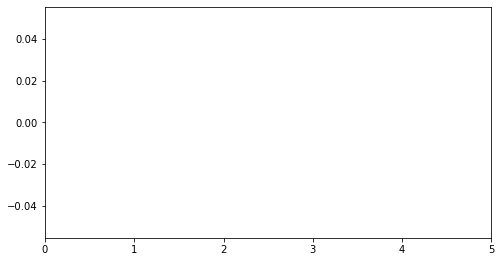

In [9]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


########################################
pup = list(nue_nue_allsel_vars_tot.values())

i = 0
for c in nue_nue_allsel_vars_tot.keys():
    nue_nue_allsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot.values())

i = 0
for c in nue_nue_allsel_weights_tot.keys():
    nue_nue_allsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot.values())

i = 0
for c in nue_mc_vars_tot.keys():
    nue_mc_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot.values())

i = 0
for c in nue_mc_weights_tot.keys():
    nue_mc_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot.values())

i = 0
for c in nue_dirt_vars_tot.keys():
    nue_dirt_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot.values())

i = 0
for c in nue_dirt_weights_tot.keys():
    nue_dirt_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_allsel_vars_tot, nue_mc_vars_tot, nue_dirt_vars_tot]
weightss = [nue_nue_allsel_weights_tot, nue_mc_weights_tot, nue_dirt_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_allsel_fig = plt.figure(figsize=(8, 7))
nue_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_allsel_ax1 = plt.subplot(nue_allsel_gs[0])
nue_allsel_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

nue_stacked = nue_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

n_ext, ext_bins, patches = nue_allsel_ax1.hist(
            nue_ext_vars_tot[str(0)][0],
            weights=nue_ext_weights_tot[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (nue_ext_weights_tot[str(0)][0]) if (nue_ext_weights_tot[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

nue_allsel_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bincenters =  np.arange(-0.25, 4.75, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

#print(nue_data_vars_tot[str(0)].values())
#print(type(nue_data_vars_tot[str(0)].values()))


nue_allsel_ax1.errorbar(
            current_bincenters,
            nue_data_vars_tot[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=nue_data_weights_tot[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(nue_data_vars_tot[str(0)].values()) if sum(nue_data_vars_tot[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

n_nue_tot = (nue_stacked[0][-1])
print(n_nue_tot)
n_nue_tot_allsel = n_nue_tot
#n_nue_tot = (nue_stacked[0])
#print(n_nue_tot)


current_total_hist = (nue_stacked[0][-1])
#current_total_hist = (nue_stacked[0])


nue_allsel_ax1.set_ylim([0, 50])

plt.title("Nue - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

#need to cut data to make it work for shorter plot

In [10]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)

#print(nue_stacked)

wanted_key = 2

nue_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, nue_stacked)


print('%.50f' % math.fsum(nue_wanted_list))

#nue_wanted_list = n_nue_tot
#print(nue_wanted_list)
print("")
print(sum(current_total_hist))
#print(sum(sum(n_nue_tot)))

print( math.fsum(nue_wanted_list)/math.fsum(current_total_hist))

[0.0, 0.0, 0.0, 0.0, 0.0]

SUMS
[0.8701462566928679, 9.788810744749078, 63.21770224375505, 63.403052760587975, 64.87429488056613, 72.30170940113905]
[8.91866448805621, 53.42889149900597, 0.18535051683292636, 1.4712421199781502, 7.427414520572924]

Wanted List:
[0.09661010578074425, 0.08874041105217856, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

0.18535051683292280699788534548133611679077148437500

72.30170940113905
0.002563570327287487


[ 7.57740168 28.86135129 12.00097038  3.37396922  1.1634808   0.31033978
  0.10268253  0.03869581  0.          0.        ]
53.42889149900578615870472276583313941955566406250000



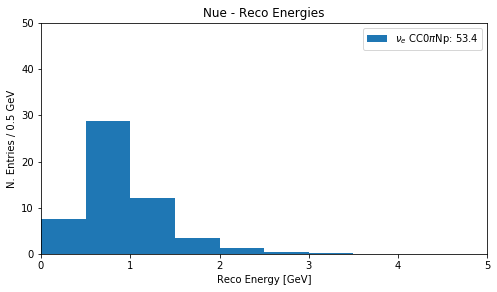

In [11]:



########################################
pup = list(nue_nue_sigsel_vars_tot.values())

i = 0
for c in nue_nue_sigsel_vars_tot.keys():
    nue_nue_sigsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_sigsel_weights_tot.values())

i = 0
for c in nue_nue_sigsel_weights_tot.keys():
    nue_nue_sigsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
    
varss = [nue_nue_sigsel_vars_tot]
weightss = [nue_nue_sigsel_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

nue_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bincenters =  np.arange(-0.25, 4.75, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]

n_nue_tot = (nue_stacked[0])
print(n_nue_tot)
#n_nue_tot = (nue_stacked[0])
#print(n_nue_tot)


#current_total_hist = (nue_stacked[0][-1])
current_total_hist = (nue_stacked[0])
print('%.50f' % math.fsum(nue_stacked[0]))
print()


nue_ax1.set_ylim([0, 50])

plt.title("Nue - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

#need to cut data to make it work for shorter plot

Sidenote for unfolding

In [12]:
#Data values
data_values = list(nue_data_vars_tot[str(0)].values())
data_values = np.array(data_values)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = nue_ext_weights_tot[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = nue_wanted_list
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

#print(nue_wanted_list[1:7])

[12 29  9  5  3  0  1  0  0  0]
[0.56120876 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[ 7.48079157 28.77261088 12.00097038  3.37396922  1.1634808   0.31033978
  0.10268253  0.03869581  0.          0.        ]


In [13]:
if isRun3 == False:
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal.csv", 
    #           data_signal,
    #           delimiter =", ", 
    #           fmt ='% s')
    #---------------------------------------------------------------------------
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')
    #---------------------------------------------------------------------------
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_ALL.csv", 
    #           current_total_hist,
    #           delimiter =", ", 
    #           fmt ='% s')
elif isRun3 == True:
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal.csv", 
    #           data_signal,
    #           delimiter =", ", 
    #           fmt ='% s')
    #---------------------------------------------------------------------------
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_run3_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')
    #---------------------------------------------------------------------------
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_ALL.csv", 
    #           current_total_hist,
    #           delimiter =", ", 
    #           fmt ='% s')

## Now do Numu

dict_values([1, 462, 556, 225, 104, 44, 21, 3, 4, 0])
<class 'dict_values'>
[1.14499298e+00 3.70652758e+02 4.67706856e+02 2.42167444e+02
 1.01329966e+02 4.26501348e+01 1.66336541e+01 6.18224386e+00
 2.35752855e+00 2.71153985e-01]


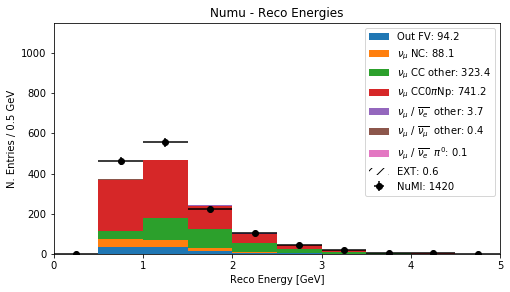

In [14]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


############################################# 
pup = list(numu_mc_allsel_vars_tot.values())

i = 0
for c in numu_mc_allsel_vars_tot.keys():
    numu_mc_allsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_allsel_weights_tot.values())

i = 0
for c in numu_mc_allsel_weights_tot.keys():
    numu_mc_allsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot.values())

i = 0
for c in numu_dirt_vars_tot.keys():
    numu_dirt_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot.values())

i = 0
for c in numu_dirt_weights_tot.keys():
    numu_dirt_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [numu_mc_allsel_vars_tot, numu_dirt_vars_tot]
weightss = [numu_mc_allsel_weights_tot, numu_dirt_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_allsel_fig = plt.figure(figsize=(8, 7))
numu_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_allsel_ax1 = plt.subplot(numu_allsel_gs[0])
numu_allsel_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

numu_stacked = numu_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])

n_ext, ext_bins, patches = numu_allsel_ax1.hist(
            numu_ext_vars_tot[str(0)][0],
            weights=numu_ext_weights_tot[str(0)][0],
            bottom=current_total_hist,
            label="EXT: %.1f" % (numu_ext_weights_tot[str(0)][0]) if (numu_ext_weights_tot[str(0)][0]) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

numu_allsel_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

print(numu_data_vars_tot[str(0)].values())
print(type(numu_data_vars_tot[str(0)].values()))

numu_allsel_ax1.errorbar(
            current_bincenters,
            numu_data_vars_tot[str(0)].values(),
            xerr=current_bin_size/2,
            yerr=numu_data_weights_tot[str(0)].values(),
            fmt='ko',
            label="NuMI: %i" % sum(numu_data_vars_tot[str(0)].values()) if sum(numu_data_vars_tot[str(0)].values()) else "")

#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]
n_numu_tot = (numu_stacked[0][-1])
print(n_numu_tot)
n_numu_tot_allsel = n_numu_tot

numu_allsel_ax1.set_ylim([0, 1150])

plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [15]:
import importlib
import Plotter_Functions_Alex
importlib.reload(Plotter_Functions_Alex)
from Plotter_Functions_Alex import getWantedLists
importlib.reload(getWantedLists)


wanted_key = 3

numu_wanted_list = Plotter_Functions_Alex.getWantedLists.getWantedLists(wanted_key, numu_stacked)

#numu_wanted_list = n_numu_tot

[0.18152330129598226, 1.206572014020935, 0.8650075551628333, 0.0, 0.0, 0.0]

SUMS
[94.21100597490194, 182.34021939119484, 505.7451310879001, 1246.921289807918, 1250.6358535331676, 1251.0005461792541, 1251.0967320433915]
[88.1292134162929, 323.4049116967053, 741.1761587200178, 3.714563725249718, 0.3646926460864961, 0.09618586413739649]

Wanted List:
[0.0, 1.2967529726953444, 0.8652124771965646, 1.4142133931193541, 0.1383848822384408, 0.0, 0.0, 0.0, 0.0, 0.0]



[6.89963919e-01 2.77068313e+02 2.92074886e+02 1.32013608e+02
 4.77862035e+01 2.06537739e+01 1.14549825e+01 2.14968590e+00
 1.44648906e+00 1.01380702e-01]


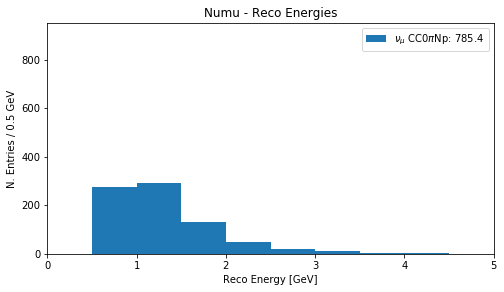

In [16]:



############################################# 
pup = list(numu_mc_sigsel_vars_tot.values())

i = 0
for c in numu_mc_sigsel_vars_tot.keys():
    numu_mc_sigsel_vars_tot[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot.values())

i = 0
for c in numu_mc_sigsel_weights_tot.keys():
    numu_mc_sigsel_weights_tot[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
    
varss = [numu_mc_sigsel_vars_tot]
weightss = [numu_mc_sigsel_weights_tot]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0])


numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25


#print(nue_stacked[0][4])
#print(sum(nue_stacked[0][4]))
#n_nue_tot = nue_stacked[0][4]
n_numu_tot = (numu_stacked[0])
print(n_numu_tot)

numu_ax1.set_ylim([0, 950])

plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

Sidenote for unfolding

In [17]:
#Data values
data_values = list(numu_data_vars_tot[str(0)].values())
data_values = np.array(data_values)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = numu_ext_weights_tot[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = numu_wanted_list
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

[  1 462 556 225 104  44  21   3   4   0]
[0.56120876 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[6.89963919e-01 2.75771560e+02 2.91209674e+02 1.30599394e+02
 4.76478186e+01 2.06537739e+01 1.14549825e+01 2.14968590e+00
 1.44648906e+00 1.01380702e-01]


In [18]:
if isRun3 == False and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_run3_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')

### Combined Plots

[371.08814292 529.05071254 304.9005695  158.97723417  85.20059679
  46.60379245  22.44234339  13.327041     7.05583326   3.38808401]
[1.49040342e+06 8.57729316e+03 1.16027052e+03 3.94864362e+02
 1.95591235e+02 1.01549270e+02 5.98931475e+01 3.69125493e+01
 2.39019230e+01 2.01209493e+01]


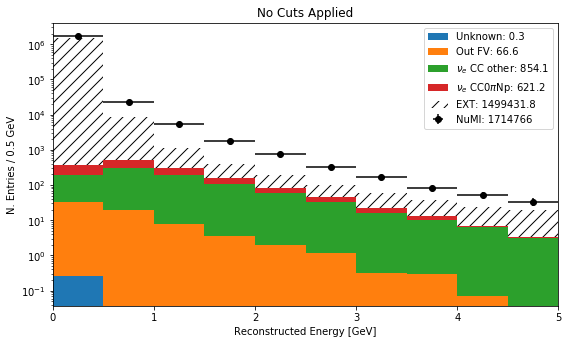

In [10]:
category_labels = {
    1 : r'$\nu_e$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_\mu$ CC $\pi^{0}$',
    4 : r'$\nu_\mu$ CC',
    5 : r'$\nu_\mu$ NC $\pi^{0}$',
    6 : r'$\nu_\mu$ NC',
    7 : r'$\bar{\nu}_e$ CC0$\pi$Np',
    8: r'$\nu_e$ NC',
    9: r'$\nu_e$ CC other',
    10 : r'$\nu_e$ / $\overline{\nu_e}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other',
    0: r'Unknown'
}


########################################
pup = list(nue_nue_allsel_vars_tot_run1.values())

i = 0
for c in nue_nue_allsel_vars_tot_run1.keys():
    nue_nue_allsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot_run1.values())

i = 0
for c in nue_nue_allsel_weights_tot_run1.keys():
    nue_nue_allsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot_run1.values())

i = 0
for c in nue_mc_vars_tot_run1.keys():
    nue_mc_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot_run1.values())

i = 0
for c in nue_mc_weights_tot_run1.keys():
    nue_mc_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot_run1.values())

i = 0
for c in nue_dirt_vars_tot_run1.keys():
    nue_dirt_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot_run1.values())

i = 0
for c in nue_dirt_weights_tot_run1.keys():
    nue_dirt_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
########################################
pup = list(nue_nue_allsel_vars_tot_run3.values())

i = 0
for c in nue_nue_allsel_vars_tot_run3.keys():
    nue_nue_allsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_allsel_weights_tot_run3.values())

i = 0
for c in nue_nue_allsel_weights_tot_run3.keys():
    nue_nue_allsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_mc_vars_tot_run3.values())

i = 0
for c in nue_mc_vars_tot_run3.keys():
    nue_mc_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_mc_weights_tot_run3.values())

i = 0
for c in nue_mc_weights_tot_run3.keys():
    nue_mc_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(nue_dirt_vars_tot_run3.values())

i = 0
for c in nue_dirt_vars_tot_run3.keys():
    nue_dirt_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_dirt_weights_tot_run3.values())

i = 0
for c in nue_dirt_weights_tot_run3.keys():
    nue_dirt_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if key in dict_1 and key in dict_2:
                dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    
varss = [nue_nue_allsel_vars_tot_run1, nue_mc_vars_tot_run1, nue_dirt_vars_tot_run1, nue_nue_allsel_vars_tot_run3, nue_mc_vars_tot_run3, nue_dirt_vars_tot_run3]
weightss = [nue_nue_allsel_weights_tot_run1, nue_mc_weights_tot_run1, nue_dirt_weights_tot_run1, nue_nue_allsel_weights_tot_run3, nue_mc_weights_tot_run3, nue_dirt_weights_tot_run3]
#varss = [nue_nue_allsel_vars_tot_run3]
#weightss = [nue_nue_allsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_allsel_fig = plt.figure(figsize=(8, 7))
nue_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_allsel_ax1 = plt.subplot(nue_allsel_gs[0])
nue_allsel_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

nue_stacked = nue_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

i = 0
nue_ext_var = []
nue_ext_weight = []

for i in range(len(nue_ext_vars_tot_run1[str(0)])): 
    nue_ext_var.append(nue_ext_vars_tot_run1[str(0)][i])
    nue_ext_weight.append(nue_ext_weights_tot_run1[str(0)][i])
    i=i+1
    
for i in range(len(nue_ext_vars_tot_run3[str(0)])): 
    nue_ext_var.append(nue_ext_vars_tot_run3[str(0)][i])
    nue_ext_weight.append(nue_ext_weights_tot_run3[str(0)][i])
    i=i+1  

n_ext, ext_bins, patches = nue_allsel_ax1.hist(
            nue_ext_var,
            weights=nue_ext_weight,
            bottom=current_total_hist,
            label="EXT: %.1f" % sum(nue_ext_weight) if sum(nue_ext_weight) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)

nue_allsel_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bincenters =  np.arange(-0.25, 4.75, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25


i = 0
nue_data_var = []
nue_data_weight = []

while i < 10: 
    nue_data_var.append(nue_data_vars_tot_run1[str(0)][i] + nue_data_vars_tot_run3[str(0)][i])
    nue_data_weight.append(nue_data_weights_tot_run1[str(0)][i] + nue_data_weights_tot_run3[str(0)][i])
    i=i+1


nue_allsel_ax1.errorbar(
            current_bincenters,
            nue_data_var,
            xerr=current_bin_size/2,
            yerr=nue_data_weight,
            fmt='ko',
            label="NuMI: %i" % sum(nue_data_var) if (nue_data_var) else "")


n_nue_tot = (nue_stacked[0][-1])
print(n_nue_tot)
n_nue_tot_allsel = n_nue_tot + n_ext
#n_nue_tot = (nue_stacked[0])
print(n_nue_tot_allsel)


current_total_hist = (nue_stacked[0][-1])
#current_total_hist = (nue_stacked[0])

nue_allsel_ax1.set_yscale('log')
#nue_allsel_ax1.set_ylim([0, 50])

plt.title("No Cuts Applied")
plt.xlabel("Reconstructed Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()
plt.tight_layout()

In [5]:
nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_recoE_comb_"+ending+".svg",bbox_inches='tight' )

In [11]:
print(sum(n_nue_tot_allsel))

print(sum(n_nue_tot))

224.98252451171993
219.5353601124864


[2.28388663e+01 7.72080309e+01 3.55178261e+01 1.09566554e+01
 4.20505459e+00 1.54243177e+00 4.35153158e-01 5.54237754e-02
 0.00000000e+00 2.02481915e-02]
152.77969028002650020425789989531040191650390625000000



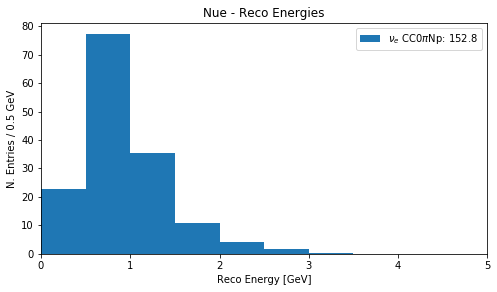

In [12]:



########################################
pup = list(nue_nue_sigsel_vars_tot_run1.values())

i = 0
for c in nue_nue_sigsel_vars_tot_run1.keys():
    nue_nue_sigsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_sigsel_weights_tot_run1.values())

i = 0
for c in nue_nue_sigsel_weights_tot_run1.keys():
    nue_nue_sigsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
##############################################
########################################
pup = list(nue_nue_sigsel_vars_tot_run3.values())

i = 0
for c in nue_nue_sigsel_vars_tot_run3.keys():
    nue_nue_sigsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(nue_nue_sigsel_weights_tot_run3.values())

i = 0
for c in nue_nue_sigsel_weights_tot_run3.keys():
    nue_nue_sigsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
##############################################
    
varss = [nue_nue_sigsel_vars_tot_run1, nue_nue_sigsel_vars_tot_run3]
weightss = [nue_nue_sigsel_weights_tot_run1, nue_nue_sigsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

nue_stacked = nue_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (nue_stacked[0][-1])

nue_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bincenters =  np.arange(-0.25, 4.75, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

n_nue_tot = (nue_stacked[0])
print(n_nue_tot)


current_total_hist = (nue_stacked[0])
print('%.50f' % math.fsum(nue_stacked[0]))
print()


#nue_ax1.set_ylim([0, 50])

plt.title("Nue - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [13]:
#Data values
#data_values = list(nue_data_var[str(0)].values())
data_values = np.array(nue_data_var)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = nue_ext_weights_tot_run1[str(0)][0] + nue_ext_weights_tot_run3[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = n_nue_tot
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg


[ 62 104  35  13   6   1   1   0   0   0]
[0.87011925 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
if isCombined == True:
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal.csv", 
    #           data_signal,
    #           delimiter =", ", 
    #           fmt ='% s')
    #---------------------------------------------------------------------------
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", 
               n_nue_tot,
               delimiter =", ", 
               fmt ='% s')
    #---------------------------------------------------------------------------
    #np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_ALL.csv", 
    #           current_total_hist,
    #           delimiter =", ", 
    #           fmt ='% s')

{'0': {0: 7966, 1: 1962, 2: 428, 3: 91, 4: 29}}
[12276.79951921  5594.64091674  1467.65153059   356.89537024
    88.40487883]
[26639.1046951   6475.88051596  1534.94851442   376.99548807
    94.16095372]


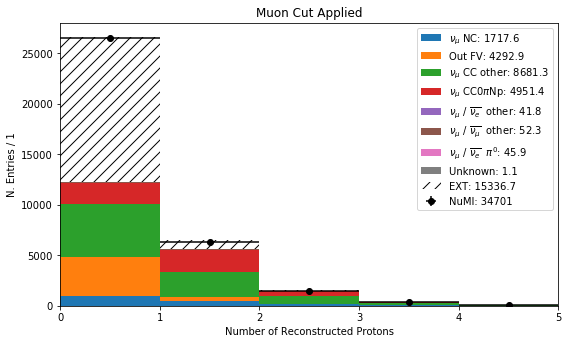

In [8]:
category_labels = {
    1 : r'$\nu_\mu$ CC0$\pi$Np', 
    2 : r'Out FV',
    3 : r'$\nu_e$ CC $\pi^{0}$',
    4 : r'$\nu_e$ CC',
    5 : r'$\nu_e$ NC $\pi^{0}$',
    6 : r'$\nu_e$ NC',
    7 : r'$\bar{\nu}_\mu$ CC0$\pi$Np',
    8: r'$\nu_\mu$ NC',
    9: r'$\nu_\mu$ CC other',
    10 : r'$\nu_\mu$ / $\overline{\nu_\mu}$  other', 
    11 : r'$\nu_\mu$ / $\overline{\nu_e}$  $\pi^{0}$', 
    12 : r'$\nu_\mu$ / $\overline{\nu_e}$  other',
    0: r'Unknown'
}


############################################# 
pup = list(numu_mc_allsel_vars_tot_run1.values())

i = 0
for c in numu_mc_allsel_vars_tot_run1.keys():
    numu_mc_allsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_mc_allsel_weights_tot_run1.values())

i = 0
for c in numu_mc_allsel_weights_tot_run1.keys():
    numu_mc_allsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_nue_vars_tot_run1.values())

i = 0
for c in numu_nue_vars_tot_run1.keys():
    numu_nue_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_nue_weights_tot_run1.values())

i = 0
for c in numu_nue_weights_tot_run1.keys():
    numu_nue_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot_run1.values())

i = 0
for c in numu_dirt_vars_tot_run1.keys():
    numu_dirt_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_dirt_weights_tot_run1.values())

i = 0
for c in numu_dirt_weights_tot_run1.keys():
    numu_dirt_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
############################################# 
pup = list(numu_mc_allsel_vars_tot_run3.values())

i = 0
for c in numu_mc_allsel_vars_tot_run3.keys():
    numu_mc_allsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_mc_allsel_weights_tot_run3.values())

i = 0
for c in numu_mc_allsel_weights_tot_run3.keys():
    numu_mc_allsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_nue_vars_tot_run3.values())

i = 0
for c in numu_nue_vars_tot_run3.keys():
    numu_nue_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
    
pup2 = list(numu_nue_weights_tot_run3.values())

i = 0
for c in numu_nue_weights_tot_run3.keys():
    numu_nue_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 
pup = list(numu_dirt_vars_tot_run3.values())

i = 0
for c in numu_dirt_vars_tot_run3.keys():
    numu_dirt_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_dirt_weights_tot_run3.values())

i = 0
for c in numu_dirt_weights_tot_run3.keys():
    numu_dirt_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
############################################# 

def mergeDictionary(dict_1, dict_2):
    dict_3 = {**dict_1, **dict_2}
    for key, value in dict_3.items():
        if (key in dict_1) and (key in dict_2):
            dict_3[key] = value + dict_1[key]
    return dict_3

def combine_dicts(mydict):
    while len(mydict) > 1:
        i = 0
        dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
        mydict.pop(0)
        mydict[0] = dict_3
    return mydict
    

varss = [numu_mc_allsel_vars_tot_run1, numu_nue_vars_tot_run1, numu_dirt_vars_tot_run1, numu_mc_allsel_vars_tot_run3, numu_nue_vars_tot_run3, numu_dirt_vars_tot_run3]
weightss = [numu_mc_allsel_weights_tot_run1, numu_nue_weights_tot_run1, numu_dirt_weights_tot_run1, numu_mc_allsel_weights_tot_run3, numu_nue_weights_tot_run3, numu_dirt_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_allsel_fig = plt.figure(figsize=(8, 7))
numu_allsel_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_allsel_ax1 = plt.subplot(numu_allsel_gs[0])
#numu_allsel_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

#ARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"
#VARIABLE, BINS, RANGE, XTIT = 'VtxX',60,(-20.0, 280.0),"VtxX [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'VtxY',56,(-140.0, 140.0),"VtxY [cm]"
#VARIABLE, BINS, RANGE, XTIT = 'VtxZ',56,(-10.0, 1110.0),"VtxZ [cm]"
VARIABLE, BINS, RANGE, XTIT = 'Muons',5,(0.0, 5.0),"Muons"

numu_stacked = numu_allsel_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])
#print(current_total_hist)

i = 0
numu_ext_var = []
numu_ext_weight = []

for i in range(len(numu_ext_vars_tot_run1[str(0)])): 
    numu_ext_var.append(numu_ext_vars_tot_run1[str(0)][i])
    numu_ext_weight.append(numu_ext_weights_tot_run1[str(0)][i])
    i=i+1
    
for i in range(len(numu_ext_vars_tot_run3[str(0)])): 
    numu_ext_var.append(numu_ext_vars_tot_run3[str(0)][i])
    numu_ext_weight.append(numu_ext_weights_tot_run3[str(0)][i])
    i=i+1    


n_ext, ext_bins, patches = numu_allsel_ax1.hist(
            numu_ext_var,
            weights=numu_ext_weight,
            bottom=current_total_hist,
            label="EXT: %.1f" % sum(numu_ext_weight) if sum(numu_ext_weight) else "",
            hatch="//",
            color="white",
            bins=BINS,
            range=RANGE)


numu_allsel_ax1.set_xlim([0, 5])    #TrueE, lepton mom
#current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bin_size = 0.5
current_bincenters =  np.arange(0.5, 5.5, 1)
current_bin_size = 1
######################
#numu_allsel_ax1.set_xlim([-20, 280])    #VtxX
#current_bincenters =  np.arange(-17.5, 282.5, 5)
#current_bin_size = 5
######################
#numu_allsel_ax1.set_xlim([-140, 140])    #VtxY
#current_bincenters =  np.arange(-137.5, 142.5, 5)
#current_bin_size = 5
######################
#numu_allsel_ax1.set_xlim([-10, 1110])    #VtxZ
#current_bincenters =  np.arange(0, 1120, 20)
#current_bin_size = 20
######################
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

i = 0
numu_data_var = []
numu_data_weight = []

print(numu_data_vars_tot_run1)

#while i < 10: #TrueE
#while i < 60:   #VtxX
#while i < 56:   #VtxY, Z  
while i < 5:   #Muons, Protons, Showers
    numu_data_var.append(numu_data_vars_tot_run1[str(0)][i] + numu_data_vars_tot_run3[str(0)][i])
    numu_data_weight.append(numu_data_weights_tot_run1[str(0)][i] + numu_data_weights_tot_run3[str(0)][i])
    i=i+1


numu_allsel_ax1.errorbar(
            current_bincenters,
            numu_data_var,
            xerr=current_bin_size/2,
            yerr=numu_data_weight,
            fmt='ko',
            label="NuMI: %i" % sum(numu_data_var) if sum(numu_data_var) else "")


n_numu_tot = (numu_stacked[0][-1])
print(n_numu_tot)
n_numu_tot_allsel = n_numu_tot + n_ext
print(n_numu_tot_allsel)

#numu_allsel_ax1.set_ylim([0, 1150])

plt.title("Muon Cut Applied")
plt.xlabel("Number of Reconstructed Protons")
plt.ylabel("N. Entries / 1")
plt.legend()
plt.tight_layout()

In [9]:
numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_recoE_comb_"+ending+".svg",bbox_inches='tight' )

[1.37096072e+00 8.17427041e+02 1.00388679e+03 4.65173461e+02
 1.79954502e+02 5.90234952e+01 2.64946265e+01 4.51628418e+00
 3.56473489e+00 4.20102136e-01]
2561.83199641800365498056635260581970214843750000000000



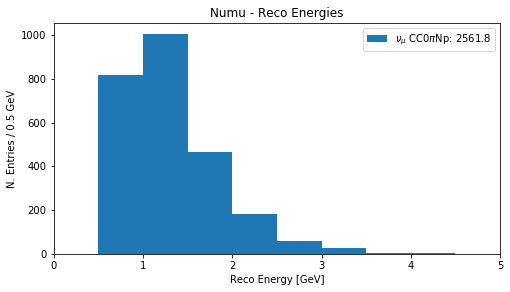

In [16]:



########################################
pup = list(numu_mc_sigsel_vars_tot_run1.values())

i = 0
for c in numu_mc_sigsel_vars_tot_run1.keys():
    numu_mc_sigsel_vars_tot_run1[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot_run1.values())

i = 0
for c in numu_mc_sigsel_weights_tot_run1.keys():
    numu_mc_sigsel_weights_tot_run1[str(c)] = pup2[i][0]
    i = i + 1
##############################################
########################################
pup = list(numu_mc_sigsel_vars_tot_run3.values())

i = 0
for c in numu_mc_sigsel_vars_tot_run3.keys():
    numu_mc_sigsel_vars_tot_run3[str(c)] = pup[i][0]
    i = i + 1
    
pup2 = list(numu_mc_sigsel_weights_tot_run3.values())

i = 0
for c in numu_mc_sigsel_weights_tot_run3.keys():
    numu_mc_sigsel_weights_tot_run3[str(c)] = pup2[i][0]
    i = i + 1
##############################################
    
varss = [numu_mc_sigsel_vars_tot_run1, numu_mc_sigsel_vars_tot_run3]
weightss = [numu_mc_sigsel_weights_tot_run1, numu_mc_sigsel_weights_tot_run3]
varss_tot = combine_dicts(varss)
weightss_tot = combine_dicts(weightss)
############################################# 

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(nue_gs[0])
numu_ax1.set_xlim([0, 5])
labels = [
            "%s: %.1f" % (category_labels[int(c)], sum(weightss_tot[0][str(c)])) \
            if sum(weightss_tot[0][str(c)]) else ""
            for c in varss_tot[0].keys()
        ]

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.0, 5.0),"Reco Energy [GeV]"

numu_stacked = numu_ax1.hist(
            varss_tot[0].values(),
            weights=list(weightss_tot[0].values()),
            stacked=True,
            label=labels,
            bins=BINS,
            range=RANGE)



current_total_hist = (numu_stacked[0][-1])

numu_ax1.set_xlim([0, 5])    #TrueE, lepton mom
current_bincenters =  np.arange(0.25, 5.25, 0.5)
#current_bincenters =  np.arange(-0.25, 4.75, 0.5)
current_bin_size = 0.5
#nue_ax1.set_xlim([-1, 1])    #AngleDiff
#current_bincenters =  np.arange(-0.9, 1.1, 0.2)
#current_bin_size = 0.25

n_numu_tot = (numu_stacked[0])
print(n_numu_tot)


current_total_hist = (numu_stacked[0])
print('%.50f' % math.fsum(numu_stacked[0]))
print()


#nue_ax1.set_ylim([0, 50])

plt.title("Numu - Reco Energies")
plt.xlabel("Reco Energy [GeV]")
plt.ylabel("N. Entries / 0.5 GeV")
plt.legend()

In [17]:
#Data values
#data_values = list(numu_data_vars_tot[str(0)].values())
data_values = np.array(numu_data_var)
print(data_values)

#Off beam bkg
off_beam_bkg_0 = numu_ext_weights_tot_run1[str(0)][0] + numu_ext_weights_tot_run3[str(0)][0]
#print(off_beam_bkg_0)
off_beam_bkg = [0]*10
off_beam_bkg[0] = off_beam_bkg_0
off_beam_bkg = np.array(off_beam_bkg)
print(off_beam_bkg)


#Other bkg
wanted_signal_values = n_numu_tot
other_bkg = current_total_hist - wanted_signal_values
print(other_bkg)


#Data_signal - UNFOLDING INPUT
data_signal = data_values - off_beam_bkg - other_bkg

[   5 1497 1839  779  315  124   53   12    7    0]
[0.87011925 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
if isCombined == True:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_recoCut_comb_"+ending+".csv", 
               n_numu_tot,
               delimiter =", ", 
               fmt ='% s')

## Ratio Plot

Meaningless before unfolding, so don't bother

## Errors

### Get ratio stat errs

In [19]:
if isCombined == False:
    nue_nue_sigsel_stat_errs = np.array(nue_nue_sigsel_stat_errs)
    nue_nue_notsigsel_stat_errs = np.array(nue_nue_notsigsel_stat_errs)
    nue_mc_stat_errs = np.array(nue_mc_stat_errs)
    nue_dirt_stat_errs = np.array(nue_dirt_stat_errs)
    nue_ext_stat_errs = np.array(nue_ext_stat_errs)

    numu_mc_sigsel_stat_errs = np.array(numu_mc_sigsel_stat_errs)
    numu_mc_notsigsel_stat_errs = np.array(numu_mc_notsigsel_stat_errs)
    numu_dirt_stat_errs = np.array(numu_dirt_stat_errs)
    numu_ext_stat_errs = np.array(numu_ext_stat_errs)


    #numu_detsys_errs = np.array(numu_detsys_errs)
elif isCombined == True:
    nue_nue_sigsel_stat_errs_run1 = np.array(nue_nue_sigsel_stat_errs_run1)
    nue_nue_notsigsel_stat_errs_run1 = np.array(nue_nue_notsigsel_stat_errs_run1)
    nue_mc_stat_errs_run1 = np.array(nue_mc_stat_errs_run1)
    nue_dirt_stat_errs_run1= np.array(nue_dirt_stat_errs_run1)
    nue_ext_stat_errs_run1 = np.array(nue_ext_stat_errs_run1)

    numu_mc_sigsel_stat_errs_run1 = np.array(numu_mc_sigsel_stat_errs_run1)
    numu_mc_notsigsel_stat_errs_run1 = np.array(numu_mc_notsigsel_stat_errs_run1)
    numu_dirt_stat_errs_run1 = np.array(numu_dirt_stat_errs_run1)
    numu_ext_stat_errs_run1 = np.array(numu_ext_stat_errs_run1)


    #numu_detsys_errs = np.array(numu_detsys_errs)
    ###########################################
    nue_nue_sigsel_stat_errs_run3 = np.array(nue_nue_sigsel_stat_errs_run3)
    nue_nue_notsigsel_stat_errs_run3 = np.array(nue_nue_notsigsel_stat_errs_run3)
    nue_mc_stat_errs_run3 = np.array(nue_mc_stat_errs_run3)
    nue_dirt_stat_errs_run3 = np.array(nue_dirt_stat_errs_run3)
    nue_ext_stat_errs_run3 = np.array(nue_ext_stat_errs_run3)

    numu_mc_sigsel_stat_errs_run3 = np.array(numu_mc_sigsel_stat_errs_run3)
    numu_mc_notsigsel_stat_errs_run3 = np.array(numu_mc_notsigsel_stat_errs_run3)
    numu_dirt_stat_errs_run3 = np.array(numu_dirt_stat_errs_run3)
    numu_ext_stat_errs_run3 = np.array(numu_ext_stat_errs_run3)


    #numu_detsys_errs = np.array(numu_detsys_errs)

### Expected Error Calculations

In [20]:
# Merge the backgrounds from nue and mc stat errors
if isCombined == False:
    errs = [nue_nue_notsigsel_stat_errs, nue_mc_stat_errs]
elif isCombined == True:
    errs = [nue_nue_notsigsel_stat_errs_run1, nue_mc_stat_errs_run1, nue_nue_notsigsel_stat_errs_run3, nue_mc_stat_errs_run3]    

#arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
masterlist = []
templist = []
for i in range((len(errs[0]))):
    masterlist.append(templist)
    templist = []
    for j in range(len(errs)):
        templist.append(errs[j][i])
masterlist.append(templist)
    
masterlist.pop(0)

#deal with adding the errors in each bin
total_errs = []
holdlist = []
for f in masterlist:
    total_errs.append(sum(holdlist))
    #print("------------------------------")
    holdlist = []
    for g in f:
        #just add them as they differnt parts of the same total number. This then matches previous when doing total
        holdlist.append(g)
total_errs.append(sum(holdlist))

total_errs.pop(0)
print("total errs nue = ", total_errs)
print("")

nue_nue_mc_bkg_stat_errs = total_errs

#####################################################
if isCombined == False:
    numu_nue_mc_bkg_stat_errs = numu_mc_notsigsel_stat_errs
    #print("total errs numu = ", numu_nue_mc_bkg_stat_errs)
elif isCombined == True:
    errs = [numu_mc_notsigsel_stat_errs_run1, numu_mc_notsigsel_stat_errs_run3]

    #arrange the lists such that all the errors from bin 1 are in one list, bin 2 in another list, etc...
    masterlist = []
    templist = []
    for i in range((len(errs[0]))):
        masterlist.append(templist)
        templist = []
        for j in range(len(errs)):
            templist.append(errs[j][i])
    masterlist.append(templist)

    masterlist.pop(0)

    #deal with adding the errors in each bin
    total_errs = []
    holdlist = []
    for f in masterlist:
        total_errs.append(sum(holdlist))
        #print("------------------------------")
        holdlist = []
        for g in f:
            #just add them as they differnt parts of the same total number. This then matches previous when doing total
            holdlist.append(g)
    total_errs.append(sum(holdlist))

    total_errs.pop(0)
    numu_nue_mc_bkg_stat_errs = total_errs


print("total errs numu = ", numu_nue_mc_bkg_stat_errs)

total errs nue =  [2.7960675082469053, 3.953257282646547, 1.1767749814935886, 0.8268414134397633, 0.15939783312117672, 0.21059195861984908, 0.06729130458807706, 0.0005327923052337419, 0.0, 7.071271349089502e-05]

total errs numu =  [0.1710093833149987, 72.30415847533615, 114.8655343546443, 79.53549485430467, 40.939493587995635, 16.031786345886307, 6.066285194632652, 2.799818386065646, 0.752470146162999, 0.4666484225013596]


In [21]:
if isCombined == False:
    nue_exp_err    = np.sqrt(nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + nue_ext_stat_errs)
    totalstat_nue = nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + nue_ext_stat_errs
    #totalstat_nue = totalstat_nue
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")

    numu_exp_err    = np.sqrt(numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + numu_ext_stat_errs)
    totalstat_numu = numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + numu_ext_stat_errs
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
    print("")
elif isCombined == True:
    nue_exp_err    = np.sqrt(nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + nue_ext_stat_errs_run1 + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + nue_ext_stat_errs_run3)
    totalstat_nue = nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + nue_ext_stat_errs_run1 + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + nue_ext_stat_errs_run3
    print("totalstat_nue ",totalstat_nue )
    print("nue_exp_err ", nue_exp_err)
    print("")

    numu_exp_err    = np.sqrt(numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + numu_ext_stat_errs_run1 + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + numu_ext_stat_errs_run3)
    totalstat_numu = numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + numu_ext_stat_errs_run1 + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + numu_ext_stat_errs_run3
    print("totalstat_numu ",totalstat_numu )
    print("numu_exp_err ", numu_exp_err)
    print("")


totalstat_nue  [5.41155536e+00 7.24158252e+00 1.65558547e+00 9.99951819e-01
 2.26762725e-01 2.35162678e-01 7.48638068e-02 1.59837692e-03
 0.00000000e+00 4.62079592e-04]
nue_exp_err  [2.326275   2.69101886 1.28669556 0.99997591 0.4761961  0.48493575
 0.27361251 0.03997971 0.         0.02149604]

totalstat_numu  [  2.44963447 244.59221169 330.61402677 173.8096958   78.57661456
  30.64043655  10.76025278   3.9274301    1.14226554   0.53749929]
numu_exp_err  [ 1.56513082 15.6394441  18.1827948  13.18369052  8.86434513  5.53538043
  3.28028242  1.98177448  1.06876824  0.73314343]



In [22]:
###########################################################
#Making cov matricies - the real errors
###########################################################

nue_cov           = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_stat   = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_mc_detsys = np.zeros([len(nue_exp_err), len(nue_exp_err)])
nue_cov_data_stat = np.zeros([len(nue_exp_err), len(nue_exp_err)])
#nue_cov           = np.zeros([6, 6])
#nue_cov_mc_stat   = np.zeros([6, 6])
#nue_cov_mc_detsys = np.zeros([6, 6])
#nue_cov_data_stat = np.zeros([6, 6])

numu_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
numu_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

ratio_cov           = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_stat   = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_mc_detsys = np.zeros([len(numu_exp_err), len(numu_exp_err)])
ratio_cov_data_stat = np.zeros([len(numu_exp_err), len(numu_exp_err)])

print(nue_cov)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
if isCombined == False:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs + nue_dirt_stat_errs + nue_ext_stat_errs)
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs + numu_dirt_stat_errs + numu_ext_stat_errs)
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))
elif isCombined == True:
    nue_cov_mc_stat[np.diag_indices_from(nue_cov_mc_stat)]     = (nue_nue_mc_bkg_stat_errs + nue_nue_sigsel_stat_errs_run1 + nue_dirt_stat_errs_run1 + nue_ext_stat_errs_run1 + nue_nue_sigsel_stat_errs_run3 + nue_dirt_stat_errs_run3 + nue_ext_stat_errs_run3)
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("nue_cov_mc_stat = ", np.diag(nue_cov_mc_stat))

    numu_cov_mc_stat[np.diag_indices_from(numu_cov_mc_stat)]     = (numu_nue_mc_bkg_stat_errs + numu_mc_sigsel_stat_errs_run1 + numu_dirt_stat_errs_run1 + numu_ext_stat_errs_run1 + + numu_mc_sigsel_stat_errs_run3 + numu_dirt_stat_errs_run3 + numu_ext_stat_errs_run3)
    #nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
    print("numu_cov_mc_stat = ", np.diag(numu_cov_mc_stat))


nue_cov_mc_stat =  [5.41155536e+00 7.24158252e+00 1.65558547e+00 9.99951819e-01
 2.26762725e-01 2.35162678e-01 7.48638068e-02 1.59837692e-03
 0.00000000e+00 4.62079592e-04]
numu_cov_mc_stat =  [  2.44963447 244.59221169 330.61402677 173.8096958   78.57661456
  30.64043655  10.76025278   3.9274301    1.14226554   0.53749929]


In [24]:
#8.6% uncertainty added for nue
#11.5% uncertainty added for numu

#################################

#12.2% fractional value being added
#i.e. add 12.2%^2 * n total value ^2 (converting fractional to add to non fractional)

#frac_detsys_value_toreg = 0.01*(n_nue_tot*n_nue_tot)
#print(frac_detsys_value_toreg)
#nue_detsys_exp_err = np.full([len(numu_exp_err), len(numu_exp_err)], frac_detsys_value_toreg)

###################################

nue_detsys_errs = (0.086*0.086)*(n_nue_tot_allsel*n_nue_tot_allsel)
nue_cov_mc_detsys[np.diag_indices_from(nue_cov_mc_detsys)]   = (nue_detsys_errs)
print("nue_cov_mc_detsys = ", np.diag(nue_cov_mc_detsys))


nue_detsys_exp_err = np.sqrt(np.diag(nue_cov_mc_detsys))
nue_detsys_frac_err = nue_detsys_exp_err/(n_nue_tot_allsel)
print("totalstat_nue_detsys ", nue_detsys_errs )
print("nue_detsys_exp_err ", nue_detsys_exp_err)
print("nue_detsys_frac_err ", nue_detsys_frac_err)
print("")

#####################################################

numu_detsys_errs = (0.115*0.115)*(n_numu_tot_allsel*n_numu_tot_allsel)
numu_cov_mc_detsys[np.diag_indices_from(numu_cov_mc_detsys)]   = (numu_detsys_errs)
#nue_cov_mc_detsys[np.diag_indices_from(self.nue_cov_mc_detsys)] = (nue_sys_mc + nue_sys_nue + nue_sys_dirt)**2
print("numu_cov_mc_detsys = ", np.diag(numu_cov_mc_detsys))

numu_detsys_exp_err = np.sqrt(np.diag(numu_cov_mc_detsys))
numu_detsys_frac_err = numu_detsys_exp_err/n_numu_tot_allsel
print("totalstat_numu_detsys ", numu_detsys_errs )
print("numu_detsys_exp_err ", numu_detsys_exp_err)
print("numu_detsys_frac_err ", numu_detsys_frac_err)
print("")

#######################################################


nue_cov_mc_detsys =  [1.09772605e+01 8.96721318e+01 1.77206264e+01 2.17344205e+00
 2.68761491e-01 5.12358512e-02 1.59292799e-02 6.98608996e-05
 0.00000000e+00 6.61955423e-06]
totalstat_nue_detsys  [1.09772605e+01 8.96721318e+01 1.77206264e+01 2.17344205e+00
 2.68761491e-01 5.12358512e-02 1.59292799e-02 6.98608996e-05
 0.00000000e+00 6.61955423e-06]
nue_detsys_exp_err  [3.31319492e+00 9.46953704e+00 4.20958744e+00 1.47425983e+00
 5.18422116e-01 2.26353377e-01 1.26211251e-01 8.35828329e-03
 0.00000000e+00 2.57284944e-03]
nue_detsys_frac_err  [0.086 0.086 0.086 0.086 0.086 0.086 0.086 0.086   nan 0.086]

numu_cov_mc_detsys =  [2.69475636e-01 2.78426191e+04 4.64754450e+04 1.04454206e+04
 1.95927368e+03 3.05092846e+02 3.83834162e+01 4.88311224e+00
 5.28504114e-01 1.06645419e-01]
totalstat_numu_detsys  [2.69475636e-01 2.78426191e+04 4.64754450e+04 1.04454206e+04
 1.95927368e+03 3.05092846e+02 3.83834162e+01 4.88311224e+00
 5.28504114e-01 1.06645419e-01]
numu_detsys_exp_err  [  0.51911043 166

/tmp/ipykernel_8558/2541918801.py:21: RuntimeWarning: invalid value encountered in true_divide
  nue_detsys_frac_err = nue_detsys_exp_err/(n_nue_tot_allsel)


### Now need the systematic errors

In [25]:
if isCombined == False:
    nue_cov = (cov_nue_nue_ppfx + cov_nue_nue_genie + cov_nue_nue_reint)
    nue_cov += (cov_nue_nue_geo)
    nue_cov += (cov_nue_mc_ppfx + cov_nue_mc_genie + cov_nue_mc_reint)
    nue_cov += (cov_nue_mc_geo)
    nue_cov += (cov_nue_dirt_ppfx + cov_nue_dirt_genie + cov_nue_dirt_reint)
    nue_cov += (cov_nue_dirt_geo)

    numu_cov = (cov_numu_mc_ppfx + cov_numu_mc_genie + cov_numu_mc_reint)
    numu_cov += (cov_numu_mc_geo)
    numu_cov += (cov_numu_dirt_ppfx + cov_numu_dirt_genie + cov_numu_dirt_reint)
    numu_cov += (cov_numu_dirt_geo)
elif isCombined == True:
    nue_cov = (cov_nue_nue_ppfx_run1 + cov_nue_nue_genie_run1 + cov_nue_nue_reint_run1 + cov_nue_nue_ppfx_run3 + cov_nue_nue_genie_run3 + cov_nue_nue_reint_run3)
    nue_cov += (cov_nue_nue_geo_run1 + cov_nue_nue_geo_run3 )
    nue_cov += (cov_nue_mc_ppfx_run1 + cov_nue_mc_genie_run1 + cov_nue_mc_reint_run1 + cov_nue_mc_ppfx_run3 + cov_nue_mc_genie_run3 + cov_nue_mc_reint_run3)
    nue_cov += (cov_nue_mc_geo_run1 + cov_nue_mc_geo_run3)
    nue_cov += (cov_nue_dirt_ppfx_run1 + cov_nue_dirt_genie_run1 + cov_nue_dirt_reint_run1 + cov_nue_dirt_ppfx_run3 + cov_nue_dirt_genie_run3 + cov_nue_dirt_reint_run3)
    nue_cov += (cov_nue_dirt_geo_run1 + cov_nue_dirt_geo_run3)

    numu_cov = (cov_numu_mc_ppfx_run1 + cov_numu_mc_genie_run1 + cov_numu_mc_reint_run1 + cov_numu_mc_ppfx_run3 + cov_numu_mc_genie_run3 + cov_numu_mc_reint_run3)
    #numu_cov = (cov_numu_mc_ppfx_run1 + cov_numu_mc_genie_run1 + cov_numu_mc_reint_run1)
    print(np.diag(cov_numu_mc_reint_run1))
    print("")
    numu_cov += (cov_numu_mc_geo_run1 +cov_numu_mc_geo_run3)
    print(np.diag(cov_numu_mc_geo_run1)) 
    print("")
    numu_cov += (cov_numu_dirt_ppfx_run1 + cov_numu_dirt_genie_run1 + cov_numu_dirt_reint_run1 + cov_numu_dirt_ppfx_run3 + cov_numu_dirt_genie_run3 + cov_numu_dirt_reint_run3)
    numu_cov += (cov_numu_dirt_geo_run1 + cov_numu_dirt_geo_run3)

[1.93106053e-05 8.74697001e+00 3.38009883e+01 1.50999954e+01
 3.33187303e+00 7.09267318e-01 3.10744736e-02 1.78348020e-02
 3.20781943e-02 2.95840759e-03]

[4.03420461e-04 9.21056419e+01 1.10258444e+02 3.58638696e+01
 7.67624192e+00 1.74579614e+00 4.45212611e-01 4.66073541e-02
 9.91918669e-03 1.81326861e-04]



Sidenote for Unfolding

In [26]:
total_nue_cov = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys

total_nue_cov_frac = np.nan_to_num(total_nue_cov / (n_nue_tot_allsel**2))

#print(total_nue_cov)
print(np.diag(total_nue_cov))
print("")
#print(total_nue_cov_frac)
print(np.diag(total_nue_cov_frac))

##########################################
bins = np.arange(0, 5.5, 0.5)
#print(bins)
total_nue_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
for i in range(len(total_nue_cov)): 
        for j in range(len(total_nue_cov[i])): 

            if np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]) != 0: 
                total_nue_cor[i][j] = total_nue_cov[i][j] / (np.sqrt(total_nue_cov[i][i])*np.sqrt(total_nue_cov[j][j]))
                
print("")
print(total_nue_cor)

[3.86587662e+01 3.34331689e+02 8.69483626e+01 8.96436239e+00
 1.48461019e+00 6.28116603e-01 2.71976394e-01 2.50115515e-03
 0.00000000e+00 8.22982448e-04]

[0.02604659 0.02757509 0.03628935 0.0305048  0.04085473 0.09066992
 0.12627924 0.26479109 0.         0.91951482]

[[1.0, 0.5574499191559155, 0.524112023377584, 0.48606961764913514, 0.37095843254568095, 0.28835596809143615, 0.17010059304571987, 0.07949148753481934, 0, 0.07935377727322156], [0.5574499191559155, 1.0, 0.6980527115828662, 0.5954682943989607, 0.49792575768699365, 0.4062237354752193, 0.17507239030484462, 0.09458404107310264, 0, 0.1211305006024443], [0.524112023377584, 0.6980527115828662, 0.9999999999999999, 0.5981389698327707, 0.49889602548973944, 0.43314589249171714, 0.14707199226799195, 0.042564786332845495, 0, 0.1633960532640764], [0.48606961764913514, 0.5954682943989607, 0.5981389698327707, 1.0, 0.49694544608314273, 0.36693904317577974, 0.175323004420309, 0.0944205831652903, 0, 0.1378207153879848], [0.37095843254568095,

/tmp/ipykernel_8558/788844958.py:3: RuntimeWarning: invalid value encountered in true_divide
  total_nue_cov_frac = np.nan_to_num(total_nue_cov / (n_nue_tot_allsel**2))


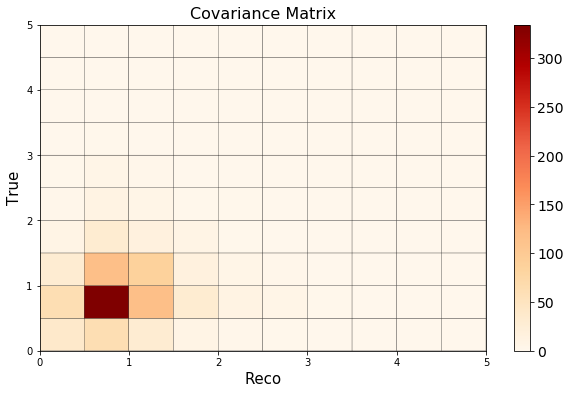

In [27]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reco", fontsize=15)
plt.ylabel("True", fontsize=15)

plt.title('Covariance Matrix', fontsize=16)

#if save: 
#    plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
#    print('saving to: '+save)
plt.show()

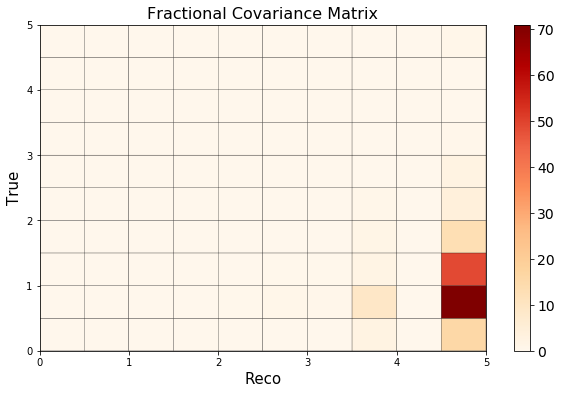

In [28]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_cov_frac, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reco", fontsize=15)
plt.ylabel("True", fontsize=15)

plt.title('Fractional Covariance Matrix', fontsize=16)

#if save: 
#    plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
#    print('saving to: '+save)
plt.show()

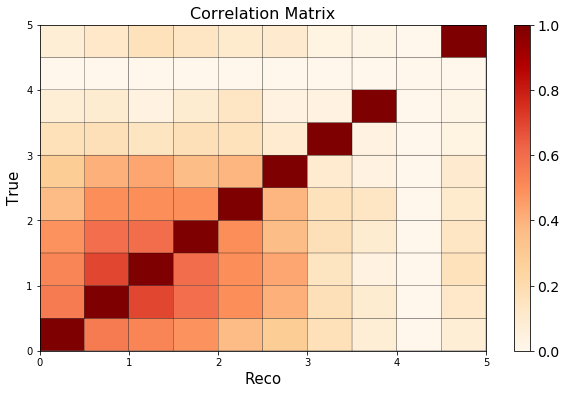

In [29]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_nue_cor, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reco", fontsize=15)
plt.ylabel("True", fontsize=15)

plt.title('Correlation Matrix', fontsize=16)

#if save: 
#    plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
#    print('saving to: '+save)
plt.show()

In [30]:
#print(total_nue_cov)
if isRun3 == False and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_"+ending+".csv", 
               total_nue_cov,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_run3_"+ending+".csv", 
               total_nue_cov,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_comb_"+ending+".csv", 
               total_nue_cov,
               delimiter =", ", 
               fmt ='% s')     

#---------------------------------------------------------

In [31]:
total_numu_cov = numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys

total_numu_cov_frac = total_numu_cov / (n_numu_tot_allsel**2)

print(n_numu_tot_allsel**2)
print("")
print(np.diag(numu_cov))
print("")
print(np.diag(total_numu_cov))
print("")
print(np.diag(total_numu_cov_frac))

##########################################
bins = np.arange(0, 5.5, 0.5)
total_numu_cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
for i in range(len(total_numu_cov)): 
        for j in range(len(total_numu_cov[i])): 
            
            if np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]) != 0: 
                total_numu_cor[i][j] = total_numu_cov[i][j] / (np.sqrt(total_numu_cov[i][i])*np.sqrt(total_numu_cov[j][j]))
                
print("")
print(total_numu_cor)

[2.03762295e+01 2.10530201e+06 3.51421134e+06 7.89823863e+05
 1.48149239e+05 2.30694023e+04 2.90233771e+03 3.69233440e+02
 3.99625039e+01 8.06392583e+00]

[2.82434616e-01 2.76856634e+04 4.73668391e+04 1.72099788e+04
 3.58520881e+03 3.63626384e+02 1.00751359e+02 6.73269980e+00
 3.57880107e+00 8.11712375e-01]

[3.00154472e+00 5.57728747e+04 9.41728982e+04 2.78292091e+04
 5.62305911e+03 6.99359667e+02 1.49895028e+02 1.55432421e+01
 5.24957073e+00 1.45585708e+00]

[0.14730619 0.02649163 0.02679773 0.0352347  0.03795537 0.03031547
 0.05164631 0.04209598 0.13136241 0.18053949]

[[1.0, 0.12975476375048425, 0.12093254101909195, 0.11199039738016883, 0.10135697676636847, 0.08775381463476321, 0.09840480428485966, 0.0994504827206019, 0.0437408538426965, 0.032835618251229326], [0.12975476375048425, 1.0, 0.4807131321244451, 0.5041670284752605, 0.4856176378433625, 0.3990151543604727, 0.46249452131230423, 0.26502876719198876, 0.34300131058398853, 0.2062873545175896], [0.12093254101909195, 0.4807131321

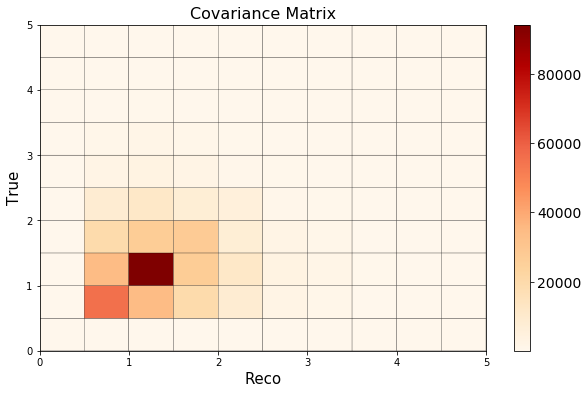

In [32]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_cov, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reco", fontsize=15)
plt.ylabel("True", fontsize=15)

plt.title('Covariance Matrix', fontsize=16)

#if save: 
#    plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
#    print('saving to: '+save)
plt.show()

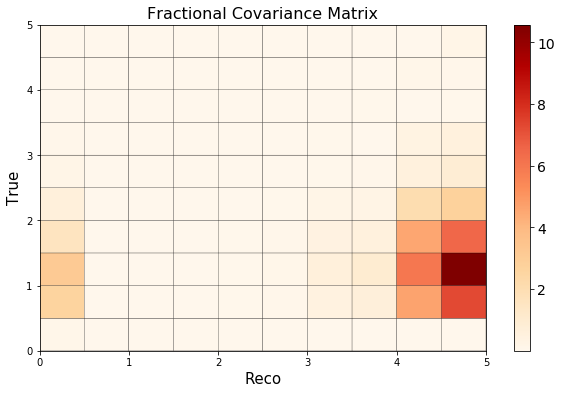

In [33]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_cov_frac, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reco", fontsize=15)
plt.ylabel("True", fontsize=15)

plt.title('Fractional Covariance Matrix', fontsize=16)

#if save: 
#    plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
#    print('saving to: '+save)
plt.show()

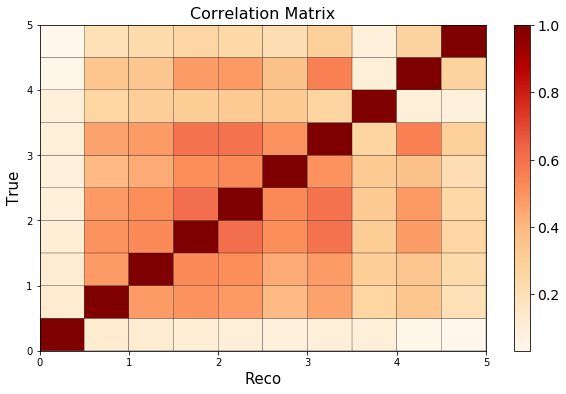

In [34]:
fig = plt.figure(figsize=(10, 6))

plt.pcolor(bins, bins, total_numu_cor, cmap='OrRd', edgecolors='k')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#if pot: 
#    cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

plt.xlim(bins[0], bins[-1])
plt.ylim(bins[0], bins[-1])


plt.xlabel("Reco", fontsize=15)
plt.ylabel("True", fontsize=15)

plt.title('Correlation Matrix', fontsize=16)

#if save: 
#    plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
#    print('saving to: '+save)
plt.show()

In [35]:
#print(type(total_numu_cov))
if isRun3 == False and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_"+ending+".csv", 
               total_numu_cov,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_run3_"+ending+".csv", 
               total_numu_cov,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True:
    np.savetxt("numu_full_500_catsel_nopions_recoE_usingSelection_data_covmat_recoCut_comb_"+ending+".csv", 
               total_numu_cov,
               delimiter =", ", 
               fmt ='% s')     

#---------------------------------------------------------

End note

In [36]:
print(n_nue_tot)

[2.28388663e+01 7.72080309e+01 3.55178261e+01 1.09566554e+01
 4.20505459e+00 1.54243177e+00 4.35153158e-01 5.54237754e-02
 0.00000000e+00 2.02481915e-02]


In [37]:
total_nue_cov_mat = nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys
total_nue_cov_mat_frac = total_nue_cov_mat / n_nue_tot_allsel**2

total_nue_mat_frac = np.nan_to_num(np.sqrt(np.diag(total_nue_cov_mat_frac)))
print(total_nue_mat_frac)

[0.16138957 0.16605749 0.19049765 0.17465625 0.20212552 0.30111446
 0.35535791 0.51457855 0.         0.95891335]


/tmp/ipykernel_8558/3140680572.py:2: RuntimeWarning: invalid value encountered in true_divide
  total_nue_cov_mat_frac = total_nue_cov_mat / n_nue_tot_allsel**2


In [38]:
nue_exp_err = np.sqrt( np.diag((nue_cov + nue_cov_mc_stat + nue_cov_mc_detsys)))
nue_exp_err_frac_sys = np.sqrt( np.diag((nue_cov)))/ n_nue_tot#_allsel
#print("nue_exp_err_frac_sys ", nue_exp_err_frac_sys)
nue_exp_err_frac_stat = np.sqrt( np.diag((nue_cov_mc_stat)))/ n_nue_tot#_allsel
#print("nue_exp_err_frac_stat ", nue_exp_err_frac_stat)
nue_exp_err_frac_detsys = np.sqrt( np.diag((nue_cov_mc_detsys)))/ n_nue_tot#_allsel
#print("nue_exp_err_frac_detsys ", nue_exp_err_frac_detsys)

#print("")
#print("")

numu_exp_err = np.sqrt( np.diag((numu_cov + numu_cov_mc_stat + numu_cov_mc_detsys)))
numu_exp_err_frac_sys = np.sqrt( np.diag((numu_cov)))/ n_numu_tot#_allsel
#print("numu_exp_err_frac_sys ", numu_exp_err_frac_sys)
numu_exp_err_frac_stat = np.sqrt( np.diag((numu_cov_mc_stat)))/ n_numu_tot#_allsel
#print("numu_exp_err_frac_stat ", numu_exp_err_frac_stat)
numu_exp_err_frac_detsys = np.sqrt( np.diag((numu_cov_mc_detsys)))/ n_numu_tot#_allsel
#print("numu_exp_err_frac_detsys ", numu_exp_err_frac_detsys)

print("")
print("")
print("nue_exp_err ", nue_exp_err)
print("")
nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot_allsel)                   #wincludes all errors
print("nue_frac_err ",nue_frac_err)
print("#########################################################")
print("numu_exp_err ", numu_exp_err)
numu_frac_err = numu_exp_err / n_numu_tot_allsel
print("")
print("numu_frac_err ", numu_frac_err)



nue_exp_err  [ 6.2176174  18.28473923  9.32461058  2.99405451  1.21844581  0.79253808
  0.52151356  0.05001155  0.          0.02868767]

nue_frac_err  [0.16138957 0.16605749 0.19049765 0.17465625 0.20212552 0.30111446
 0.35535791 0.51457855 0.         0.95891335]
#########################################################
numu_exp_err  [  1.73249667 236.16281395 306.87603067 166.82088914  74.98705962
  26.44540918  12.2431625    3.94249187   2.29119417   1.20658903]

numu_frac_err  [0.38380488 0.16276249 0.16370013 0.18770909 0.19482138 0.17411337
 0.22725824 0.20517304 0.36243952 0.42489939]


/tmp/ipykernel_8558/2636994171.py:2: RuntimeWarning: invalid value encountered in true_divide
  nue_exp_err_frac_sys = np.sqrt( np.diag((nue_cov)))/ n_nue_tot#_allsel
/tmp/ipykernel_8558/2636994171.py:4: RuntimeWarning: invalid value encountered in true_divide
  nue_exp_err_frac_stat = np.sqrt( np.diag((nue_cov_mc_stat)))/ n_nue_tot#_allsel
/tmp/ipykernel_8558/2636994171.py:6: RuntimeWarning: invalid value encountered in true_divide
  nue_exp_err_frac_detsys = np.sqrt( np.diag((nue_cov_mc_detsys)))/ n_nue_tot#_allsel
/tmp/ipykernel_8558/2636994171.py:24: RuntimeWarning: invalid value encountered in true_divide
  nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot_allsel)                   #wincludes all errors


### Plots

In [39]:
nue_bin_edges = np.arange(0, 5.5, 0.5)
nue_bincenters = 0.5 * (nue_bin_edges[1:] + nue_bin_edges[:-1])
nue_bin_size = [(nue_bin_edges[i + 1] - nue_bin_edges[i]) / 2
            for i in range(len(nue_bin_edges) - 1)]

nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot_allsel)
print(nue_frac_err)

nue_allsel_ax1.bar(nue_bincenters, nue_exp_err*2,width=[n*2 for n in nue_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_nue_tot_allsel-nue_exp_err))

[0.16138957 0.16605749 0.19049765 0.17465625 0.20212552 0.30111446
 0.35535791 0.51457855 0.         0.95891335]


/tmp/ipykernel_8558/1249459965.py:6: RuntimeWarning: invalid value encountered in true_divide
  nue_frac_err = np.nan_to_num(nue_exp_err / n_nue_tot_allsel)


<BarContainer object of 10 artists>

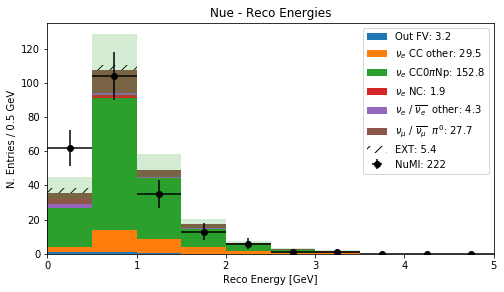

In [40]:
nue_allsel_fig

In [41]:
if isRun3 == False and isCombined == False:
    nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_recoE_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_recoE_run3_"+ending+".pdf")  
elif isCombined == True:
    nue_allsel_fig.savefig("batch_nue_fig_full_500_catsel_nopions_recoE_comb_"+ending+".pdf")     

In [42]:
numu_bin_edges = np.arange(0, 5.5, 0.5)
numu_bincenters = 0.5 * (numu_bin_edges[1:] + numu_bin_edges[:-1])
numu_bin_size = [(numu_bin_edges[i + 1] - numu_bin_edges[i]) / 2
            for i in range(len(numu_bin_edges) - 1)]

numu_frac_err = numu_exp_err / n_numu_tot_allsel
print(numu_frac_err)

numu_allsel_ax1.bar(numu_bincenters, numu_exp_err*2,width=[n*2 for n in numu_bin_size],facecolor='tab:green',alpha=0.2,bottom=(n_numu_tot_allsel-numu_exp_err))

[0.38380488 0.16276249 0.16370013 0.18770909 0.19482138 0.17411337
 0.22725824 0.20517304 0.36243952 0.42489939]


<BarContainer object of 10 artists>

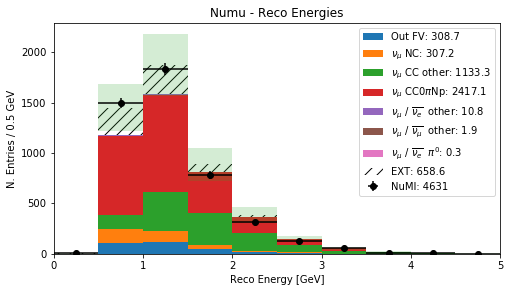

In [43]:
numu_allsel_fig

In [44]:
if isRun3 == False and isCombined == False:
    numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_recoE_"+ending+".pdf")
elif isRun3 == True and isCombined == False:
    numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_recoE_run3_"+ending+".pdf")  
elif isCombined == True:
    numu_allsel_fig.savefig("batch_numu_fig_full_500_catsel_nopions_recoE_comb_"+ending+".pdf") 

(0, 1.5)

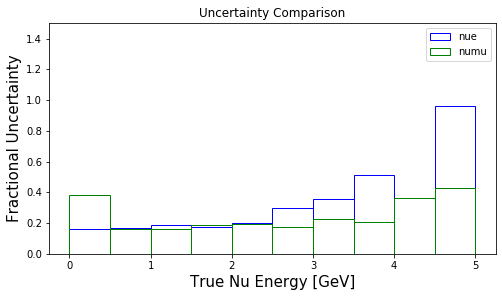

In [45]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(errors_gs[0])


bins = np.arange(0, 5.5, 0.5)
count = [0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]



sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
#sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('True Nu Energy [GeV]', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()
#errors_ax1.set_xlim([0, 5])
errors_ax1.set_ylim([0, 1.5])

## For Blockwise Unfolding

Data (MC) Values

In [46]:
print("n_nue_tot", n_nue_tot)

n_nue_tot [2.28388663e+01 7.72080309e+01 3.55178261e+01 1.09566554e+01
 4.20505459e+00 1.54243177e+00 4.35153158e-01 5.54237754e-02
 0.00000000e+00 2.02481915e-02]


In [47]:
print("n_numu_tot", n_numu_tot)

n_numu_tot [1.37096072e+00 8.17427041e+02 1.00388679e+03 4.65173461e+02
 1.79954502e+02 5.90234952e+01 2.64946265e+01 4.51628418e+00
 3.56473489e+00 4.20102136e-01]


In [48]:
nue_numu_tot = np.concatenate((n_nue_tot, n_numu_tot), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))

[2.28388663e+01 7.72080309e+01 3.55178261e+01 1.09566554e+01
 4.20505459e+00 1.54243177e+00 4.35153158e-01 5.54237754e-02
 0.00000000e+00 2.02481915e-02 1.37096072e+00 8.17427041e+02
 1.00388679e+03 4.65173461e+02 1.79954502e+02 5.90234952e+01
 2.64946265e+01 4.51628418e+00 3.56473489e+00 4.20102136e-01]
20


Text(0.5, 1.0, 'Nue, Numu, Data Selected Values')

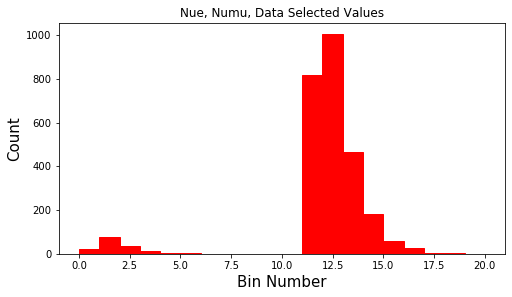

In [49]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

In [50]:
if isRun3 == False and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_run3_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True:
    np.savetxt("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')    

Systematics

In [50]:
isRun3 = False

#to use both Run1 and Run3
isCombined = True

In [51]:
if isRun3 == False and isCombined == False:
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict = nue_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_dirt_ppfx_detvar_dict = pd.read_csv("nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_dirt_ppfx_detvar_dict = nue_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict = nue_dirt_genie_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_reint_detvar_dict = pd.read_csv("nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_reint_detvar_dict.pop("Unnamed: 0")

    nue_dirt_reint_detvar_dict = nue_dirt_reint_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_geo_detvar_dict = pd.read_csv("nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_geo_detvar_dict.pop("Unnamed: 0")

    nue_dirt_geo_detvar_dict = nue_dirt_geo_detvar_dict.to_dict('series')
    
elif isRun3 == True and isCombined == False:
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict = nue_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_dirt_ppfx_detvar_dict = pd.read_csv("nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_dirt_ppfx_detvar_dict = nue_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict = nue_dirt_genie_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_reint_detvar_dict = pd.read_csv("nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_reint_detvar_dict.pop("Unnamed: 0")

    nue_dirt_reint_detvar_dict = nue_dirt_reint_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_geo_detvar_dict = pd.read_csv("nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_geo_detvar_dict.pop("Unnamed: 0")

    nue_dirt_geo_detvar_dict = nue_dirt_geo_detvar_dict.to_dict('series')
    
elif isCombined == True:
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict_run1 = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict_run1 = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict_run1 = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict_run1 = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict_run1 = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict_run1 = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict_run1 = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict_run1 = nue_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_dirt_ppfx_detvar_dict = pd.read_csv("nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_dirt_ppfx_detvar_dict_run1 = nue_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict_run1 = nue_dirt_genie_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_reint_detvar_dict = pd.read_csv("nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_reint_detvar_dict.pop("Unnamed: 0")

    nue_dirt_reint_detvar_dict_run1 = nue_dirt_reint_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_geo_detvar_dict = pd.read_csv("nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    nue_dirt_geo_detvar_dict.pop("Unnamed: 0")

    nue_dirt_geo_detvar_dict_run1 = nue_dirt_geo_detvar_dict.to_dict('series')
    
#############################################################################################################
    nue_nue_ppfx_detvar_dict = pd.read_csv("nue_nue_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_nue_ppfx_detvar_dict_run3 = nue_nue_ppfx_detvar_dict.to_dict('series')

    #------------

    nue_nue_genie_detvar_dict = pd.read_csv("nue_nue_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_genie_detvar_dict.pop("Unnamed: 0")

    nue_nue_genie_detvar_dict_run3 = nue_nue_genie_detvar_dict.to_dict('series')

    #------------

    nue_nue_reint_detvar_dict = pd.read_csv("nue_nue_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_reint_detvar_dict.pop("Unnamed: 0")

    nue_nue_reint_detvar_dict_run3 = nue_nue_reint_detvar_dict.to_dict('series')

    #------------

    nue_nue_geo_detvar_dict = pd.read_csv("nue_nue_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_nue_geo_detvar_dict.pop("Unnamed: 0")

    nue_nue_geo_detvar_dict_run3 = nue_nue_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_mc_ppfx_detvar_dict = pd.read_csv("nue_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_mc_ppfx_detvar_dict_run3 = nue_mc_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_mc_genie_detvar_dict = pd.read_csv("nue_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_genie_detvar_dict.pop("Unnamed: 0")

    nue_mc_genie_detvar_dict_run3 = nue_mc_genie_detvar_dict.to_dict('series')

    #---------------

    nue_mc_reint_detvar_dict = pd.read_csv("nue_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_reint_detvar_dict.pop("Unnamed: 0")

    nue_mc_reint_detvar_dict_run3 = nue_mc_reint_detvar_dict.to_dict('series')

    #---------------

    nue_mc_geo_detvar_dict = pd.read_csv("nue_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_mc_geo_detvar_dict.pop("Unnamed: 0")

    nue_mc_geo_detvar_dict_run3 = nue_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    nue_dirt_ppfx_detvar_dict = pd.read_csv("nue_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    nue_dirt_ppfx_detvar_dict_run3 = nue_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_genie_detvar_dict = pd.read_csv("nue_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_genie_detvar_dict.pop("Unnamed: 0")

    nue_dirt_genie_detvar_dict_run3 = nue_dirt_genie_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_reint_detvar_dict = pd.read_csv("nue_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_reint_detvar_dict.pop("Unnamed: 0")

    nue_dirt_reint_detvar_dict_run3 = nue_dirt_reint_detvar_dict.to_dict('series')

    #---------------

    nue_dirt_geo_detvar_dict = pd.read_csv("nue_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    nue_dirt_geo_detvar_dict.pop("Unnamed: 0")

    nue_dirt_geo_detvar_dict_run3 = nue_dirt_geo_detvar_dict.to_dict('series')

In [52]:
if isRun3 == False and isCombined == False:
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict = numu_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    numu_dirt_ppfx_detvar_dict = pd.read_csv("numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_dirt_ppfx_detvar_dict = numu_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict = numu_dirt_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_reint_detvar_dict = pd.read_csv("numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_reint_detvar_dict.pop("Unnamed: 0")

    numu_dirt_reint_detvar_dict = numu_dirt_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_geo_detvar_dict = pd.read_csv("numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_geo_detvar_dict.pop("Unnamed: 0")

    numu_dirt_geo_detvar_dict = numu_dirt_geo_detvar_dict.to_dict('series')
    
elif isRun3 == True and isCombined == False:
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict = numu_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    numu_dirt_ppfx_detvar_dict = pd.read_csv("numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_dirt_ppfx_detvar_dict = numu_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict = numu_dirt_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_reint_detvar_dict = pd.read_csv("numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_reint_detvar_dict.pop("Unnamed: 0")

    numu_dirt_reint_detvar_dict = numu_dirt_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_geo_detvar_dict = pd.read_csv("numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_geo_detvar_dict.pop("Unnamed: 0")

    numu_dirt_geo_detvar_dict = numu_dirt_geo_detvar_dict.to_dict('series')
    
elif isCombined == True:
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict_run1 = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict_run1 = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict_run1 = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict_run1 = numu_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    numu_dirt_ppfx_detvar_dict = pd.read_csv("numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_dirt_ppfx_detvar_dict_run1 = numu_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict_run1 = numu_dirt_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_reint_detvar_dict = pd.read_csv("numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_reint_detvar_dict.pop("Unnamed: 0")

    numu_dirt_reint_detvar_dict_run1 = numu_dirt_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_geo_detvar_dict = pd.read_csv("numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_"+ending+".csv")

    numu_dirt_geo_detvar_dict.pop("Unnamed: 0")

    numu_dirt_geo_detvar_dict_run1 = numu_dirt_geo_detvar_dict.to_dict('series')
    
#################################################################################################################
    numu_mc_ppfx_detvar_dict = pd.read_csv("numu_mc_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_mc_ppfx_detvar_dict_run3 = numu_mc_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_genie_detvar_dict = pd.read_csv("numu_mc_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_genie_detvar_dict.pop("Unnamed: 0")

    numu_mc_genie_detvar_dict_run3 = numu_mc_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_reint_detvar_dict = pd.read_csv("numu_mc_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_reint_detvar_dict.pop("Unnamed: 0")

    numu_mc_reint_detvar_dict_run3 = numu_mc_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_mc_geo_detvar_dict = pd.read_csv("numu_mc_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_mc_geo_detvar_dict.pop("Unnamed: 0")

    numu_mc_geo_detvar_dict_run3 = numu_mc_geo_detvar_dict.to_dict('series')

    #####################################################################################

    numu_dirt_ppfx_detvar_dict = pd.read_csv("numu_dirt_syserss_df_ppfx_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_ppfx_detvar_dict.pop("Unnamed: 0")

    numu_dirt_ppfx_detvar_dict_run3 = numu_dirt_ppfx_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_genie_detvar_dict = pd.read_csv("numu_dirt_syserss_df_genie_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_genie_detvar_dict.pop("Unnamed: 0")

    numu_dirt_genie_detvar_dict_run3 = numu_dirt_genie_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_reint_detvar_dict = pd.read_csv("numu_dirt_syserss_df_reint_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_reint_detvar_dict.pop("Unnamed: 0")

    numu_dirt_reint_detvar_dict_run3 = numu_dirt_reint_detvar_dict.to_dict('series')

    #---------------------

    numu_dirt_geo_detvar_dict = pd.read_csv("numu_dirt_syserss_df_geo_detvar_dict_full_500_catsel_nopions_recoE_usingSelection_recoCut_run3_"+ending+".csv")

    numu_dirt_geo_detvar_dict.pop("Unnamed: 0")

    numu_dirt_geo_detvar_dict_run3 = numu_dirt_geo_detvar_dict.to_dict('series')

In [53]:
if isCombined == True:
    def mergeDictionary(dict_1, dict_2):
        dict_3 = {**dict_1, **dict_2}
        for key, value in dict_3.items():
            if key in dict_1 and key in dict_2:
                    dict_3[key] = value + dict_1[key]
        return dict_3

    def combine_dicts(mydict):
        while len(mydict) > 1:
            i = 0
            dict_3 = mergeDictionary(mydict[i], mydict[i+1]) 
            mydict.pop(0)
            mydict[0] = dict_3
        return mydict

    pup = [nue_nue_ppfx_detvar_dict_run1, nue_nue_ppfx_detvar_dict_run3 ]
    nue_nue_ppfx_detvar_dict = combine_dicts(pup)[0]

    pup = [nue_nue_genie_detvar_dict_run1, nue_nue_genie_detvar_dict_run3 ]
    nue_nue_genie_detvar_dict = combine_dicts(pup)[0]
    
    pup = [nue_nue_reint_detvar_dict_run1, nue_nue_reint_detvar_dict_run3 ]
    nue_nue_reint_detvar_dict = combine_dicts(pup)[0]
    
    pup = [nue_nue_geo_detvar_dict_run1, nue_nue_geo_detvar_dict_run3 ]
    nue_nue_geo_detvar_dict = combine_dicts(pup)[0]
    
    #############
    
    pup = [nue_mc_ppfx_detvar_dict_run1, nue_mc_ppfx_detvar_dict_run3 ]
    nue_mc_ppfx_detvar_dict = combine_dicts(pup)[0]

    pup = [nue_mc_genie_detvar_dict_run1, nue_mc_genie_detvar_dict_run3 ]
    nue_mc_genie_detvar_dict = combine_dicts(pup)[0]
    
    pup = [nue_mc_reint_detvar_dict_run1, nue_mc_reint_detvar_dict_run3 ]
    nue_mc_reint_detvar_dict = combine_dicts(pup)[0]
    
    pup = [nue_mc_geo_detvar_dict_run1, nue_mc_geo_detvar_dict_run3 ]
    nue_mc_geo_detvar_dict = combine_dicts(pup)[0]
    
    #############
    
    pup = [nue_dirt_ppfx_detvar_dict_run1, nue_dirt_ppfx_detvar_dict_run3 ]
    nue_dirt_ppfx_detvar_dict = combine_dicts(pup)[0]

    pup = [nue_dirt_genie_detvar_dict_run1, nue_dirt_genie_detvar_dict_run3 ]
    nue_dirt_genie_detvar_dict = combine_dicts(pup)[0]
    
    pup = [nue_dirt_reint_detvar_dict_run1, nue_dirt_reint_detvar_dict_run3 ]
    nue_dirt_reint_detvar_dict = combine_dicts(pup)[0]
    
    pup = [nue_dirt_geo_detvar_dict_run1, nue_dirt_geo_detvar_dict_run3 ]
    nue_dirt_geo_detvar_dict = combine_dicts(pup)[0]
    
    #############
    #############
    
    pup = [numu_mc_ppfx_detvar_dict_run1, numu_mc_ppfx_detvar_dict_run3 ]
    numu_mc_ppfx_detvar_dict = combine_dicts(pup)[0]

    pup = [numu_mc_genie_detvar_dict_run1, numu_mc_genie_detvar_dict_run3 ]
    numu_mc_genie_detvar_dict = combine_dicts(pup)[0]
    
    pup = [numu_mc_reint_detvar_dict_run1, numu_mc_reint_detvar_dict_run3 ]
    numu_mc_reint_detvar_dict = combine_dicts(pup)[0]
    
    pup = [numu_mc_geo_detvar_dict_run1, numu_mc_geo_detvar_dict_run3 ]
    numu_mc_geo_detvar_dict = combine_dicts(pup)[0]

    #############    
    
    pup = [numu_dirt_ppfx_detvar_dict_run1, numu_dirt_ppfx_detvar_dict_run3 ]
    numu_dirt_ppfx_detvar_dict = combine_dicts(pup)[0]

    pup = [numu_dirt_genie_detvar_dict_run1, numu_dirt_genie_detvar_dict_run3 ]
    numu_dirt_genie_detvar_dict = combine_dicts(pup)[0]
    
    pup = [numu_dirt_reint_detvar_dict_run1, numu_dirt_reint_detvar_dict_run3 ]
    numu_dirt_reint_detvar_dict = combine_dicts(pup)[0]
    
    pup = [numu_dirt_geo_detvar_dict_run1, numu_dirt_geo_detvar_dict_run3 ]
    numu_dirt_geo_detvar_dict = combine_dicts(pup)[0]   


[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


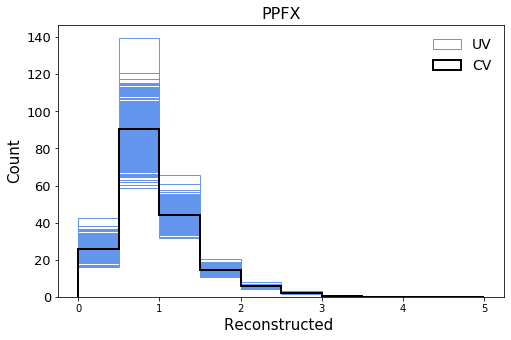

In [54]:
import matplotlib.pyplot as plt
import matplotlib




n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)

fig = plt.figure(figsize=(8, 5)) 


for variation in nue_nue_ppfx_detvar_dict.keys(): 

    if n==0: 
        plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_ppfx_detvar_dict[variation], 
             linewidth=1, color='cornflowerblue', label='UV')

    else: 
        plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_ppfx_detvar_dict[variation],
             linewidth=1, color='cornflowerblue')

    n+=1   


plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_nue_ppfx_detvar_dict['CV'], color='black', label='CV', linewidth=2)

plt.title('PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15) # 2.68294E22
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)

#plt.xlim(xlow, xhigh)


plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


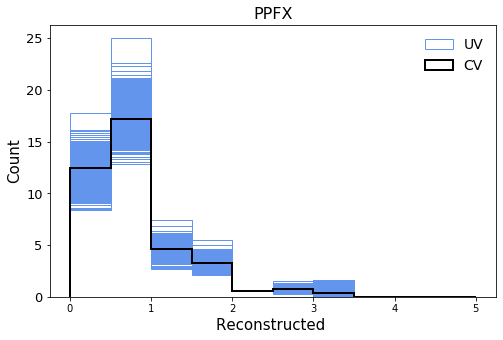

In [55]:
import matplotlib.pyplot as plt
import matplotlib




n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)

fig = plt.figure(figsize=(8, 5)) 


for variation in nue_mc_ppfx_detvar_dict.keys(): 

    if n==0: 
        plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_ppfx_detvar_dict[variation], 
             linewidth=1, color='cornflowerblue', label='UV')

    else: 
        plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_ppfx_detvar_dict[variation],
             linewidth=1, color='cornflowerblue')

    n+=1   


plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_mc_ppfx_detvar_dict['CV'], color='black', label='CV', linewidth=2)

plt.title('PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15) # 2.68294E22
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)

#plt.xlim(xlow, xhigh)


plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


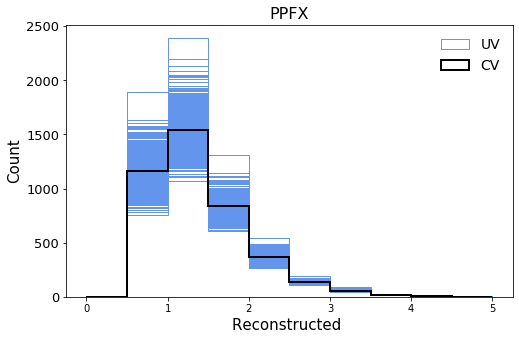

In [56]:
import matplotlib.pyplot as plt
import matplotlib



n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)

fig = plt.figure(figsize=(8, 5)) 


for variation in numu_mc_ppfx_detvar_dict.keys(): 

    if n==0: 
        plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_ppfx_detvar_dict[variation], 
             linewidth=1, color='cornflowerblue', label='UV')

    else: 
        plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_ppfx_detvar_dict[variation],
             linewidth=1, color='cornflowerblue')

    n+=1   


plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_mc_ppfx_detvar_dict['CV'], color='black', label='CV', linewidth=2)

plt.title('PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15) # 2.68294E22
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)

#plt.xlim(xlow, xhigh)

#plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/combined/detsys_shr_energy_cali_fhc_intrinsic.pdf", 
#            transparent=True, bbox_inches='tight')

plt.show()

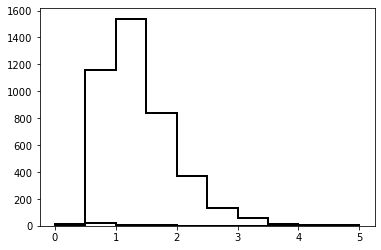

In [57]:
nue_mc_CV = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_mc_ppfx_detvar_dict['CV'], color='black', label='CV', linewidth=2)#

numu_mc_CV = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_mc_ppfx_detvar_dict['CV'], color='black', label='CV', linewidth=2)

nue_numu_mc_CV = np.concatenate((nue_mc_CV[0], numu_mc_CV[0]), axis=0)
#print(nue_numu_mc_tot)

Text(0.5, 1.0, 'Nue, Numu, Values')

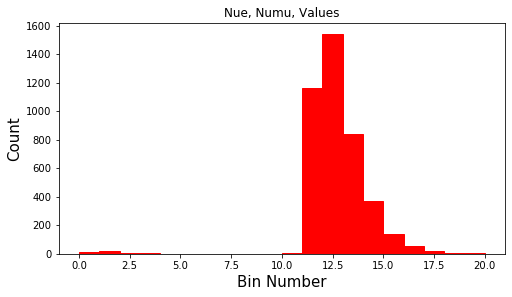

In [58]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


#bins = np.arange(0, 10.5, 0.5)
#count = np.linspace(0.1, 9.6, 20)
bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_mc_CV)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 0.01])

In [59]:
def calcCov(var, bins, ncv_nu, ncv_total, uni_counts, NUnis, plot=False, save=False, axis_label=None, pot=None, isrun3=False, xticks=None, xhigh=None): 
    
    # ncv nu is the neutrino event rate -- i.e. what gets varied in the systematics 
    # ncv total is the total event rate -- (MC + EXT or estimated signal)
    # when background subtracting these two are the same  
    
    # compute the cov matrix 
    cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
    
    N = NUnis
    print('contribution = 1/', N)

    #####################################################
    
    for k in range(len(uni_counts)): 
        
        uni = uni_counts[k]
        #print("uni = ", uni)

        for i in range(len(bins)-1): 

            cvi = ncv_nu[i]
            uvi = uni[i]
            #print("uvi = ", uvi)

            for j in range(len(bins)-1): 
                
                cvj = ncv_nu[j]
                uvj = uni[j]
        
                c = ((uvi - cvi)*(uvj - cvj)) / N

                cov[i][j] += c
                
                #print("ncv_total[i]*ncv_total[j] ", ncv_total[i]*ncv_total[j])
                #print(ncv_total[i])
                if ncv_total[i]*ncv_total[j] != 0: 
                    frac_cov[i][j] += c/(ncv_total[i]*ncv_total[j])
                    #frac_cov[i][j] = c/(ncv_total[i]*ncv_total[j])
            
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, cov, cmap='OrRd', edgecolors='k')
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)

        plt.title('Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_cov.pdf", transparent=True, bbox_inches='tight') 
            print('saving to: '+save)
        plt.show()
        
        ##################################
        # fractional covariance 
        fig = plt.figure(figsize=(10, 6))
        
        plt.pcolor(bins, bins, frac_cov, cmap='OrRd', edgecolors='k')#, vmin=0, vmax=.03)
            
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
        
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])

        plt.title('Fractional Covariance Matrix', fontsize=16)
        
        if save: 
            plt.savefig(save+var+"_frac_cov.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################    
    # compute the corr matrix 

    for i in range(len(cov)): 
        for j in range(len(cov[i])): 
            
            #print(i, j, cov[i][j], cov[i][i], cov[j][j])

            if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
                cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))
            
            #print(cor[i][j])
    
    #####################################################
    
    if plot: 
        fig = plt.figure(figsize=(10, 6))

        plt.pcolor(bins, bins, cor, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=14)
    

        if axis_label is not None: 
            plt.xlabel(axis_label, fontsize=15)
            plt.ylabel(axis_label, fontsize=15)
        else: 
            plt.xlabel(var, fontsize=15)
            plt.ylabel(var, fontsize=15)
            
        plt.xticks(xticks, fontsize=13)
        plt.yticks(xticks,fontsize=13)
        
        if pot: 
            cbar.set_label(label="$\\nu^{2}$ / "+pot+"$^{2}$", fontsize=15)
        
        if xhigh: 
            plt.xlim(bins[0], xhigh)
            plt.ylim(bins[0], xhigh)
            
        else: 
            plt.xlim(bins[0], bins[-1])
            plt.ylim(bins[0], bins[-1])
            
        plt.title('Correlation Matrix', fontsize=16)
        if save: 
            plt.savefig(save+var+"_cor.pdf", transparent=True, bbox_inches='tight') 
        plt.show()
        
    #####################################################
    
    # sys_err = [np.sqrt(x) for x in np.diagonal(cov)]
    # percent error = [y/z for y,z in zip(sys_err, ncv)] # w.r.t. to whatever event rate is being used (total or background subtracted)
        
    dictionary = {
        'cov' : cov, 
        'frac_cov' : frac_cov, 
        'cor' : cor,
        'fractional_uncertainty' : np.sqrt(np.diag(frac_cov))
    }
           
    return dictionary

Mc dataframe

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


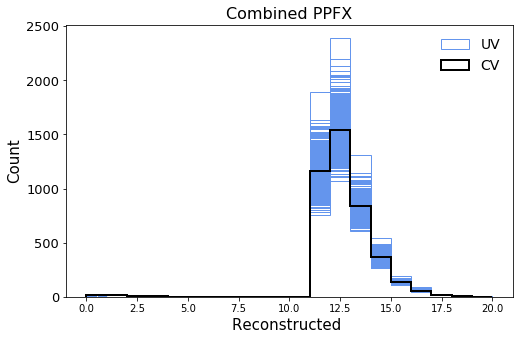

In [60]:
################
####ppfx########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_mc_ppfx_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_ppfx_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_ppfx_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_ppfx_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_ppfx_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_mc_ppfx_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_mc_ppfx_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [61]:

bins = bins_full
print(bins_full)


detsys_fullvars_mc_ppfx = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_mc_ppfx[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[12.470060586929321, 17.14548683166504, 4.588237762451172, 3.254785895347595, 0.5585067942738533, 0.7961539477109909, 0.36964404582977295, 0.0, 0.0, 0.0, 2.4216887950897217, 1159.094970703125, 1539.6071166992188, 839.7886657714844, 367.5838165283203, 135.811767578125, 56.577415466308594, 16.82831621170044, 6.737833738327026, 2.6687548458576202]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [62]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_mc_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_mc_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_mc_ppfx = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8558/3322636866.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_mc_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8558/3322636866.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_mc_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


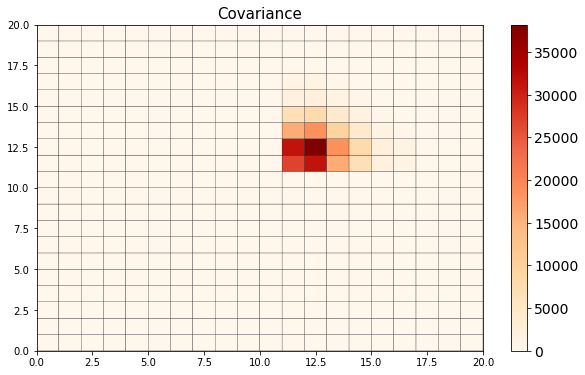

In [63]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_mc_ppfx['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


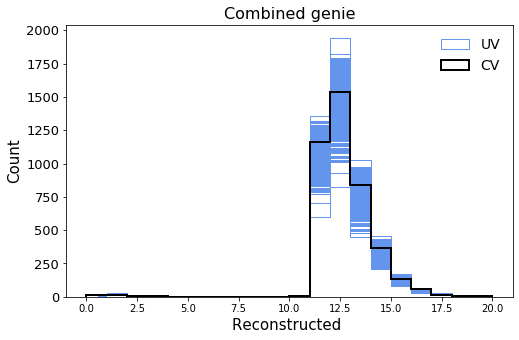

In [64]:
################
####genie########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_mc_genie_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_genie_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_genie_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_mc_genie_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_mc_genie_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined genie', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [65]:

bins = bins_full
print(bins_full)


detsys_fullvars_mc_genie = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_mc_genie[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation]], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [66]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_mc_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_mc_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_mc_genie = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8558/2988810523.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_mc_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8558/2988810523.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_mc_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


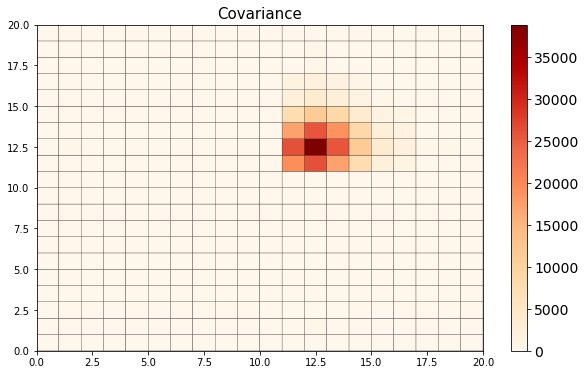

In [67]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_mc_genie['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


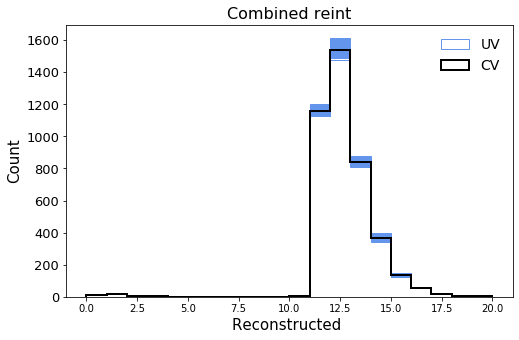

In [68]:
################
####reint########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_mc_reint_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_reint_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_reint_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_mc_reint_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_mc_reint_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined reint', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [69]:

bins = bins_full
print(bins_full)


detsys_fullvars_mc_reint = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_mc_reint[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500


In [70]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_mc_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_mc_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_mc_reint = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8558/1565887044.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_mc_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8558/1565887044.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_mc_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


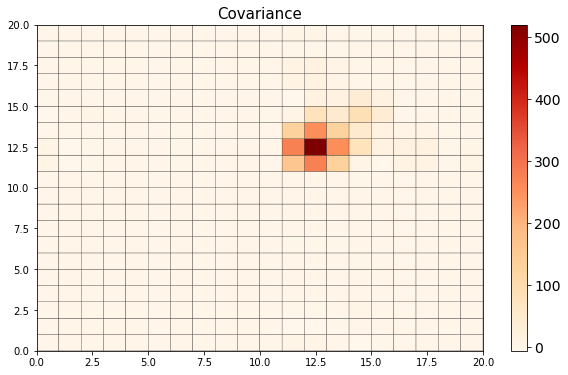

In [71]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_mc_reint['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


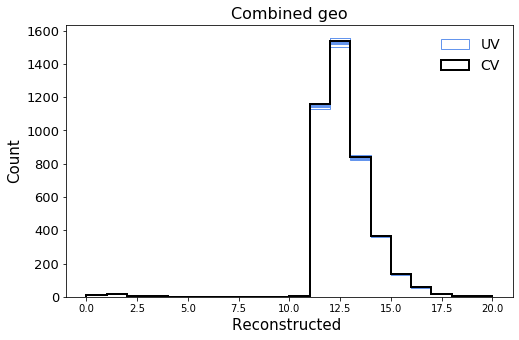

In [72]:
################
####geo########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_mc_geo_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_mc_geo_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_mc_geo_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_mc_geo_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_mc_geo_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined geo', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [73]:

bins = bins_full
print(bins_full)


detsys_fullvars_mc_geo = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_mc_geo[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 2)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2


In [74]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_mc_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_mc_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_mc_geo = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8558/2755882043.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_mc_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8558/2755882043.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_mc_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


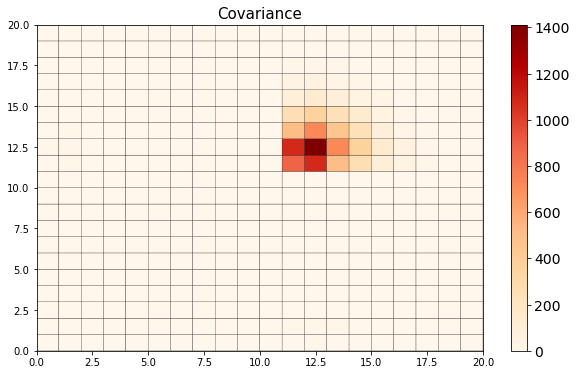

In [75]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_mc_geo['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

##geo will need different CV values for each one

Dirt dataframe

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


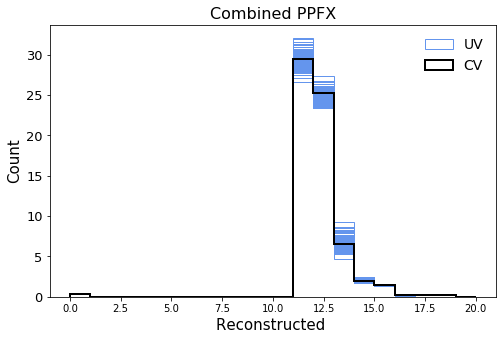

In [76]:
################
####ppfx########
################

import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_dirt_ppfx_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_ppfx_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_ppfx_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_ppfx_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_ppfx_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_dirt_ppfx_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_dirt_ppfx_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [77]:
bins = bins_full
print(bins_full)


detsys_fullvars_dirt_ppfx = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_dirt_ppfx[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

In [78]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_dirt_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_dirt_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_dirt_ppfx = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8558/2387508921.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_dirt_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8558/2387508921.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_dirt_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


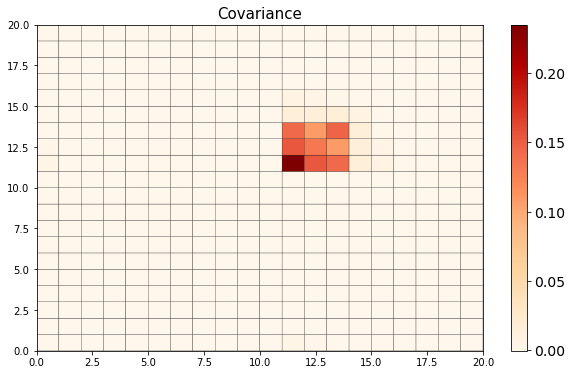

In [79]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_dirt_ppfx['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [80]:
detsys_dict_dirt_ppfx['cov']

[[0.0004656190171703126,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.004008667264800486,
  0.002521120241772454,
  0.00010550463055234395,
  -0.000447219171332815,
  0.0004453230057799866,
  0.00014700187086548114,
  -3.8641836981934437e-19,
  7.828598626156327e-19,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


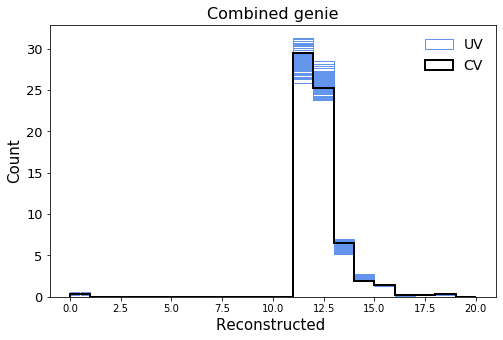

In [81]:
################
####genie########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_dirt_genie_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_genie_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_genie_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_dirt_genie_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_dirt_genie_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined genie', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [82]:
bins = bins_full
print(bins_full)


detsys_fullvars_dirt_genie = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_dirt_genie[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation]], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [83]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_dirt_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_dirt_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_dirt_genie = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8558/1668627413.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_dirt_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8558/1668627413.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_dirt_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


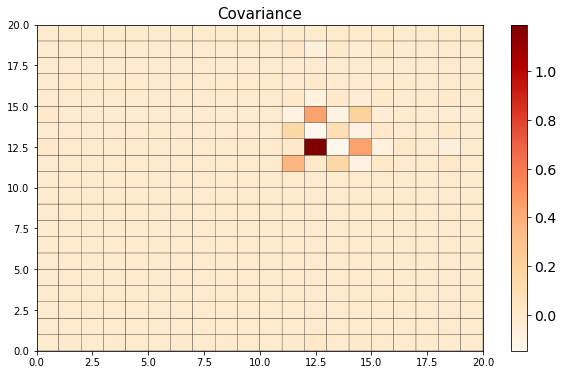

In [84]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_dirt_genie['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


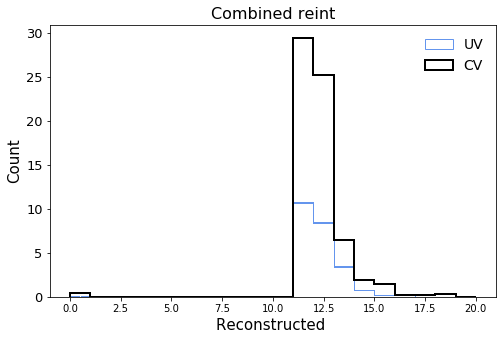

In [85]:
################
####reint########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 

#print(numu_dirt_reint_detvar_dict.keys())

for variation in nue_dirt_reint_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_reint_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_reint_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_dirt_reint_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_dirt_reint_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined reint', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [86]:
bins = bins_full
print(bins_full)


detsys_fullvars_dirt_reint = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_dirt_reint[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

In [87]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_dirt_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_dirt_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_dirt_reint = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8558/3434269430.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_dirt_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8558/3434269430.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_dirt_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


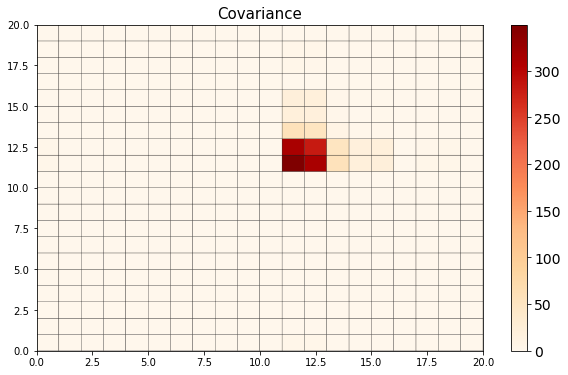

In [88]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_dirt_reint['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


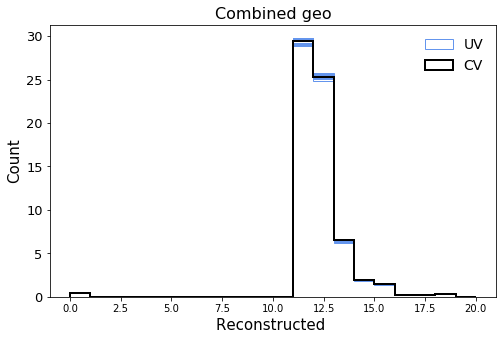

In [89]:
################
####geo########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_dirt_geo_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_dirt_geo_detvar_dict[variation],
             linewidth=1, color='white')
        numu = plt.hist(bin_centers, bins, histtype='step', weights=numu_dirt_geo_detvar_dict[variation],
             linewidth=1, color='white')
        nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_dirt_geo_detvar_dict['CV'], color='white') 


numu = plt.hist(bin_centers, bins, histtype='step', 
                 weights=numu_dirt_geo_detvar_dict['CV'], color='white')

nue_numu = np.concatenate((nue[0], numu[0]), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined geo', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [90]:
bins = bins_full
print(bins_full)


detsys_fullvars_dirt_geo = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_dirt_geo[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 2)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2


In [91]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_dirt_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_dirt_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_dirt_geo = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8558/2150283862.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_dirt_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8558/2150283862.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_dirt_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


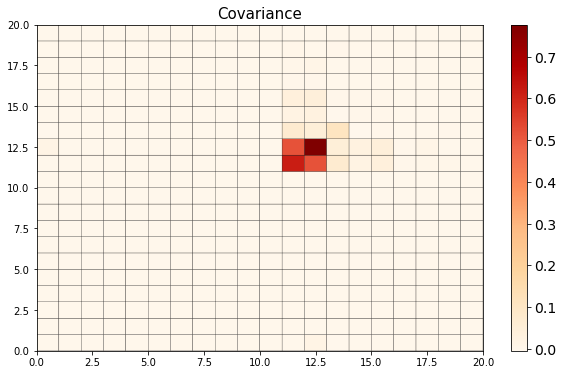

In [92]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_dirt_geo['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



Nue Dataframe

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


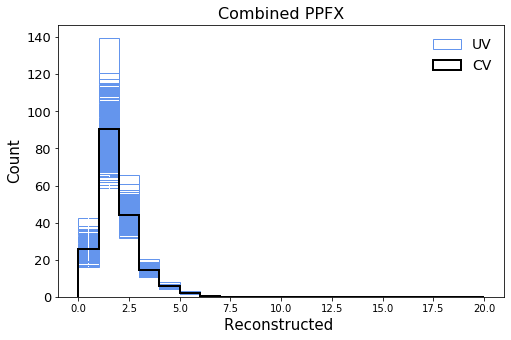

In [93]:
################
####ppfx########
################

import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_nue_ppfx_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_ppfx_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_ppfx_detvar_dict[variation],
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_nue_ppfx_detvar_dict['CV'], color='white') 


numu = [0]*10

nue_numu = np.concatenate((nue[0], numu), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined PPFX', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [94]:
bins = bins_full
print(bins_full)


detsys_fullvars_nue_ppfx = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_nue_ppfx[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [95]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_nue_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_nue_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_nue_ppfx = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
}

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8558/1244847139.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_nue_ppfx[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8558/1244847139.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_nue_ppfx[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


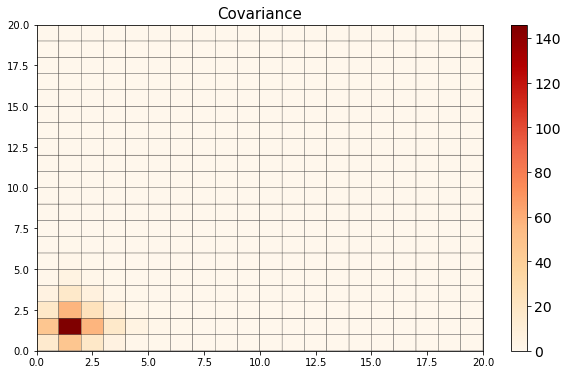

In [96]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_nue_ppfx['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


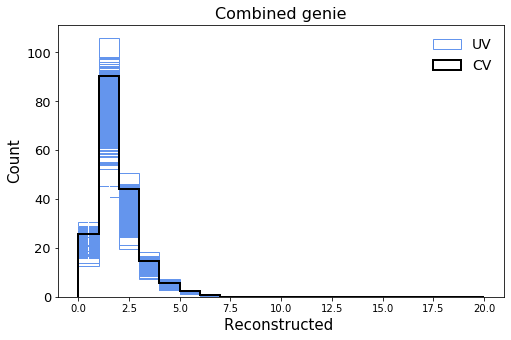

In [97]:
################
####genie########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_nue_genie_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_genie_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_genie_detvar_dict[variation],
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_nue_genie_detvar_dict['CV'], color='white') 


numu = [0]*10

nue_numu = np.concatenate((nue[0], numu), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined genie', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [98]:
bins = bins_full
print(bins_full)


detsys_fullvars_nue_genie = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_nue_genie[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation]], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributi

In [99]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_nue_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_nue_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_nue_genie = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8558/621654353.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_nue_genie[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8558/621654353.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_nue_genie[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


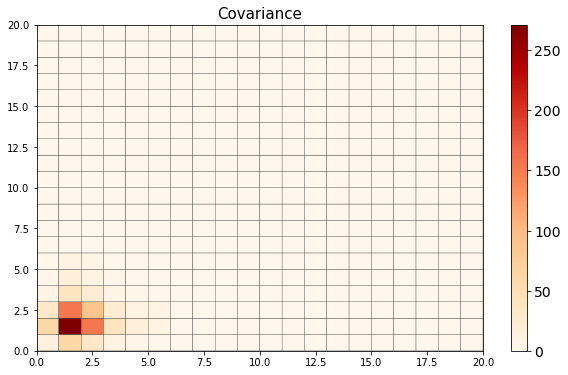

In [100]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_nue_genie['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


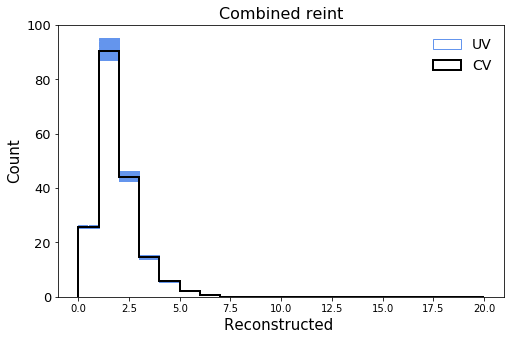

In [101]:
################
####reint########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 

#print(numu_dirt_reint_detvar_dict.keys())

for variation in nue_nue_reint_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_reint_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_reint_detvar_dict[variation],
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_nue_reint_detvar_dict['CV'], color='white') 


numu = [0]*10

nue_numu = np.concatenate((nue[0], numu), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined reint', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [102]:
bins = bins_full
print(bins_full)


detsys_fullvars_nue_reint = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_nue_reint[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 500)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contribution = 1/ 500
contributio

In [103]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_nue_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_nue_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_nue_reint = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8558/2425260978.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_nue_reint[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8558/2425260978.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_nue_reint[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


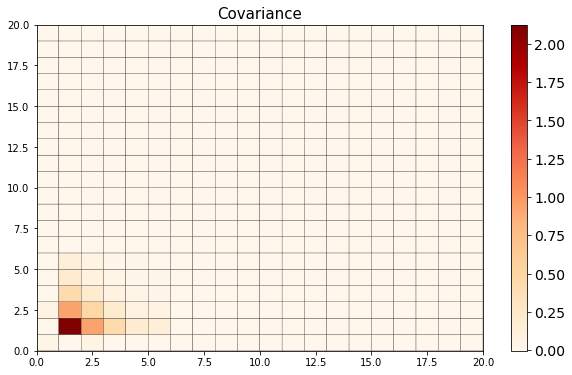

In [104]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_nue_reint['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

[0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
20
20
21


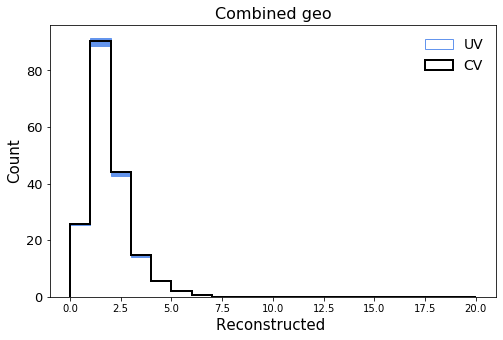

In [105]:
################
####geo########
################


import matplotlib.pyplot as plt
import matplotlib

fullvar_dict = {}

n=0
bin_centers = np.arange(0.25, 5.25, 0.5)
bins = np.arange(0, 5.5, 0.5)
print(bin_centers)
print(bins)
bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
#count = np.arange(0.0, 20.0, 1)

fig = plt.figure(figsize=(8, 5)) 



for variation in nue_dirt_geo_detvar_dict.keys(): 

    if variation == 'CV':
        continue

    if n==0: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_geo_detvar_dict[variation], 
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        print(len(nue_numu))
        print(len(bin_centers_full))
        print(len(bins_full))
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue', label='UV')
        fullvar_dict[variation] = list(full[0])

    else: 
        nue = plt.hist(bin_centers, bins, histtype='step', weights=nue_nue_geo_detvar_dict[variation],
             linewidth=1, color='white')
        numu = [0]*10
        nue_numu = np.concatenate((nue[0], numu), axis=0)
        full = plt.hist(bin_centers_full, bins_full, histtype='step', weights=nue_numu, 
             linewidth=1, color='cornflowerblue')
        fullvar_dict[variation] = list(full[0])

    n+=1   


nue = plt.hist(bin_centers, bins, histtype='step', 
                 weights=nue_nue_geo_detvar_dict['CV'], color='white') 


numu = [0]*10

nue_numu = np.concatenate((nue[0], numu), axis=0)
full = plt.hist(bin_centers_full, bins_full, histtype='step', 
                 weights=nue_numu, color='black', label='CV', linewidth=2)
fullvar_dict["CV"] = list(full[0])

##########################################

plt.title('Combined geo', fontsize=16)

plt.ylabel('Count' , fontsize=15)
plt.xlabel("Reconstructed ", fontsize=15)

#plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.legend(frameon=False, fontsize=14)
#plt.ylim((0,25))

plt.show()

In [106]:
bins = bins_full
print(bins_full)


detsys_fullvars_nue_geo = {}
xvar="Energy"

#print(type(fullvar_dict['CV']))
#print(fullvar_dict['CV'])

for variation in fullvar_dict.keys(): 
    
    #print(variation)
    
    if variation=='CV': 
        continue
        
        
    
    detsys_fullvars_nue_geo[variation] = calcCov(xvar, bins, 
                                        fullvar_dict['CV'], 
                                        fullvar_dict['CV'], 
                                        [fullvar_dict[variation] ], 2)
    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2
contribution = 1/ 2


In [107]:
cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
frac_cov = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
cor = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 
    for j in range(len(bins)-1):
            
        cov[i][j] = sum([detsys_fullvars_nue_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        frac_cov[i][j] = sum([detsys_fullvars_nue_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
        
# compute the corr matrix 
for i in range(len(cov)): 
    for j in range(len(cov[i])): 

        if np.sqrt(cov[i][i])*np.sqrt(cov[j][j]) != 0: 
            cor[i][j] = cov[i][j] / (np.sqrt(cov[i][i])*np.sqrt(cov[j][j]))

detsys_dict_nue_geo = {
    'cov' : cov, 
    'frac_cov' : frac_cov,
    'fractional_uncertainty' : np.sqrt(np.diag(frac_cov)),
    'cor' : cor
} 

<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/tmp/ipykernel_8558/926596170.py:8: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  cov[i][j] = sum([detsys_fullvars_nue_geo[x]['cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])
/tmp/ipykernel_8558/926596170.py:9: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  frac_cov[i][j] = sum([detsys_fullvars_nue_geo[x]['frac_cov'][i][j] for x in fullvar_dict.keys() if x is not 'CV'])


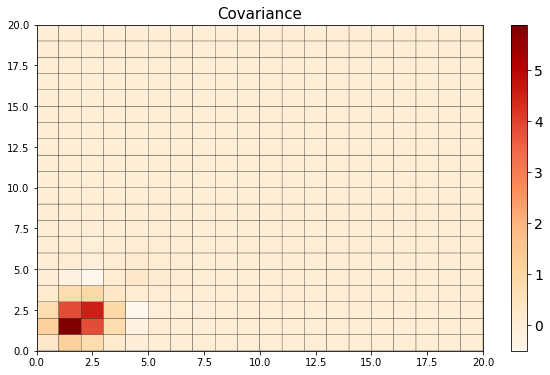

In [108]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, detsys_dict_nue_geo['cov'], cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



Now add everything together

In [109]:
nue_df_total_cov = np.array(detsys_dict_nue_ppfx['cov']) + np.array(detsys_dict_nue_genie['cov']) + np.array(detsys_dict_nue_reint['cov']) + np.array(detsys_dict_nue_geo['cov'])
dirt_df_total_cov = np.array(detsys_dict_dirt_ppfx['cov']) + np.array(detsys_dict_dirt_genie['cov']) + np.array(detsys_dict_dirt_reint['cov']) + np.array(detsys_dict_dirt_geo['cov'])
mc_df_total_cov = np.array(detsys_dict_mc_ppfx['cov']) + np.array(detsys_dict_mc_genie['cov']) + np.array(detsys_dict_mc_reint['cov']) + np.array(detsys_dict_mc_geo['cov'])

In [110]:
sys_total_cov = nue_df_total_cov + dirt_df_total_cov + mc_df_total_cov

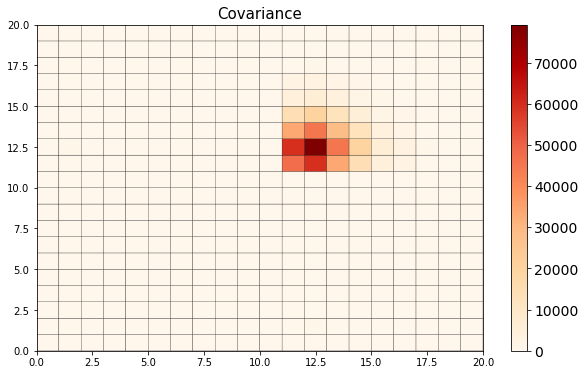

In [111]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, sys_total_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



In [112]:
#nue_cov_mc_stat and numu_cov_mc_stat

nue_stats = np.diag(nue_cov_mc_stat)
numu_stats = np.diag(numu_cov_mc_stat)

nue_numu_stats = np.concatenate((nue_stats, numu_stats), axis=0)

print(nue_numu_stats)

[5.41155536e+00 7.24158252e+00 1.65558547e+00 9.99951819e-01
 2.26762725e-01 2.35162678e-01 7.48638068e-02 1.59837692e-03
 0.00000000e+00 4.62079592e-04 2.44963447e+00 2.44592212e+02
 3.30614027e+02 1.73809696e+02 7.85766146e+01 3.06404366e+01
 1.07602528e+01 3.92743010e+00 1.14226554e+00 5.37499290e-01]


In [113]:
nue_numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [114]:
nue_numu_cov_stats[np.diag_indices_from(nue_numu_cov_stats)]    = nue_numu_stats

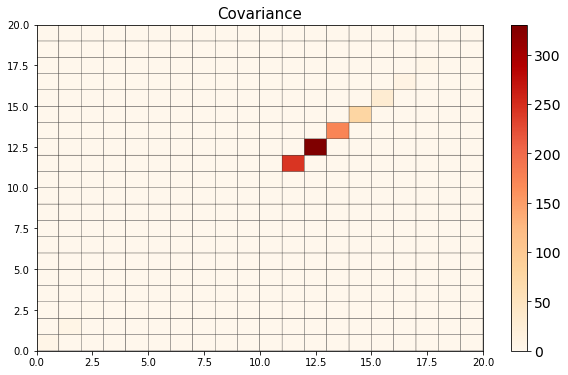

In [115]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_cov_stats, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()



In [116]:
#make sure these are the flat detsys
nue_detsys = np.diag(nue_cov_mc_detsys)
numu_detsys = np.diag(numu_cov_mc_detsys)

nue_numu_detsys = np.concatenate((np.array(nue_detsys), np.array(numu_detsys)), axis=0)

print(nue_numu_detsys)

[1.09772605e+01 8.96721318e+01 1.77206264e+01 2.17344205e+00
 2.68761491e-01 5.12358512e-02 1.59292799e-02 6.98608996e-05
 0.00000000e+00 6.61955423e-06 2.69475636e-01 2.78426191e+04
 4.64754450e+04 1.04454206e+04 1.95927368e+03 3.05092846e+02
 3.83834162e+01 4.88311224e+00 5.28504114e-01 1.06645419e-01]


In [117]:
nue_numu_cov_detsys   = np.zeros([(len(bins)-1), (len(bins)-1)])

In [118]:
nue_numu_cov_detsys[np.diag_indices_from(nue_numu_cov_detsys)]   = nue_numu_detsys

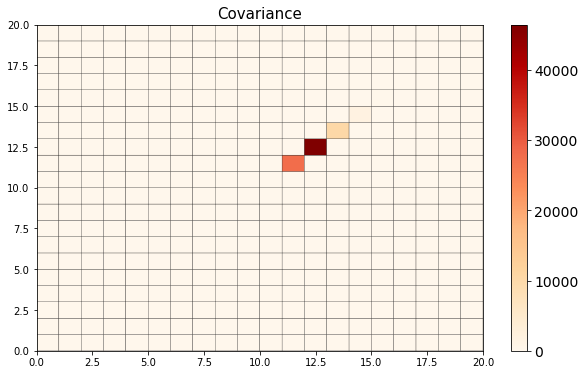

In [119]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_cov_detsys, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()


In [120]:
total_cov = sys_total_cov + nue_numu_cov_stats + nue_numu_cov_detsys
print(total_cov)

[[5.40819198e+01 1.16602782e+02 5.55366425e+01 1.64393673e+01
  5.12332375e+00 2.54901994e+00 8.38232290e-01 4.96392631e-02
  0.00000000e+00 2.45157748e-02 1.32456362e+00 4.12953553e+02
  5.21504304e+02 2.68771568e+02 1.11723822e+02 3.89536103e+01
  1.51619348e+01 6.46254024e+00 1.03413232e+00 5.30852858e-01]
 [1.16602782e+02 5.37106549e+02 2.19059783e+02 6.09155430e+01
  2.03055874e+01 1.02404281e+01 2.79062753e+00 1.91123471e-01
  0.00000000e+00 1.10463818e-01 1.13082944e+00 4.78475826e+02
  6.19522377e+02 3.41599219e+02 1.49137446e+02 5.19964916e+01
  2.11528982e+01 7.05510998e+00 2.26770979e+00 8.96569882e-01]
 [5.55366425e+01 2.19059783e+02 1.38444564e+02 3.14915674e+01
  1.01976587e+01 5.29366581e+00 1.24083020e+00 7.51564062e-02
  0.00000000e+00 7.33871713e-02 4.67052112e-01 1.36810196e+02
  1.71219209e+02 8.15002204e+01 3.95750629e+01 1.39442205e+01
  3.92398115e+00 2.53917224e+00 2.54316501e-02 4.47151692e-02]
 [1.64393673e+01 6.09155430e+01 3.14915674e+01 1.30605907e+01
  3.1

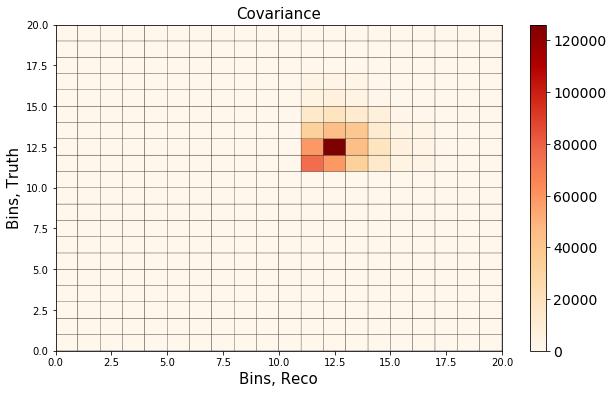

In [121]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Truth', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()


In [122]:
if isRun3 == False and isCombined == False:
    np.savetxt("full_500_catsel_nopions_recoE_usingSelection_data_covmat_blockwise_recoCut_"+ending+".csv", 
               total_cov,
               delimiter =", ", 
               fmt ='% s')
elif isRun3 == True and isCombined == False:
    np.savetxt("full_500_catsel_nopions_recoE_usingSelection_data_covmat_blockwise_recoCut_run3_"+ending+".csv", 
               total_cov,
               delimiter =", ", 
               fmt ='% s') 
elif isCombined == True:
    print("Combined")
    np.savetxt("full_500_catsel_nopions_recoE_usingSelection_data_covmat_blockwise_recoCut_comb_"+ending+".csv", 
               total_cov,
               delimiter =", ", 
               fmt ='% s') 

Combined


### Smearing

In [123]:
import csv

if isRun3 == False and isCombined == False:
    with open('nue_full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_smearing = list(csv_reader)
elif isCombined == True:
    with open('nue_full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_recoCut_comb_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        nue_smearing = list(csv_reader)

for a in range(len(nue_smearing)):
    nue_smearing[a] = list(nue_smearing[a])
    for b in range(len(nue_smearing[a])):
        nue_smearing[a][b] = float(nue_smearing[a][b])
    
print("nue_smearing = ", nue_smearing)

nue_smearing =  [[0.0, 0.0, 0.08294056564889739, 0.027689276757536314, 0.006401018897079021, 0.0015294337170036988, 0.0011312726504257625, 0.0006635532381613526, 0.000634737086256181, 0.0006518898995385146], [0.0, 0.0, 0.017852727413179628, 0.16097065650056316, 0.08328069406524907, 0.02208484045052382, 0.014484654761654146, 0.007880722018922766, 0.012976792610422708, 0.0066769109631584205], [0.0, 0.0, 0.0, 0.006276395475935052, 0.10137095017762406, 0.07781091634428106, 0.035477764628836894, 0.015926625625863243, 0.009524703654087604, 0.0011619548618574014], [0.0, 0.0, 0.0, 0.0, 0.002238427238068169, 0.04472327812193689, 0.06211193221879311, 0.03900269274203869, 0.020775026729437946, 0.011249750495023683], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0010478148980015152, 0.02441066736823021, 0.05061024256525845, 0.029603612542982934, 0.026425757219906983], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005718830256051699, 0.018617588385007253, 0.02343730635433916, 0.0307649492083598], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

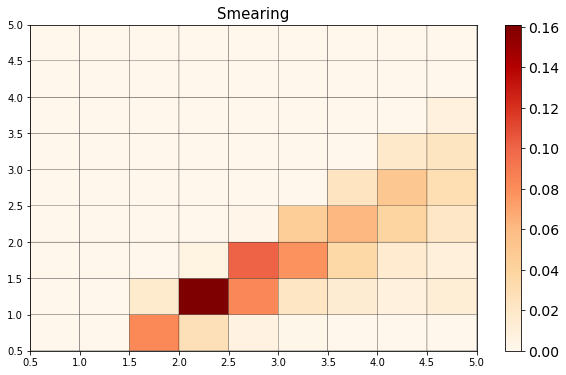

In [124]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0.5, 5.5, 0.5)
        
plt.pcolor(bins, bins, nue_smearing, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Smearing', fontsize=15)

plt.show()

In [125]:
if isRun3 == False and isCombined == False:
    with open('numu_full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_recoCut_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_smearing = list(csv_reader)
elif isCombined == True:
    with open('numu_full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_recoCut_comb_'+ending+'.csv', 'r') as read_obj:
        csv_reader = csv.reader(read_obj)
        numu_smearing = list(csv_reader)

for a in range(len(numu_smearing)):
    numu_smearing[a] = list(numu_smearing[a])
    for b in range(len(numu_smearing[a])):
        numu_smearing[a][b] = float(numu_smearing[a][b])
    
print("numu_smearing = ", numu_smearing)

numu_smearing =  [[0.0, 0.0, 0.0006779576124097726, 0.0, 0.0003867373678471025, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.40418450140723056, 0.06415793196978938, 0.008169832787305539, 0.006948176801280812, 0.003071249652183444, 0.01257298127487049, 0.0, 0.01673028791492808], [0.0, 0.0, 0.03829018148658793, 0.31663009350593535, 0.04301386123018652, 0.044885299514151863, 0.03474742690133336, 0.04607439225995548, 0.05960819812677321, 0.07229349265104681], [0.0, 0.0, 0.0024385672142342393, 0.1296011463422718, 0.08683014503239578, 0.059452252205344204, 0.06441941428670077, 0.08895738446464166, 0.09387612579692078, 0.06982600341629124], [0.0, 0.0, 0.00010346504882670609, 0.015219901986374589, 0.14993301644581405, 0.02703319814208997, 0.03752040200507248, 0.06879749704559676, 0.038817599752316946, 0.07722217243348466], [0.0, 0.0, 0.0, 0.0011216382971476102, 0.05676787590068175, 0.026909408373183025, 0.01226044526764324, 0.016618051237338585, 0.06678843798116231, 0.0], [0.0, 0.0, 0.0, 3.726114661

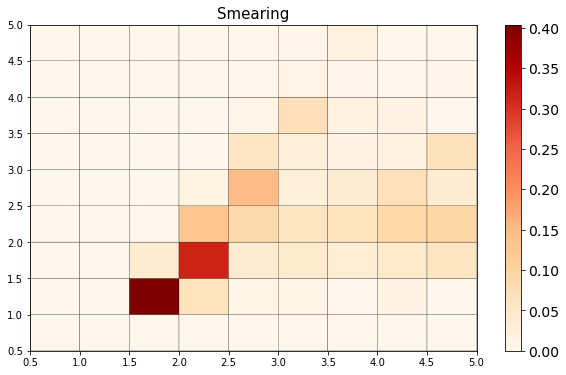

In [126]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0.5, 5.5, 0.5)
        
plt.pcolor(bins, bins, numu_smearing, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Smearing', fontsize=15)

plt.show()

In [127]:
#nue_smearing#

zeros = [0]*10

for a in range(len(nue_smearing)):
    nue_smearing[a] = list(np.concatenate(((nue_smearing[a]), zeros), axis=0))

    
for a in range(len(numu_smearing)):
    numu_smearing[a] = list(np.concatenate((zeros, ((numu_smearing[a]))), axis=0))   

In [128]:
full_smear = nue_smearing + numu_smearing
print(nue_smearing)

[[0.0, 0.0, 0.08294056564889739, 0.027689276757536314, 0.006401018897079021, 0.0015294337170036988, 0.0011312726504257625, 0.0006635532381613526, 0.000634737086256181, 0.0006518898995385146, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.017852727413179628, 0.16097065650056316, 0.08328069406524907, 0.02208484045052382, 0.014484654761654146, 0.007880722018922766, 0.012976792610422708, 0.0066769109631584205, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.006276395475935052, 0.10137095017762406, 0.07781091634428106, 0.035477764628836894, 0.015926625625863243, 0.009524703654087604, 0.0011619548618574014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.002238427238068169, 0.04472327812193689, 0.06211193221879311, 0.03900269274203869, 0.020775026729437946, 0.011249750495023683, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0010478148980015152, 0.02441066736823021, 0.05061024256525845, 0.02960361

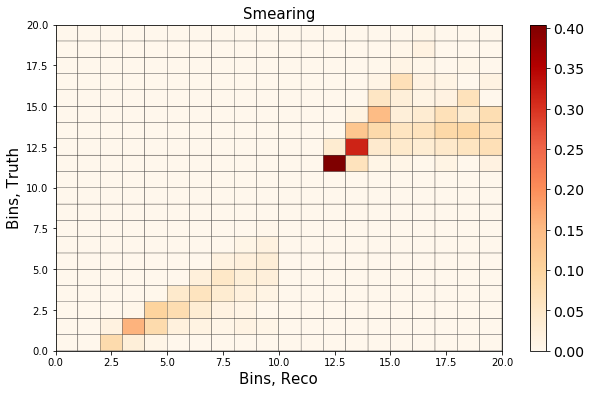

In [129]:
fig = plt.figure(figsize=(10, 6))

bins_full = np.arange(0, 21, 1)
bin_centers_full = np.arange(0.25, 20.25, 1)
        
plt.pcolor(bins_full, bins_full, full_smear, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




plt.xlabel('Bins, Reco', fontsize=15)
plt.ylabel('Bins, Truth', fontsize=15)

plt.title('Smearing', fontsize=15)

plt.show()

In [130]:
if isRun3 == False and isCombined == False:
    print("Run1")
    np.savetxt("full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_blockwise_recoCut_run1_"+ending+".csv", 
               full_smear,
               delimiter =", ", 
               fmt ='% s')
elif isCombined == True:
    print("Combined")
    np.savetxt("full_500_catsel_nopions_recoE_usingSelection_smearcept_weighted_blockwise_recoCut_"+ending+".csv", 
               full_smear,
               delimiter =", ", 
               fmt ='% s')

Combined


In [132]:
with open("nue_full_500_catsel_nopions_recoE_usingSelection_data_signal_MCONLY_blockwise_recoCut_comb_"+ending+".csv") as file:
            content = file.readlines()
            mcsig = content[0:]

            for i in range(20):
                mcsig[i]=mcsig[i].rstrip().rstrip(',')
                mcsig[i] = float(mcsig[i])
                
            print("MC Signal: ")
            print(mcsig)
            print('%.75f' % mcsig[2])    
            print("")
                
with open('nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_comb_'+ending+'.csv') as file:
        content = file.readlines()
        prior_true = content[0:]

        for i in range(20):
            prior_true[i]=prior_true[i].rstrip().rstrip(',')
            prior_true[i] = float(prior_true[i])

        print("Prior Truth: ")
        print(prior_true)
        print('%.75f' % prior_true[2])
        print("")
        
print("SMEAR x PRIOR_TRUE")
made_data_sig = np.dot(full_smear, prior_true)
print(made_data_sig)
print(sum(made_data_sig))
print("")
print("MC DATA SIGNAL")
print(mcsig)
print(sum(mcsig))
print("")
print("DIFFERENCES")
diffs = made_data_sig - mcsig

for i in range(20):
    print(diffs[i])

MC Signal: 
[22.838866345745334, 77.20803093214882, 35.51782610897373, 10.95665540822967, 4.205054587447642, 1.5424317721866563, 0.4351531584088308, 0.0554237753687768, 0.0, 0.02024819151704705, 1.3709607166112998, 817.4270406219672, 1003.8867889318637, 465.17346098032385, 179.95450228385, 59.023495213409795, 26.494626467160693, 4.516284180158496, 3.564734886928462, 0.4201021357300562]
35.517826108973729049012035829946398735046386718750000000000000000000000000000

Prior Truth: 
[0.0, 0.0, 146.2308097326124, 326.309467935948, 218.20887706293024, 108.97573920825559, 60.15403999489246, 32.49329730075427, 21.353965039002265, 13.086464989974091, 0.0, 0.0, 1552.4726723884621, 2817.7263262456695, 823.4271299352757, 217.8824591784839, 85.1955390456073, 31.015870069297264, 25.39016922666311, 16.10176898878071]
146.230809732612414109098608605563640594482421875000000000000000000000000000000

SMEAR x PRIOR_TRUE
[2.28388663e+01 7.72080309e+01 3.55178261e+01 1.09566554e+01
 4.20505458e+00 1.54243176